In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
def unzip(xy):
    real, _, energy, threads = zip(*xy)
    real = list(map(lambda x: x / 1e9, real))
    energy = list(map(lambda y: y / 1e6, energy))
    print(f'Energy: {sum(energy):.2f}J, Runtime: {sum(real):.2f}s')
    return (real, energy, threads)

In [41]:
def acc(xs):
    acc = 0
    for x in xs:
        acc += x
        yield acc

In [42]:
BG4_START = 40
BG8_START = 50

def busy_threads_at_time(sec, bg4_time, bg8_time):
    t = 0
    if sec > BG4_START and sec < BG4_START + bg4_time / 1000:
        t += 4
    if sec > BG8_START and sec < BG8_START + bg8_time / 1000:
        t += 8
    return t

def found_optimum(busy_threads):
    match busy_threads:
        case 0: return 8
        case 4: return 12
        case 8: return 8
        case 12: return 16
        case _: return -1

In [43]:
def plot(title, data, bg4_time, bg8_time):
    real, energy, t = unzip(data)

    ax = sns.lineplot(x=acc(real), y=t, color='b', label='Matmul')

    ts = [busy_threads_at_time(r, bg4_time, bg8_time) for r in acc(real)]
    sns.lineplot(x=acc(real), y=ts, label='Other proceses', color='r', ax=ax)
    
    fo = [found_optimum(t) for t in ts]
    sns.lineplot(x=acc(real), y=fo, label='Found Optimum', color='g', linestyle='--', ax=ax)
    
    ax.set_xlabel('Runtime (s)')
    ax.set_ylabel('#Threads')
    ax.set_ylim((0, 17))

---

Energy: 12827.20J, Runtime: 289.93s


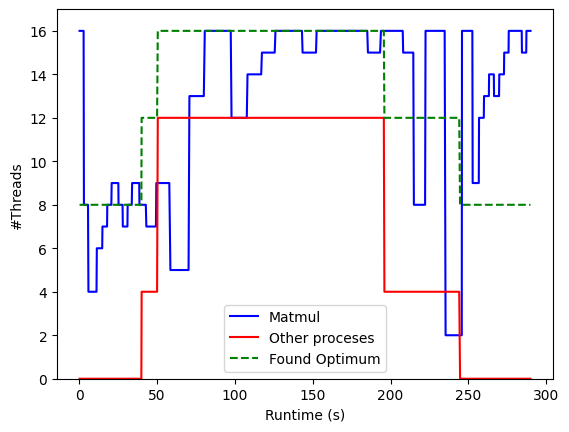

In [44]:
#data = [(185320140, 184925867, 8057291, 16), (184840963, 184036546, 7939006, 16), (184939498, 184050786, 7941264, 16), (184952001, 184169715, 7951030, 16), (185144155, 187685062, 7967325, 16), (184803343, 184046425, 7955058, 16), (184633734, 184022283, 7962626, 16), (184763358, 184026330, 7962626, 16), (184906140, 184049078, 7976909, 16), (184567602, 187770592, 7911173, 16), (184754206, 184034097, 7963481, 16), (184968869, 184058539, 7974162, 16), (184836453, 183703296, 7997355, 16), (184351205, 177128516, 8099161, 16), (183871541, 183976592, 7965373, 16), (184428154, 183970432, 7932596, 16), (184571425, 187671644, 7975505, 16), (184649027, 183808211, 8001078, 16), (184557582, 184030899, 7942363, 16), (184058791, 184018854, 7942545, 16), (201344966, 201718396, 7647441, 8), (136934594, 139616278, 6006699, 8), (136993718, 136122910, 6027023, 8), (137180785, 136144750, 5990158, 8), (137198542, 136146419, 6033432, 8), (137237658, 139652438, 6065353, 8), (137169635, 136143995, 6041366, 8), (137222534, 136144189, 6021164, 8), (168937484, 167647349, 7064435, 8), (137818379, 136225697, 6058578, 8), (137606019, 136198479, 6028732, 8), (137325477, 139664419, 6037460, 8), (137173091, 136144334, 6035202, 8), (137152282, 136142314, 6009018, 8), (137150660, 139642366, 6032822, 8), (137145976, 136142061, 6043502, 8), (137161312, 136143546, 6009873, 8), (137150250, 136142635, 6045760, 8), (137246720, 139651931, 6012314, 8), (136960012, 136117380, 6012680, 8), (272247890, 274068007, 7459698, 4), (272197521, 272022943, 7431499, 4), (272215650, 272031554, 7490582, 4), (272207068, 272025145, 7518047, 4), (274526641, 275610012, 7530986, 4), (273694787, 272396996, 7545452, 4), (272611676, 272128653, 7491009, 4), (272228038, 272032112, 7486553, 4), (272273004, 275042659, 7478802, 4), (272189568, 272020598, 7463848, 4), (272172757, 272020819, 7461590, 4), (272110483, 272004213, 7500103, 4), (272166395, 272009797, 7492901, 4), (272281819, 272044896, 7470134, 4), (272178768, 272014768, 7468060, 4), (272102610, 271998861, 7471660, 4), (272579317, 272119701, 7513043, 4), (272504773, 272101620, 7478801, 4), (272167974, 272017539, 7466656, 4), (274263273, 275542919, 7532940, 4), (210830329, 206697303, 7188885, 6), (182714873, 180434938, 6460311, 6), (182164469, 183678965, 6432417, 6), (182067499, 180329125, 6427779, 6), (182059260, 183657693, 6449386, 6), (182075405, 180329352, 6451704, 6), (181913698, 183631838, 6455977, 6), (181883714, 180298055, 6447372, 6), (181716623, 183601678, 6421553, 6), (181815362, 180286829, 6424483, 6), (181772581, 183614718, 6455917, 6), (181777444, 180277041, 6468428, 6), (181820509, 180284224, 6467879, 6), (181821244, 183621802, 6473189, 6), (181902509, 180300099, 6446272, 6), (182817307, 183796939, 6497115, 6), (182432689, 183723947, 6499251, 6), (182259912, 180361146, 6482833, 6), (182163120, 183676992, 6472273, 6), (182130499, 180332914, 6476973, 6), (156028183, 155488940, 6247360, 7), (155940435, 155985866, 6203841, 7), (155762942, 155953174, 6207687, 7), (156034329, 155998732, 6212142, 7), (155679993, 155940732, 6217147, 7), (155636556, 155933935, 6177658, 7), (155703885, 155943125, 6213790, 7), (155771835, 155948399, 6216476, 7), (155689483, 155941741, 6206771, 7), (155669990, 155940028, 6182907, 7), (156876197, 156109789, 6236373, 7), (156329192, 156031331, 6214401, 7), (156140799, 156006901, 6220870, 7), (156075570, 155998108, 6213668, 7), (156136263, 156003385, 6227096, 7), (155948719, 155976489, 6238509, 7), (155888618, 155970311, 6230148, 7), (156014191, 155986381, 6233749, 7), (155854474, 155966313, 6193404, 7), (155653324, 155934802, 6241928, 7), (137212175, 135834346, 6031600, 8), (137233711, 139653040, 6063278, 8), (137175417, 136145485, 6026108, 8), (137212594, 136148532, 6062606, 8), (137283953, 139657632, 6042954, 8), (137124834, 136137308, 6051559, 8), (137116190, 136138059, 6106308, 8), (137188447, 136145616, 6076095, 8), (137120651, 139638330, 6049545, 8), (137291612, 136159972, 6050522, 8), (137103144, 136136601, 6005844, 8), (137205032, 139648520, 6057174, 8), (137139004, 136140058, 6051071, 8), (137126655, 136139570, 6050888, 8), (137083191, 139627381, 6072616, 8), (136927443, 136115088, 6048935, 8), (136894760, 136110378, 6075180, 8), (136900845, 136110671, 6055465, 8), (136910276, 136110343, 6038193, 8), (136978448, 139617950, 6048568, 8), (225019973, 224030754, 9219032, 9), (227079538, 227895661, 9259375, 9), (225013576, 224110634, 9195045, 9), (224766076, 224081869, 9149391, 9), (241467834, 241805069, 9734411, 9), (225560446, 224169954, 9175636, 9), (224044798, 224003157, 9154578, 9), (224588087, 224061423, 9178688, 9), (223506783, 223940445, 9156226, 9), (224880886, 224095887, 9146400, 9), (224666133, 224072074, 9199806, 9), (224499401, 224053497, 9204505, 9), (225066067, 227672216, 9280128, 9), (225327571, 224145148, 9503759, 9), (223878672, 223977587, 9475989, 9), (207284605, 207918017, 9046730, 9), (219541847, 219945054, 9308753, 9), (204568823, 204059631, 8673562, 9), (205438874, 204158272, 8747902, 9), (204029097, 204001981, 8664773, 9), (174025481, 176133981, 7578472, 8), (173985044, 172247115, 7571514, 8), (174045735, 175750966, 7578960, 8), (174088122, 172256731, 7573955, 8), (174083436, 175757199, 7577922, 8), (174070095, 172253107, 7578655, 8), (174059622, 175753236, 7577190, 8), (174145312, 172264217, 7574383, 8), (174111175, 175760757, 7613079, 8), (174095603, 172259238, 7539409, 8), (174069660, 175755228, 7618145, 8), (174060160, 172256680, 7573650, 8), (174185904, 175772327, 7578471, 8), (174109526, 175762941, 7576336, 8), (174115494, 172259766, 7579021, 8), (162478465, 163807100, 7125043, 8), (137137217, 136135022, 6088485, 8), (136969828, 136119040, 6079453, 8), (136883020, 136108994, 6087936, 8), (136917339, 139613323, 6073714, 8), (155634206, 156048738, 6245773, 7), (155648235, 155935287, 6277999, 7), (155658827, 152508201, 6235092, 7), (155674713, 155946334, 6276656, 7), (155622448, 155931674, 6280929, 7), (155676905, 155940810, 6273177, 7), (155579852, 155924037, 6235641, 7), (155990910, 155984221, 6275557, 7), (156031848, 155991030, 6275924, 7), (155924696, 155974738, 6274154, 7), (155665760, 155938449, 6275497, 7), (155637837, 155936399, 6237594, 7), (155703863, 155945800, 6282454, 7), (155804912, 155954201, 6271835, 7), (155985584, 155980514, 6276595, 7), (155595138, 155929620, 6238387, 7), (155628220, 155932498, 6277999, 7), (155639786, 152504019, 6277084, 7), (155646961, 155932744, 6234908, 7), (155620102, 155939655, 6278610, 7), (187876559, 188495672, 6970197, 6), (181883300, 183628653, 6568892, 6), (181923147, 180299438, 6566328, 6), (182126014, 183669021, 6563704, 6), (181817198, 180283409, 6557112, 6), (181788031, 183616273, 6523848, 6), (181779287, 180277622, 6555647, 6), (181738391, 183608766, 6553511, 6), (181768979, 180280161, 6558028, 6), (181843697, 180290873, 6563948, 6), (181866499, 183624282, 6538069, 6), (181749076, 180273831, 6564437, 6), (181910058, 183642366, 6569319, 6), (181862744, 180292858, 6562361, 6), (181864441, 183627132, 6571699, 6), (182123792, 180337588, 6563948, 6), (181870666, 183623554, 6562301, 6), (181819805, 180284623, 6563459, 6), (181892582, 183633468, 6555953, 6), (181773065, 180280377, 6534041, 6), (155655259, 155572799, 6265303, 7), (155592753, 155926002, 6241256, 7), (156009122, 155983165, 6312912, 7), (155612335, 155930902, 6237349, 7), (155643725, 155931780, 6277755, 7), (155691034, 155942266, 6273910, 7), (155707721, 155945411, 6243697, 7), (155596822, 155932918, 6280685, 7), (155679727, 152511555, 6236556, 7), (156680371, 159507453, 6315048, 7), (155717574, 155943592, 6276656, 7), (155669337, 152509616, 6280745, 7), (155730706, 155948162, 6238449, 7), (155668824, 155935131, 6275374, 7), (155701351, 155943693, 6279403, 7), (155800712, 155955723, 6272384, 7), (155559700, 155924116, 6245529, 7), (155722543, 155947067, 6275557, 7), (155638043, 155934982, 6241256, 7), (155632004, 155933519, 6281661, 7), (137071781, 135956692, 6066025, 8), (136906646, 136110030, 6084579, 8), (136979105, 139618884, 6082382, 8), (137171732, 136144897, 6092941, 8), (137226318, 136150488, 6086654, 8), (137086824, 136134263, 6078598, 8), (137118916, 139638805, 6129562, 8), (137113851, 136138110, 6085861, 8), (137153007, 136142855, 6079391, 8), (137210155, 139649616, 6092147, 8), (137133262, 136137346, 6086838, 8), (137141080, 136137054, 6086959, 8), (137149569, 136139480, 6123215, 8), (137132783, 139640465, 6087997, 8), (137140202, 136141433, 6086776, 8), (137048309, 136126944, 6086716, 8), (136914604, 139612174, 6085067, 8), (137106248, 136133842, 6088852, 8), (137223446, 136151414, 6093429, 8), (137185292, 136146653, 6084457, 8), (208465985, 211209268, 8624856, 9), (211050610, 208336931, 8693947, 9), (227452733, 227935385, 9296241, 9), (210309614, 211810362, 8695840, 9), (207838697, 207977590, 8570534, 9), (210277474, 208251531, 8650552, 9), (218036530, 219779993, 8964455, 9), (210285418, 208250628, 8641274, 9), (211748634, 211970021, 8725991, 9), (217160743, 219683023, 8915199, 9), (211042256, 208335891, 8685891, 9), (214015318, 215776718, 8790871, 9), (238796864, 236883715, 9590979, 9), (208620526, 208060128, 8577248, 9), (211053552, 208338257, 8738992, 9), (211540972, 211945809, 8683510, 9), (210093540, 211783998, 8665810, 9), (212426305, 212044936, 8792214, 9), (211985209, 211995643, 8728860, 9), (214778132, 215862526, 8814125, 9), (137175837, 136224285, 6081344, 8), (137213259, 136149344, 6085861, 8), (137096880, 139634962, 6096603, 8), (149559493, 148193721, 6586836, 8), (166533024, 167814175, 7339154, 8), (151207387, 148398692, 6749433, 8), (148860957, 151603552, 6702742, 8), (146735171, 144340069, 6596479, 8), (147659684, 147953638, 6574202, 8), (143527645, 143936671, 6476851, 8), (148189027, 148023033, 6591170, 8), (142818900, 143850240, 6360396, 8), (137694193, 136209279, 6130295, 8), (136938394, 136116165, 6092269, 8), (136977062, 139617892, 6090805, 8), (136982499, 136119833, 6089828, 8), (137072492, 136131038, 6093307, 8), (137170975, 139640688, 6085190, 8), (139037537, 136370335, 6186691, 8), (147554547, 147941691, 6636640, 8), (201691442, 204050825, 7994120, 7), (201587038, 200211380, 8042033, 7), (205989695, 207699282, 8177408, 7), (196321483, 196034360, 8005046, 7), (170453503, 168349069, 7434307, 7), (155976674, 155992190, 6915571, 7), (181725790, 183662944, 7673320, 7), (162481643, 160348024, 7060101, 7), (160388017, 160052890, 6933882, 7), (158906426, 159841983, 6633894, 7), (157612431, 156207012, 6612471, 7), (155807383, 155964430, 6284407, 7), (156330706, 159461528, 6290328, 7), (155878112, 155968503, 6284103, 7), (155974053, 152559397, 6286849, 7), (156027257, 159427173, 6285873, 7), (155796449, 152536293, 6244918, 7), (156107699, 156002617, 6322738, 7), (155693516, 155943260, 6250655, 7), (155650924, 155944743, 6281539, 7), (137107970, 139216148, 6095871, 8), (137150919, 136137095, 6085616, 8), (137142430, 136134663, 6093674, 8), (137323051, 139658580, 6130050, 8), (136966557, 136120142, 6085922, 8), (136946796, 136115419, 6094833, 8), (137004476, 136121503, 6082687, 8), (137085725, 139632275, 6094528, 8), (137147169, 136140963, 6094100, 8), (137155593, 136142359, 6082993, 8), (137040425, 136127174, 6093307, 8), (136980266, 139622101, 6088668, 8), (136881062, 136108998, 6093918, 8), (136917841, 136113651, 6095748, 8), (137180925, 136145228, 6087143, 8), (137101081, 139635363, 6088485, 8), (137029842, 136126880, 6088669, 8), (136883191, 136108311, 6094528, 8), (137185003, 136143592, 6095321, 8), (137063855, 139630379, 6085434, 8), (229964680, 228142948, 9479040, 9), (228243690, 228015266, 9462256, 9), (229030472, 228113501, 9436195, 9), (228515801, 231611991, 9411780, 9), (227920016, 227990278, 9425696, 9), (230618604, 228286547, 9501196, 9), (229220368, 231686449, 9464331, 9), (228438029, 228039122, 9390907, 9), (232051549, 232003674, 9556127, 9), (229747080, 228191009, 9479407, 9), (228971878, 228102842, 9411048, 9), (228376258, 228039202, 9402137, 9), (228877852, 231651914, 9460730, 9), (229690122, 228186675, 9479529, 9), (230887027, 231873132, 9512365, 9), (230292832, 228253415, 9481544, 9), (229277774, 231695340, 9493933, 9), (228050802, 228004217, 9400122, 9), (229165006, 228126386, 9434668, 9), (229031670, 228110768, 9417701, 9), (136912202, 140001377, 6092331, 8), (136862062, 136106703, 6092818, 8), (334905707, 332361681, 14426233, 8), (361340574, 363659837, 14925133, 8), (361871495, 360224040, 15477865, 8), (360839150, 360099569, 14858300, 8), (371105817, 371879462, 15875447, 8), (369216673, 371647722, 15201927, 8), (376586517, 376066979, 16248371, 8), (373759702, 372214662, 15423301, 8), (372033949, 372000818, 15909200, 8), (371849260, 371971291, 15426657, 8), (372507285, 372059255, 15735555, 8), (369401589, 371673344, 15448203, 8), (368511052, 368059304, 15368125, 8), (372803712, 372092107, 15680196, 8), (374017696, 372248590, 15487693, 8), (371874675, 371978996, 15826558, 8), (369670210, 371707436, 15229942, 8), (351482503, 351928194, 15121482, 8), (282008137, 280018174, 12080841, 10), (282285026, 283825570, 12318022, 10), (283215279, 283904889, 12322234, 10), (282045537, 280194587, 12107025, 10), (283204624, 283879973, 12528838, 10), (282230766, 280216651, 11753815, 10), (281864797, 283766350, 12406889, 10), (280013539, 279988536, 12036163, 10), (285310354, 284127110, 12388579, 10), (285087684, 287648485, 12467071, 10), (285879164, 284172094, 12043670, 10), (286231818, 287804864, 12617521, 10), (286570767, 284255765, 12025421, 10), (283848721, 283978842, 12410247, 10), (284529109, 284046272, 12298796, 10), (283019818, 283897735, 12160003, 10), (281010729, 280093585, 12364837, 10), (280157316, 280007879, 11651582, 10), (282134985, 283806423, 12468229, 10), (280189576, 279967432, 11995941, 10), (544906047, 545943078, 20538766, 5), (510859369, 511766938, 20757881, 5), (531320736, 531854677, 21189338, 5), (534855199, 532564389, 21209541, 5), (535941607, 535978994, 21366705, 5), (533826767, 535558664, 21533698, 5), (538612363, 539711090, 21748174, 5), (534058449, 532407426, 21556341, 5), (489709348, 488325399, 19590526, 5), (423507307, 423897159, 16848041, 5), (468916930, 471378920, 18982678, 5), (531727667, 531939490, 21084724, 5), (535034293, 532597879, 21238898, 5), (578621337, 579716801, 23088320, 5), (521524402, 520298418, 21071235, 5), (544337982, 544063445, 21944951, 5), (422780507, 423742967, 17371721, 5), (405299222, 404253876, 16672504, 5), (405269524, 407447740, 16745074, 5), (405179130, 404233122, 16987383, 5), (299746632, 245061378, 13087796, 15), (295307188, 241238161, 12875944, 15), (306710942, 252440084, 12360137, 15), (300031446, 251172417, 13201932, 15), (291983042, 243316088, 12392790, 15), (276005678, 231461826, 12222931, 15), (319956491, 264490715, 13265285, 15), (253852939, 212614562, 11051730, 15), (298183228, 245600437, 13268826, 15), (291953704, 240197864, 12092254, 15), (292765165, 238924067, 12682890, 15), (411210379, 340685099, 16973284, 15), (339987886, 295225734, 13411892, 15), (297852845, 249836410, 12805387, 15), (382161191, 321564060, 16077840, 15), (382941623, 318813787, 15448874, 15), (361064771, 308583784, 15385093, 15), (315939751, 259164497, 13340114, 15), (314890121, 261254197, 13625698, 15), (317140361, 271404626, 13606593, 15), (381319922, 380214766, 15719442, 8), (404580212, 404070785, 16999346, 8), (383403693, 383917773, 16034139, 8), (380226676, 380026583, 16010884, 8), (374395013, 375795502, 15698202, 8), (395735350, 392463638, 16473286, 8), (397798261, 399721424, 16750079, 8), (385259418, 384149988, 15885518, 8), (397770079, 399712449, 16779499, 8), (403470607, 403928635, 16659930, 8), (395367524, 392409153, 16794452, 8), (380884724, 383606366, 15859334, 8), (392890889, 392105233, 16650958, 8), (398591825, 396322313, 16602680, 8), (384514909, 387561015, 16246174, 8), (408214596, 408018516, 17052020, 8), (374184220, 372269776, 15703268, 8), (382171152, 383766854, 16297687, 8), (384850463, 384102356, 16146138, 8), (385168428, 384144743, 16176350, 8), (268724720, 204250064, 11854584, 16), (283302249, 218434085, 12593595, 16), (335984055, 264376084, 14178004, 16), (287735088, 226213936, 12397307, 16), (268230360, 208981743, 10816500, 16), (240029797, 192749791, 10211888, 16), (244258098, 194010194, 10782993, 16), (271728137, 211479671, 11974579, 16), (276754422, 213292851, 11626862, 16), (271845382, 210161900, 11256807, 16), (285646137, 223301194, 12483977, 16), (315676284, 252694058, 13462062, 16), (278029012, 220374441, 11729219, 16), (316382738, 249769678, 13452175, 16), (259614622, 206210301, 11355317, 16), (321759924, 254882693, 13303250, 16), (304527318, 242528878, 13242886, 16), (301671161, 240069266, 12376738, 16), (245229550, 198411940, 10445957, 16), (285380766, 224332559, 12396270, 16), (265743286, 216571807, 11634369, 16), (387625424, 314464078, 15624655, 16), (291984083, 239723206, 12609038, 16), (391965431, 313490690, 15981099, 16), (232037638, 184747980, 9960485, 16), (297535300, 232586499, 13010526, 16), (294409832, 233648726, 12595915, 16), (285141994, 221808505, 12337310, 16), (294880381, 232116062, 12967557, 16), (307986554, 246743875, 13133999, 16), (309938317, 246583417, 13441555, 16), (310436297, 247878293, 13194241, 16), (275601285, 222590807, 11561555, 16), (304674977, 245287904, 13105191, 16), (334973644, 267659584, 14192896, 16), (232845707, 186298658, 9905797, 16), (343467765, 274452899, 13773098, 16), (352026560, 289735775, 14723962, 16), (286087578, 231468956, 12163665, 16), (305903772, 246233768, 13185330, 16), (1088243906, 1089371837, 34330844, 1), (1087064673, 1087051264, 34548740, 1), (1086665750, 1086648362, 34783236, 1), (1101920123, 1101889392, 35268465, 1), (1620076701, 1620052113, 50650627, 1), (1086086160, 1086067606, 34748507, 1), (1085074549, 1085061745, 34720919, 1), (1084283000, 1084260881, 34696628, 1), (1082897073, 1082873654, 34651950, 1), (1082220162, 1082205136, 34615207, 1), (1098477832, 1098465084, 35170564, 1), (1080948936, 1080933867, 34565951, 1), (1080674096, 1080652897, 34739597, 1), (1092656025, 1092641267, 34918428, 1), (1089510891, 1089496131, 34510776, 1), (1088344197, 1088330427, 34763278, 1), (1086979365, 1086967391, 34734164, 1), (1087303579, 1087290343, 34713534, 1), (1086385650, 1086363457, 34716586, 1), (1086095901, 1086078671, 34685214, 1), (325166321, 245314065, 13630824, 16), (308423135, 238021250, 13405178, 16), (300571565, 236519665, 12481597, 16), (275313451, 216972620, 11795380, 16), (271969514, 205981542, 11461946, 16), (260704681, 200826327, 11269075, 16), (283283787, 225085289, 11867707, 16), (331996903, 255154837, 13665492, 16), (360018543, 285684765, 15018333, 16), (255963937, 207928171, 11011386, 16), (275994176, 216241597, 11207918, 16), (307992178, 237746677, 12898588, 16), (321014048, 258060968, 13615322, 16), (266953527, 209888866, 11002352, 16), (320039603, 247211751, 13637905, 16), (287972883, 224130847, 12636259, 16), (257608208, 206308362, 11370088, 16), (237574044, 195075482, 10476780, 16), (232803630, 197548517, 9967137, 16), (321648565, 265848121, 13420681, 16), (311180691, 258181025, 13245389, 16), (324605002, 270028834, 13400844, 16), (220050621, 178724163, 9899694, 16), (227006378, 185180760, 10169530, 16), (237990690, 193616360, 10571933, 16), (313442143, 259552172, 13250882, 16), (319978928, 256474157, 13346645, 16), (351993003, 274956621, 13884852, 16), (334423104, 261497665, 13136258, 16), (341607706, 288593699, 14324121, 16), (363949950, 302730809, 14751610, 16), (322337067, 253508713, 13172086, 16), (353646362, 279598416, 14280786, 16), (364017845, 284235030, 15545614, 16), (359989189, 289240939, 14587365, 16), (343830355, 273201793, 13789760, 16), (349858110, 283872259, 14423974, 16), (358323625, 281583598, 15200462, 16), (371945247, 301238680, 14691613, 16), (339551134, 273965107, 13654689, 16), (1106876108, 1150121621, 35273652, 1), (1090232684, 1090213927, 34759921, 1), (1090635229, 1090620434, 35346528, 1), (1089236473, 1089222130, 34681491, 1), (1088447519, 1088423806, 34713290, 1), (1087779425, 1087759952, 34650485, 1), (1086747832, 1086728932, 34636569, 1), (1086083440, 1086065293, 34634799, 1), (1085806700, 1085781914, 34844393, 1), (1085026734, 1084997382, 34657871, 1), (1083722712, 1083709042, 34560885, 1), (1083309251, 1083296549, 34558689, 1), (1082324506, 1082307869, 34513400, 1), (1082381923, 1082368063, 34475071, 1), (1083794246, 1083780892, 34451999, 1), (1088333491, 1088321921, 34571017, 1), (1088670043, 1088653228, 34587009, 1), (1088067090, 1088055263, 34494174, 1), (1089522949, 1089503651, 34488987, 1), (1087793614, 1087771205, 34491305, 1), (333458844, 262577251, 14145228, 16), (279992580, 226994106, 12087737, 16), (227993355, 185245684, 9977209, 16), (247995179, 201740870, 10816379, 16), (252007512, 199956754, 11239900, 16), (281880088, 217615449, 12323699, 16), (312310496, 242756947, 13737819, 16), (321753933, 252131390, 13087430, 16), (299991902, 240740101, 12664641, 16), (310710445, 246270723, 13221707, 16), (309273478, 242966112, 12689116, 16), (299997492, 240874476, 12962919, 16), (295988512, 231446658, 12056854, 16), (324019595, 260484679, 13864771, 16), (312002990, 247753852, 13079496, 16), (287972714, 236017279, 12182097, 16), (273285536, 225576408, 11862275, 16), (248598956, 206130581, 10914095, 16), (236149639, 195888148, 10164220, 16), (297086883, 237065459, 12661894, 16), (394175533, 397374175, 16313251, 8), (369240755, 368151706, 15374656, 8), (411851417, 411974384, 16924212, 8), (369364581, 368162701, 15426108, 8), (370592875, 371820135, 15350669, 8), (369499823, 368185092, 15454733, 8), (409328728, 411658298, 16842791, 8), (369693119, 368205498, 15490988, 8), (381680395, 383693537, 15780905, 8), (369401287, 368173494, 15287192, 8), (378944901, 379864295, 15732504, 8), (369875655, 368226321, 15357321, 8), (393520658, 395684344, 16200398, 8), (370297451, 368280511, 15391196, 8), (383556296, 383941637, 15896688, 8), (369178195, 368143222, 15330832, 8), (384209293, 384022237, 15868673, 8), (369573107, 371687970, 15414206, 8), (379395532, 379918684, 15666525, 8), (386220423, 384274416, 15943197, 8), (301066044, 232114646, 12898343, 16), (277406908, 216333205, 11610017, 16), (290559655, 235797043, 11880646, 16), (344013940, 268985073, 14419702, 16), (271983320, 214490881, 11778168, 16), (323983331, 259723377, 13475002, 16), (259990093, 208736127, 11202791, 16), (279995796, 224173022, 11963592, 16), (296024785, 231390065, 12985074, 16), (303964161, 237728015, 12221587, 16), (331992457, 258532341, 13908778, 16), (320014701, 252196254, 13491055, 16), (308002335, 248490288, 13450466, 16), (359314857, 282676983, 14790794, 16), (304620985, 245433475, 12845976, 16), (328069167, 259343289, 14212061, 16), (327971414, 264458470, 13450344, 16), (379967443, 307445268, 15389242, 16), (353871025, 280109344, 14461877, 16), (342143627, 269869105, 14205042, 16), (351950660, 275231416, 14559899, 16), (355984909, 282928739, 13864832, 16), (347996537, 278495514, 14108606, 16), (419994935, 336488038, 16715534, 16), (356093004, 286001232, 14308862, 16), (352067025, 281468838, 15021690, 16), (353416874, 277810738, 14486108, 16), (374402919, 297386473, 14792077, 16), (327993163, 261720381, 13487209, 16), (299996171, 239493074, 11877044, 16), (316021679, 257150269, 13478969, 16), (291969624, 232493307, 12162811, 16), (308013286, 244565444, 12851469, 16), (327972837, 268740871, 13466213, 16), (288024528, 233991619, 12238066, 16), (319960405, 261958102, 12593535, 16), (288023474, 239985922, 12233367, 16), (287999178, 238179610, 12403349, 16), (279989810, 237757526, 11851593, 16), (259989060, 215747378, 10907321, 16), (1119202938, 1119958220, 34957491, 1), (1083241278, 1083206730, 34609836, 1), (1083583552, 1083546318, 34625888, 1), (1083355910, 1083314308, 34606235, 1), (1083330640, 1083280545, 34590304, 1), (1082048494, 1081994841, 34546359, 1), (1383834801, 1383776122, 37267056, 1), (1081094493, 1081052273, 17413896, 1), (1084920361, 1084878434, 17107500, 1), (1083907250, 1083836722, 17091326, 1), (1083316226, 1083286072, 17076677, 1), (1082714300, 1082666209, 17096453, 1), (1082454660, 1082414447, 17128374, 1), (1082651736, 1082606505, 17596513, 1), (1082403610, 1082357206, 17080400, 1), (1082403495, 1082334844, 17116717, 1), (1082788333, 1082727299, 17161150, 1), (1082847963, 1082796075, 17115984, 1), (1082316486, 1082268620, 17103899, 1), (1082091707, 1082038124, 17364274, 1), (141082224, 137493852, 6230087, 16), (141392578, 143812136, 6309188, 16), (142208887, 140135676, 6271468, 16), (145952189, 147865980, 6396590, 16), (141271590, 140153096, 6288802, 16), (141502739, 143584888, 6362045, 16), (142272902, 139961648, 6310286, 16), (142612524, 143907640, 6274032, 16), (141772118, 140086194, 6287520, 16), (141354416, 143831506, 6276413, 16), (141494971, 140084184, 6269393, 16), (142476034, 143902973, 6314864, 16), (142524448, 140154069, 6272506, 16), (142555510, 143857467, 6370955, 16), (142526347, 140138146, 6324386, 16), (142630927, 143911915, 6321639, 16), (140898715, 140055581, 6265914, 16), (140854556, 143799748, 6237045, 16), (139983832, 139997056, 6215987, 16), (142023558, 140113696, 6302230, 16), (141571332, 140091394, 6275192, 16), (141408371, 143835084, 6271041, 16), (143077870, 143939642, 6347396, 16), (142630336, 140162449, 6293379, 16), (142745888, 143919841, 6326705, 16), (142448054, 143866738, 6326156, 16), (142548540, 140137821, 6317306, 16), (142778420, 143908717, 6376692, 16), (142502511, 140148115, 6288314, 16), (142225752, 143886522, 6327194, 16), (142550689, 143908025, 6336775, 16), (142025910, 140121804, 6275741, 16), (141987188, 143859940, 6360519, 16), (142703574, 140157486, 6311263, 16), (145159864, 147816059, 6425581, 16), (139496082, 139965642, 6215194, 16), (140955788, 140035160, 6300582, 16), (141988252, 140123996, 6240341, 16), (139783164, 139983069, 6236373, 16), (141996585, 143873475, 6301254, 16), (155886813, 156828093, 6581892, 8), (137068133, 136132752, 6072738, 8), (137049288, 136130885, 6068771, 8), (137065969, 136133153, 6078110, 8), (137030972, 139628618, 6100448, 8), (137025457, 136126769, 6047714, 8), (136926242, 136113024, 6073715, 8), (136838897, 136103795, 6076095, 8), (136777535, 139594933, 6079758, 8), (136821362, 136101148, 6082259, 8), (137617732, 136198829, 6070664, 8), (137080754, 139633807, 6054550, 8), (137035819, 136128493, 6083541, 8), (136774821, 136095593, 6072983, 8), (136850133, 136103795, 6085921, 8), (136943520, 136116065, 6085251, 8), (136896316, 139610672, 6088180, 8), (136992869, 136118011, 6080063, 8), (137055499, 136131703, 6092941, 8), (137013051, 136126367, 6073959, 8), (272226342, 275714220, 7486919, 4), (272308333, 275075049, 7474163, 4), (272294850, 272071281, 7449078, 4), (272248712, 272060625, 7425640, 4), (272323703, 272076521, 7457500, 4), (271981860, 271993556, 7407513, 4), (272907189, 272226504, 7433575, 4), (272729096, 272179985, 7434612, 4), (272345584, 272077614, 7399700, 4), (272180153, 272042081, 7411358, 4), (272431070, 272107362, 7413617, 4), (272300021, 272067795, 7419475, 4), (272505931, 275124126, 7437054, 4), (272512648, 272120451, 7430523, 4), (272281561, 272068790, 7406536, 4), (272077517, 272013381, 7416119, 4), (272109523, 272022951, 7427166, 4), (272220486, 272054718, 7407207, 4), (272284819, 272069649, 7423688, 4), (272110335, 272020641, 7437908, 4), (181832092, 179589540, 6440413, 6), (182235015, 183705513, 6507491, 6), (182121312, 183686780, 6481428, 6), (182023307, 180335369, 6478805, 6), (182120768, 183683750, 6494062, 6), (181964097, 180325439, 6488021, 6), (181837410, 183637120, 6490950, 6), (181947062, 180324104, 6492720, 6), (181942393, 183655199, 6489730, 6), (181949284, 180324654, 6484969, 6), (181889617, 180311109, 6461165, 6), (181731401, 183621011, 6495222, 6), (181921057, 180316777, 6492110, 6), (181974407, 183662068, 6495284, 6), (181810446, 180299591, 6502974, 6), (181836081, 183636117, 6502913, 6), (182158723, 180358107, 6510664, 6), (181948839, 183656072, 6496444, 6), (181941682, 180323345, 6500471, 6), (182045747, 183672117, 6527266, 6), (156016367, 155795085, 6233383, 7), (155875854, 155980070, 6214767, 7), (156059451, 156007084, 6239913, 7), (155916059, 155986609, 6249862, 7), (156001167, 155996571, 6224960, 7), (155867428, 155978487, 6260115, 7), (156010100, 155999949, 6228805, 7), (156027935, 156001116, 6255355, 7), (155904417, 155982286, 6255599, 7), (155910246, 155984598, 6220260, 7), (155991496, 155996401, 6251999, 7), (155949279, 155992516, 6251448, 7), (155956857, 155993134, 6258163, 7), (156021695, 156002772, 6254806, 7), (155993014, 155996009, 6254378, 7), (156000038, 155999690, 6249374, 7), (155912226, 155983521, 6258041, 7), (156038904, 156005299, 6260238, 7), (155974128, 155995344, 6258406, 7), (156019590, 156001643, 6261215, 7), (137195853, 136032084, 6071517, 8), (137158030, 136141829, 6117355, 8), (136979815, 139619316, 6082932, 8), (136830822, 136103181, 6077560, 8), (136760656, 136094085, 6041915, 8), (136732204, 136091387, 6082199, 8), (136787063, 136097792, 6081222, 8), (136898216, 139612076, 6086777, 8), (136879508, 136107145, 6086593, 8), (136850122, 136102073, 6047104, 8), (136795440, 136098247, 6084823, 8), (136784482, 136096952, 6084823, 8), (136833072, 139602652, 6079025, 8), (136789635, 136097551, 6093308, 8), (136980870, 136121477, 6076400, 8), (136760516, 136092621, 6051681, 8), (137047389, 139627548, 6087326, 8), (139043434, 136377504, 6155319, 8), (136773093, 136095326, 6088424, 8), (136665864, 139582362, 6086227, 8), (245934392, 244156583, 9948400, 9), (246580421, 247837319, 9972020, 9), (246733359, 244298047, 9965367, 9), (251933766, 251990573, 10191869, 9), (247006564, 247887186, 9994359, 9), (246493934, 247830933, 10000768, 9), (246317596, 244256251, 9953771, 9), (246610447, 247844345, 9993565, 9), (246528676, 247835349, 9967321, 9), (246596851, 244284500, 9989476, 9), (246211848, 247799080, 9950475, 9), (246308960, 244253317, 9957616, 9), (246402255, 247819980, 9999548, 9), (246373018, 247817753, 9963719, 9), (246682470, 244295407, 9988439, 9), (246510794, 247833571, 9959630, 9), (246408978, 247821704, 9980993, 9), (245779025, 244195671, 9921300, 9), (245901868, 244206934, 9978307, 9), (246555253, 247834109, 9993138, 9), (136754965, 136402021, 6087937, 8), (136835419, 139601371, 6040145, 8), (136856929, 136105931, 6091110, 8), (137000478, 136123158, 6082016, 8), (136762392, 136093517, 6090255, 8), (136831137, 136100557, 6086471, 8), (136859617, 139606528, 6083054, 8), (136773866, 136095825, 6086654, 8), (136816616, 136101209, 6048935, 8), (136804581, 136099506, 6092147, 8), (154958431, 155867309, 6845686, 8), (138879086, 139858708, 6167831, 8), (136900466, 136111117, 6091415, 8), (136815061, 136100536, 6081405, 8), (136785916, 136097153, 6087631, 8), (136768223, 136094779, 6049972, 8), (136829415, 139601482, 6091660, 8), (136832515, 136102315, 6088973, 8), (136846608, 136102756, 6086105, 8), (136807642, 136099683, 6088119, 8), (156032408, 156467982, 6279464, 7), (156041677, 156004488, 6267501, 7), (156017913, 156001502, 6276290, 7), (155972516, 155995000, 6273117, 7), (156012181, 155998143, 6276351, 7), (155948558, 155991126, 6278548, 7), (156036206, 155997103, 6275375, 7), (155893467, 155984521, 6279159, 7), (156080025, 156011194, 6272322, 7), (156003538, 155997343, 6277877, 7), (155977103, 155993817, 6281662, 7), (155923170, 155986560, 6281233, 7), (155902477, 155985275, 6273544, 7), (155894239, 155982398, 6277206, 7), (155864873, 155980430, 6247542, 7), (155988097, 155997380, 6279220, 7), (156129176, 156018234, 6277144, 7), (156080275, 156010421, 6310592, 7), (155964546, 155993836, 6240829, 7), (155922483, 155986377, 6278854, 7), (136868347, 135727012, 6090438, 8), (136808577, 139600829, 6086960, 8), (136842241, 136101577, 6087692, 8), (136858846, 136107142, 6088180, 8), (136819678, 136101532, 6088180, 8), (136821705, 139601556, 6044662, 8), (136748040, 136093273, 6097336, 8), (136819733, 136099024, 6083602, 8), (136804083, 136099352, 6096725, 8), (136799534, 136098723, 6086594, 8), (136804167, 139598351, 6046920, 8), (136804990, 136099589, 6093796, 8), (136769922, 136094929, 6086898, 8), (136865156, 136103587, 6090195, 8), (136740754, 136089664, 6088851, 8), (136822424, 139601675, 6048386, 8), (136753474, 136092883, 6092940, 8), (136851650, 136103850, 6087021, 8), (136785934, 136095596, 6087936, 8), (136798602, 136098732, 6090378, 8), (245974687, 247410539, 10006810, 9), (246678410, 244296434, 9965551, 9), (247125137, 247901750, 10024632, 9), (246459070, 247825215, 9998632, 9), (245998614, 244220284, 9979161, 9), (246432846, 247824929, 9968908, 9), (246693989, 247852149, 10017979, 9), (246674807, 244293021, 10017309, 9), (246330626, 247812549, 9974584, 9), (246388107, 247818913, 9973302, 9), (246612495, 244289194, 10017369, 9), (246553294, 247836320, 10006933, 9), (246511382, 244274245, 9984898, 9), (246280952, 247806820, 9969701, 9), (245938491, 244213643, 9974584, 9), (246484949, 247829908, 10010045, 9), (246558893, 247837918, 9983190, 9), (245829484, 244202310, 9972326, 9), (246620502, 247844404, 10014561, 9), (246668056, 247848424, 10000524, 9), (137008151, 136143113, 6051498, 8), (137044418, 136130342, 6127975, 8), (137081408, 136134378, 6085007, 8), (138302009, 139785142, 6172958, 8), (137069363, 136133218, 6089889, 8), (136947935, 136114469, 6089706, 8), (136962803, 139620053, 6086105, 8), (136924805, 136110190, 6092269, 8), (136699470, 136085337, 6084274, 8), (136847157, 136104651, 6055527, 8), (136843941, 136104328, 6089584, 8), (136835993, 139603290, 6082077, 8), (137827786, 136227311, 6135909, 8), (137388224, 136172360, 6086105, 8), (136897079, 139610499, 6089462, 8), (136768028, 136095601, 6088119, 8), (136812109, 136094543, 6091538, 8), (136939285, 136114062, 6097274, 8), (136773441, 139595532, 6088241, 8), (136855353, 136104028, 6055160, 8), (156036068, 156153394, 6278976, 7), (155925193, 155987275, 6270065, 7), (155917768, 155985442, 6284041, 7), (156061920, 156007521, 6272201, 7), (155992398, 155997058, 6275985, 7), (155982704, 155996068, 6275435, 7), (156157605, 156020970, 6307846, 7), (157232717, 156172040, 6316634, 7), (156682441, 156096362, 6274337, 7), (156180722, 156025583, 6317977, 7), (156135520, 156018271, 6282393, 7), (156031489, 156001873, 6279769, 7), (155974611, 155994806, 6283310, 7), (156031402, 156004206, 6280318, 7), (155846417, 155976161, 6278670, 7), (156002996, 155998910, 6281295, 7), (155898583, 155983580, 6280563, 7), (156034238, 156003878, 6286849, 7), (156934341, 159558118, 6315047, 7), (158128287, 156302463, 6363143, 7), (136896131, 135814774, 6092880, 8), (136823137, 139601711, 6049301, 8), (136804512, 136093179, 6086837, 8), (137130428, 136139411, 6096420, 8), (136887688, 136109704, 6089035, 8), (136820162, 136099317, 6092209, 8), (136854914, 139605524, 6090865, 8), (136800000, 136099125, 6085434, 8), (136742233, 136090825, 6047592, 8), (136766138, 136093346, 6097335, 8), (136791791, 136096328, 6088974, 8), (136832610, 139602553, 6095993, 8), (136749648, 136092457, 6091049, 8), (136791487, 136097663, 6047225, 8), (136760870, 136093995, 6091049, 8), (136854022, 136105375, 6092819, 8), (136688485, 139586061, 6091293, 8), (136838512, 136103180, 6089340, 8), (136868480, 136108321, 6047165, 8), (136903163, 136112682, 6092391, 8), (223266478, 223582904, 9249488, 9), (222313943, 223809863, 9175941, 9), (222150270, 220237962, 9159218, 9), (221314250, 223699764, 9113074, 9), (222624361, 220289920, 9193336, 9), (221183582, 220129079, 9118324, 9), (222057387, 223783033, 9167945, 9), (221762640, 220189942, 9131813, 9), (221327290, 223702735, 9109290, 9), (222052345, 220225578, 9138527, 9), (222441511, 223822714, 9201087, 9), (221548115, 220170930, 9137062, 9), (222189037, 223793479, 9417456, 9), (221297844, 220142757, 9102272, 9), (222118789, 223789106, 9150306, 9), (221517656, 220166232, 9146827, 9), (221540745, 220169853, 9128089, 9), (222029200, 223779728, 9163490, 9), (221282189, 220137847, 9122108, 9), (221246613, 223690327, 9175148, 9), (136809114, 136141593, 6048385, 8), (136848175, 136105173, 6092086, 8), (136839520, 136095175, 6095078, 8), (136756194, 136093323, 6087997, 8), (136797530, 139598430, 6092208, 8), (136832231, 136101912, 6087936, 8), (136837809, 136101585, 6056442, 8), (136925371, 136114432, 6091049, 8), (136812717, 136094905, 6085922, 8), (136775655, 139596102, 6090866, 8), (205659823, 204206102, 8464578, 8), (136877669, 136106868, 6048690, 8), (136814017, 136099444, 6091721, 8), (136768412, 139594507, 6097945, 8), (136788183, 136098215, 6091171, 8), (136806454, 136097296, 6091599, 8), (136825866, 136100876, 6086288, 8), (136793573, 136098018, 6052841, 8), (136942672, 139615683, 6093368, 8), (136814022, 136101530, 6084518, 8), (156054505, 156252001, 6287032, 7), (155993549, 155998902, 6288497, 7), (155914120, 155987387, 6282150, 7), (155934198, 155989614, 6282210, 7), (155940521, 155991263, 6281234, 7), (156243073, 156031288, 6281051, 7), (156146345, 156019525, 6273910, 7), (155957073, 155991325, 6284957, 7), (155980345, 155995628, 6280440, 7), (155979891, 155995637, 6281967, 7), (155986904, 155997880, 6278365, 7), (155908928, 155986087, 6285689, 7), (155922259, 155988999, 6357040, 7), (171265126, 171888682, 6861860, 7), (155927891, 155989148, 6284651, 7), (156105031, 156010375, 6282272, 7), (155932620, 155989551, 6279403, 7), (155930632, 155989785, 6276107, 7), (156158355, 156017769, 6288558, 7), (156029806, 155997342, 6274764, 7), (158950687, 156976963, 6796492, 8), (136806796, 136099579, 6084945, 8), (136817909, 136100709, 6090499, 8), (136896797, 136111901, 6093979, 8), (136758247, 136094742, 6085495, 8), (136792413, 139597013, 6090316, 8), (136862067, 136104943, 6052841, 8), (136866212, 136106202, 6087753, 8), (136807869, 136099657, 6096908, 8), (136794453, 136096828, 6085434, 8), (136943819, 139617078, 6095199, 8), (136814641, 136100633, 6085312, 8), (136735230, 136089509, 6050155, 8), (136871519, 136108754, 6090683, 8), (136836791, 136101069, 6091476, 8), (136817771, 139599923, 6092880, 8), (136771881, 136095182, 6089706, 8), (136798010, 136097898, 6043747, 8), (136804500, 136094622, 6097274, 8), (136795892, 136097336, 6092147, 8), (222379648, 223400151, 9204872, 9), (222054047, 223779181, 9163062, 9), (223077392, 220336431, 9209205, 9), (221755957, 223748685, 9131142, 9), (222117132, 220232628, 9200110, 9), (221502651, 223717626, 9112160, 9), (221468622, 220162085, 9170875, 9), (222692154, 223853033, 9167945, 9), (221741043, 220192358, 9146888, 9), (222558998, 223836683, 9148109, 9), (222597821, 220285301, 9195289, 9), (223153701, 223904886, 9200965, 9), (223533873, 223946948, 9241554, 9), (221198898, 220124887, 9108314, 9), (223154733, 223902366, 9190284, 9), (222004235, 223775486, 9181800, 9), (221406082, 220151440, 9157508, 9), (222121529, 223789708, 9164711, 9), (221648141, 220180463, 9135352, 9), (220792374, 220085423, 9130958, 9), (136774344, 136439231, 6090500, 8), (136812322, 139599913, 6088424, 8), (136759500, 136093745, 6045090, 8), (136852268, 136103936, 6093002, 8), (136833283, 136101770, 6089706, 8), (136938407, 136114340, 6094406, 8), (136828676, 139601308, 6092757, 8), (136777506, 136095718, 6083542, 8), (136808493, 136099727, 6094467, 8), (136823150, 136099731, 6053512, 8), (136764079, 136094500, 6083786, 8), (136862105, 139605993, 6098800, 8), (136733266, 136089566, 6092697, 8), (136826914, 136102320, 6086166, 8), (136743187, 136091050, 6050522, 8), (136857855, 136105408, 6092208, 8), (136964615, 139619741, 6089462, 8), (136732575, 136090478, 6090622, 8), (137831150, 136227604, 6136214, 8), (137007394, 139623470, 6088242, 8), (162269322, 160377223, 6485640, 7), (164554748, 164075186, 6555769, 7), (156058389, 156007274, 6315048, 7), (155879936, 155981836, 6274520, 7), (155972235, 155994697, 6247359, 7), (156036142, 156002157, 6309493, 7), (156000438, 155997121, 6239242, 7), (155948122, 155991160, 6276473, 7), (156046926, 156001355, 6289596, 7), (155931260, 155989303, 6278976, 7), (155840408, 155976875, 6289412, 7), (156116777, 156015078, 6282699, 7), (155960269, 155993188, 6283492, 7), (155981789, 155996243, 6281112, 7), (156083670, 156007968, 6280440, 7), (156033521, 156003621, 6318466, 7), (156012809, 156001477, 6285750, 7), (155891559, 155983522, 6241012, 7), (155913522, 155984927, 6290817, 7), (155966973, 155992223, 6282942, 7), (136932678, 135743193, 6087570, 8), (136839541, 139602657, 6083115, 8), (136812274, 136099118, 6094650, 8), (136752861, 136092962, 6091415, 8), (136766158, 136094923, 6049423, 8), (136867466, 136102878, 6093673, 8), (136868786, 139607246, 6092941, 8), (136903183, 136112747, 6085983, 8), (136812519, 136098767, 6092819, 8), (136779877, 136095006, 6094406, 8), (136796620, 139597631, 6054000, 8), (136844070, 136104690, 6091965, 8), (136882842, 136108259, 6090316, 8), (136864835, 136106610, 6094650, 8), (136762887, 136093228, 6088302, 8), (136826727, 139598221, 6094711, 8), (136877240, 136108086, 6051681, 8), (136932690, 136115341, 6092880, 8), (136708129, 136087265, 6093369, 8), (136756812, 136092091, 6092025, 8), (221145365, 223278195, 9153419, 9), (222024104, 220223763, 9184608, 9), (221572483, 223728607, 9192603, 9), (221671927, 220184155, 9164650, 9), (222323184, 223812683, 9232642, 9), (221253583, 220136840, 9116249, 9), (222881203, 223875344, 9216468, 9), (222097197, 220231322, 9180579, 9), (221962459, 223771719, 9187477, 9), (222365097, 220256169, 9192603, 9), (222325397, 223811019, 9222999, 9), (221941481, 220212778, 9184791, 9), (222050678, 223781378, 9134986, 9), (221498801, 220164801, 9176490, 9), (222115100, 223789191, 9178078, 9), (223040142, 220324267, 9213416, 9), (222634250, 223846624, 9224952, 9), (221632556, 223732966, 9187843, 9), (222537828, 220276985, 9187964, 9), (221813950, 223755041, 9188270, 9), (136799491, 136168183, 6094528, 8), (136815022, 136099627, 6042404, 8), (136810088, 136100162, 6094345, 8), (136925102, 136113325, 6088668, 8), (137604736, 139700396, 6138717, 8), (137151835, 136141747, 6086594, 8), (136786187, 136098007, 6094284, 8), (136846132, 139605571, 6095016, 8), (136826296, 136100263, 6047103, 8), (136862450, 136106491, 6097336, 8), (136714754, 136087214, 6093185, 8), (136780515, 136094282, 6095565, 8), (136874100, 139608257, 6092514, 8), (137140444, 136138433, 6091964, 8), (137120931, 136139991, 6094223, 8), (137062338, 136132542, 6088913, 8), (145293091, 147659656, 6472029, 8), (153700767, 152211021, 6843305, 8), (157557531, 159691812, 7015790, 8), (169279779, 168154019, 7481732, 8), (164134402, 164243788, 7063275, 7), (157128940, 156152724, 6773481, 7), (160476100, 160063329, 6974043, 7), (179496232, 179927278, 7494548, 7), (156287799, 156029834, 6952131, 7), (156561560, 156066319, 6916913, 7), (156133860, 156015701, 6910749, 7), (158386115, 159767632, 7045820, 7), (158103376, 159727641, 6999310, 7), (156320438, 156039978, 6909712, 7), (156068728, 156005510, 6918500, 7), (156155372, 156017589, 6932660, 7), (156066149, 156006911, 6830610, 7), (156218566, 156028169, 6941633, 7), (156148652, 156017984, 6917280, 7), (157122812, 156158723, 6926862, 7), (156766371, 156106113, 6575667, 7), (156581340, 156074820, 6513960, 7), (156105744, 156009208, 6280013, 7), (156046215, 159432561, 6286422, 7), (166590849, 164308261, 6982648, 8), (136996873, 136123455, 6087997, 8), (137004062, 139623724, 6097946, 8), (136887188, 136109183, 6085129, 8), (137086178, 136133650, 6098495, 8), (137104865, 136136859, 6089584, 8), (137105331, 139637711, 6089218, 8), (137050433, 136127214, 6092757, 8), (137058768, 136131674, 6092758, 8), (137098270, 139635229, 6089523, 8), (136794573, 136098431, 6090988, 8), (137011290, 136122819, 6093124, 8), (137047233, 136125170, 6089950, 8), (136759973, 136093801, 6098556, 8), (136954981, 139615664, 6091477, 8), (136841303, 136103451, 6095626, 8), (136889168, 136107998, 6089584, 8), (136861464, 136105475, 6095871, 8), (136946031, 139614559, 6054367, 8), (158402211, 156295075, 7049420, 8), (229472978, 231423837, 9446021, 9), (229239503, 228137464, 9453772, 9), (229915217, 228210241, 9502112, 9), (230015919, 231773266, 9485144, 9), (230265883, 228248268, 9478735, 9), (230233771, 231801566, 9456275, 9), (229738935, 228190489, 9476782, 9), (229841682, 231758237, 9465064, 9), (230181692, 228239502, 9480200, 9), (227057077, 227889026, 9351112, 9), (228101802, 228009532, 9391699, 9), (225920479, 227767058, 9306617, 9), (230602303, 228282087, 9527991, 9), (229693726, 231742192, 9433508, 9), (230224665, 228245120, 9518775, 9), (229896701, 231764475, 9442542, 9), (229900538, 228208854, 9486120, 9), (230015814, 231775722, 9472632, 9), (229832850, 228196434, 9480140, 9), (230338095, 231813719, 9483801, 9), (137339525, 136318681, 6094955, 8), (136764108, 136091888, 6048019, 8), (136852303, 139603763, 6088730, 8), (136805222, 136099544, 6099777, 8), (136745279, 136091754, 6094650, 8), (136813824, 136101546, 6088912, 8), (136862372, 136105627, 6098618, 8), (178149128, 179745432, 7758708, 8), (173341900, 172133454, 7566936, 8), (154872843, 155829349, 6933942, 8), (160529107, 160033720, 7184979, 8), (173772726, 175686725, 7568035, 8), (172908675, 172083261, 7548443, 8), (168511691, 168057522, 7406780, 8), (172470732, 172052612, 7525555, 8), (172885092, 172102209, 7548930, 8), (177694687, 179709151, 7735393, 8), (173124128, 172136522, 7563457, 8), (178813565, 179845443, 7820049, 8), (182426078, 180300721, 7940348, 8), (179019473, 180285311, 7513103, 7), (156022760, 155999617, 6923689, 7), (156226745, 156030932, 6896405, 7), (156203282, 156026897, 6900068, 7), (156152253, 156019593, 6883711, 7), (156104198, 156013052, 6902204, 7), (156018271, 155995088, 6898847, 7), (156240848, 156030789, 6900067, 7), (156419363, 156057921, 6985822, 7), (156450553, 156057243, 6949995, 7), (156417631, 159486638, 6951642, 7), (156393352, 156054390, 6991315, 7), (156561378, 156076157, 6952375, 7), (156909392, 156126940, 6989362, 7), (156419853, 156057800, 6993818, 7), (156539793, 156067570, 6949323, 7), (156368828, 156052465, 6996014, 7), (156410067, 159486919, 6947737, 7), (156398234, 156056490, 6985333, 7), (156428891, 156052043, 6956403, 7), (182314499, 180530339, 7313336, 6), (182284639, 183710735, 7344281, 6), (182355396, 180392359, 7303692, 6), (182453493, 183741809, 7303570, 6), (182385343, 183730535, 7314251, 6), (182255006, 180372662, 7316754, 6), (182402876, 183725270, 7345440, 6), (182337840, 180387214, 7309308, 6), (182530624, 183752724, 7313519, 6), (182404627, 183730464, 7327740, 6), (182641781, 180428888, 7298199, 6), (182426056, 183729850, 7353924, 6), (182457086, 183741248, 7323895, 6), (182396498, 180393151, 7361919, 6), (182513737, 183749484, 7322552, 6), (182968972, 183823259, 7355939, 6), (182323664, 180380617, 7051861, 6), (184720435, 184111165, 7067304, 6), (182705801, 183783733, 7375225, 6), (183783125, 183955213, 7160077, 6), (156661128, 155845418, 6625471, 7), (156528250, 156066936, 6630782, 7), (156082448, 156006266, 6322249, 7), (155961280, 155992284, 6288558, 7), (156098696, 156012491, 6287033, 7), (155975966, 155996296, 6284713, 7), (156024840, 156003324, 6286482, 7), (156088987, 156011611, 6282333, 7), (155941620, 155985551, 6290694, 7), (155963783, 155992085, 6285446, 7), (155935135, 155989262, 6283126, 7), (155971027, 155994416, 6284224, 7), (155952222, 155992968, 6289108, 7), (155934226, 155987640, 6282760, 7), (155988110, 155994689, 6284957, 7), (155926174, 155985290, 6288008, 7), (156027381, 156002826, 6283920, 7), (155957525, 155992844, 6290023, 7), (155949875, 155991139, 6283736, 7), (156029528, 156003354, 6290328, 7)]
#plot('Dynamic Adaptation', data, 138073)

data = [(190534570, 191525648, 8456888, 16), (136318213, 135992760, 6527815, 16), (136445022, 136026161, 6501997, 16), (136514069, 136025276, 6491195, 16), (136321031, 136018164, 6552351, 16), (136587984, 136022214, 6495345, 16), (136321703, 135984959, 6564924, 16), (136384209, 136005908, 6513961, 16), (136497606, 136023274, 6554854, 16), (136240269, 136012851, 6552107, 16), (136499078, 139779861, 6534346, 16), (136634192, 136037408, 6568220, 16), (136795057, 136046466, 6585433, 16), (136452487, 136025420, 6538924, 16), (136554607, 136021623, 6551008, 16), (136311954, 136008620, 6547103, 16), (136325742, 136015956, 6520247, 16), (136235069, 135979881, 6587385, 16), (136195249, 136010266, 6566756, 16), (136573453, 139784270, 6598310, 16), (207228548, 204884001, 7756939, 8), (136549687, 139567516, 6291426, 8), (136489342, 136053874, 6279647, 8), (136579180, 136071309, 6275558, 8), (136504128, 136062178, 6260787, 8), (136584883, 136072319, 6258407, 8), (136547577, 136067079, 6307479, 8), (136575318, 136068366, 6302657, 8), (156516409, 157074631, 6954450, 8), (138253232, 136277898, 6371261, 8), (137625892, 136200763, 6338362, 8), (137214985, 139646855, 6299606, 8), (136797021, 136099228, 6299544, 8), (136653223, 136081160, 6305953, 8), (136576499, 136070438, 6267868, 8), (136435068, 136052650, 6349227, 8), (136487207, 139559190, 6275618, 8), (136550754, 136065604, 6319686, 8), (136557468, 136068440, 6323043, 8), (136554974, 136068609, 6289901, 8), (272669144, 273990014, 7892558, 4), (272719962, 272140554, 7863627, 4), (272577314, 272112002, 7879680, 4), (272483901, 275096944, 7850932, 4), (275503964, 272852912, 7967814, 4), (274355806, 275580008, 7921671, 4), (273620014, 272381141, 7918987, 4), (273150314, 275267191, 7889506, 4), (273107491, 272253209, 7882487, 4), (275022873, 275730615, 8016093, 4), (272987821, 272219906, 8110636, 4), (272766998, 272167781, 7890421, 4), (272464764, 272093377, 7865520, 4), (272595485, 272121535, 7896525, 4), (272575350, 275119665, 7879313, 4), (272843598, 272186462, 7894267, 4), (274851672, 275689461, 7964640, 4), (272489771, 272093733, 7874370, 4), (272513169, 272105198, 7861186, 4), (274674946, 272644148, 7946696, 4), (200164888, 199168794, 7347393, 6), (182571115, 180424598, 6837751, 6), (182332429, 183720862, 6836469, 6), (182217248, 180367481, 6849226, 6), (182112788, 183683655, 6823103, 6), (182146235, 180355614, 6866193, 6), (182270789, 183707980, 6812971, 6), (182042802, 180334591, 6824628, 6), (182021581, 183667093, 6793440, 6), (182108313, 180350049, 6809797, 6), (182085331, 183680231, 6792219, 6), (182133499, 183684111, 6785139, 6), (181854742, 180305164, 6806745, 6), (182126844, 183687305, 6778059, 6), (181994928, 180330770, 6803449, 6), (182842078, 183806195, 6823958, 6), (182512410, 180416914, 6829267, 6), (182496705, 183742790, 6790021, 6), (182209314, 183700610, 6819258, 6), (182488408, 180413975, 6793134, 6), (156010906, 155607065, 6488509, 7), (155924436, 155988695, 6489852, 7), (155787431, 155967153, 6501509, 7), (155853513, 155977897, 6452925, 7), (155803097, 155969059, 6491622, 7), (155824938, 155974388, 6474593, 7), (155768249, 155964514, 6496260, 7), (155927300, 155989021, 6464644, 7), (155770477, 155966714, 6442122, 7), (155898674, 155982998, 6484786, 7), (156622534, 156084597, 6520003, 7), (156374916, 156049663, 6519026, 7), (156132301, 156018480, 6493758, 7), (156086581, 156011161, 6476301, 7), (156080951, 156010891, 6511703, 7), (156333326, 156046888, 6470381, 7), (157733775, 159674323, 6564802, 7), (157155755, 156162227, 6503463, 7), (155843408, 155977141, 6473067, 7), (155839712, 155976625, 6482161, 7), (136553196, 135871039, 6308516, 8), (136552284, 136067163, 6348129, 8), (136564820, 136069373, 6300154, 8), (136517699, 136061048, 6366012, 8), (136481159, 139559372, 6301620, 8), (136461002, 136056753, 6374678, 8), (136598075, 136074055, 6312545, 8), (136559148, 136067906, 6339828, 8), (136613582, 136075994, 6366866, 8), (136578768, 136070195, 6301192, 8), (143954745, 143992346, 6704023, 8), (145873900, 147732571, 6816084, 8), (136553729, 136066842, 6294295, 8), (136522930, 136063178, 6370528, 8), (136446580, 136054860, 6314743, 8), (136481408, 136059195, 6359358, 8), (136528096, 136063571, 6355697, 8), (136499401, 136060033, 6317244, 8), (136432938, 139551329, 6309005, 8), (136463171, 136050039, 6350936, 8), (209781180, 208099521, 9059059, 9), (224156826, 224015265, 9553687, 9), (222101801, 223783794, 9482458, 9), (217310060, 216138617, 9315040, 9), (241787384, 241002104, 10175816, 9), (226075252, 224226778, 9639074, 9), (224754581, 224080350, 9599158, 9), (224132902, 224010345, 9576758, 9), (224635230, 224068690, 9625524, 9), (224579207, 227617171, 9594458, 9), (224386253, 224035418, 9583716, 9), (223460810, 223937195, 9535498, 9), (223589122, 220397250, 9567786, 9), (222594594, 223841672, 9478369, 9), (223479487, 223941489, 9560522, 9), (223013770, 223885342, 9517371, 9), (228952955, 228102174, 9799719, 9), (226097272, 224227461, 9627111, 9), (225559070, 227727092, 9679480, 9), (226430090, 224267713, 9644689, 9), (136608669, 140058159, 6344039, 8), (136457434, 136056159, 6330428, 8), (136494836, 136060715, 6313705, 8), (136505539, 136061602, 6360701, 8), (136478477, 136059057, 6317245, 8), (136506002, 136062863, 6358932, 8), (136805233, 136098353, 6363142, 8), (136558807, 139568390, 6318649, 8), (136579502, 136069887, 6344588, 8), (136579842, 136069313, 6371077, 8), (136563863, 136069790, 6303146, 8), (136514741, 136063436, 6370040, 8), (136538060, 136066763, 6320296, 8), (136509505, 136062022, 6357284, 8), (136465815, 139556150, 6317061, 8), (136559751, 136067950, 6361983, 8), (136498770, 136061435, 6318405, 8), (136559656, 136069058, 6361556, 8), (136519606, 136063237, 6316817, 8), (136472559, 136057373, 6361129, 8), (156001309, 156385680, 6471724, 7), (155984148, 155995182, 6467818, 7), (156020770, 156002115, 6454939, 7), (155926739, 155986933, 6491256, 7), (155891144, 155979288, 6510115, 7), (155972493, 155993087, 6495405, 7), (155864665, 155979912, 6490096, 7), (155980904, 155996227, 6454940, 7), (155906156, 155984835, 6505049, 7), (155787032, 155967245, 6487837, 7), (156083715, 156011487, 6509444, 7), (155782024, 155967078, 6480819, 7), (155928169, 155987020, 6507185, 7), (155803404, 155971295, 6494124, 7), (155769317, 155965995, 6499190, 7), (155821524, 155972907, 6486983, 7), (155785724, 155968369, 6468184, 7), (155758298, 155964979, 6506087, 7), (155814767, 155970614, 6490340, 7), (155835908, 155974820, 6510115, 7), (136462847, 135990282, 6315596, 8), (136537658, 136064520, 6313522, 8), (136500510, 136059737, 6359786, 8), (136546645, 136066857, 6350447, 8), (153376768, 152170033, 6974043, 8), (136568659, 139569504, 6359480, 8), (136497001, 136061396, 6315231, 8), (136604456, 136073527, 6348616, 8), (136544350, 136066587, 6329452, 8), (136511337, 136063023, 6362410, 8), (136531770, 136063672, 6317489, 8), (136467643, 136053689, 6357040, 8), (136578265, 139571738, 6349532, 8), (136442184, 136052164, 6328658, 8), (166589203, 164321976, 7428142, 8), (136539160, 136064615, 6345443, 8), (136636356, 139576824, 6326278, 8), (136548377, 136068115, 6367720, 8), (136639977, 136078798, 6344711, 8), (136483432, 136059894, 6330855, 8), (239039589, 239649152, 10183690, 9), (238701950, 236298532, 10213841, 9), (238479847, 239826889, 10198643, 9), (242350942, 243815899, 10372959, 9), (240667213, 240070804, 10269017, 9), (242038991, 240225616, 10341648, 9), (237904757, 239764556, 10162877, 9), (238860453, 239872024, 10216100, 9), (240953830, 240104447, 10270298, 9), (238515101, 236277219, 10210972, 9), (239452754, 239935406, 10205541, 9), (242042772, 243775050, 10359043, 9), (241291540, 240143289, 10296910, 9), (238856567, 239869941, 10182408, 9), (238212907, 236242811, 10163975, 9), (238780919, 239863169, 10231297, 9), (241020379, 240110361, 10305333, 9), (242284810, 243806730, 10345493, 9), (241953039, 240215341, 10331090, 9), (239511006, 239940396, 10313755, 9), (136604273, 136470797, 6367781, 8), (136571753, 139570739, 6317489, 8), (136458777, 136054683, 6353255, 8), (136406082, 136046248, 6318099, 8), (136570520, 136068242, 6369613, 8), (136616071, 136072050, 6343490, 8), (136494682, 136061298, 6316817, 8), (136511041, 136059329, 6363082, 8), (136604227, 139575101, 6333907, 8), (136517042, 136063308, 6362410, 8), (189988702, 188244241, 8708962, 8), (320821030, 320089762, 14489465, 8), (275233845, 275895817, 12588103, 8), (299241369, 299904089, 13638698, 8), (297626731, 296190149, 13467556, 8), (298811140, 299848525, 13614833, 8), (297426373, 296177530, 13447842, 8), (298176441, 299765340, 13593959, 8), (297214425, 296146567, 13383205, 8), (298045093, 299752917, 13641262, 8), (338859542, 340000905, 15034019, 7), (339773185, 336531466, 15287803, 7), (340318500, 343473073, 15035056, 7), (339595254, 336509053, 15136192, 7), (339976628, 339990279, 15181297, 7), (339011681, 339851412, 14853966, 7), (339431652, 339915883, 15293906, 7), (330346394, 331760637, 14544335, 7), (315828962, 315975086, 14349084, 7), (314706910, 312383743, 14124842, 7), (313996069, 315708918, 14171960, 7), (314917288, 315844924, 14244837, 7), (336059108, 332964876, 14841393, 7), (316548185, 316071334, 14424828, 7), (315541314, 315933896, 14147181, 7), (314038039, 312290819, 14226526, 7), (314005837, 315707867, 14111902, 7), (313042458, 312138488, 14019679, 7), (315085659, 315869110, 14317895, 7), (314800679, 312392346, 13966639, 7), (244922438, 246938781, 11674409, 9), (243612356, 240397999, 11167818, 9), (243831623, 243957529, 11584260, 9), (448461813, 399128129, 20178232, 9), (415927412, 321763109, 18607069, 9), (511987329, 368865276, 23103091, 9), (355998673, 277196186, 15831808, 9), (619987512, 501984843, 26820671, 9), (414490303, 323816728, 19138806, 9), (275190283, 233522156, 12178497, 9), (446292233, 353763872, 20480172, 9), (464020402, 363549624, 20881416, 9), (423959856, 330016401, 18525160, 9), (476067117, 335554722, 21624822, 9), (531958772, 388440528, 24629454, 9), (475984151, 360878222, 21919683, 9), (335954861, 276388797, 13917505, 9), (543090758, 415883336, 24808225, 9), (504891079, 381396659, 21278755, 9), (609262113, 421914105, 28110890, 9), (702688754, 622722009, 32384317, 5), (619996657, 611407963, 29197801, 5), (549546498, 497081728, 24790769, 5), (670424385, 588648264, 30028487, 5), (600049935, 555928299, 28073476, 5), (599974270, 524266763, 28452502, 5), (723950867, 664778266, 33861669, 5), (576194993, 560015300, 26691033, 5), (667672035, 615904526, 30510786, 5), (528096909, 511233891, 24442992, 5), (547990257, 464252614, 26085017, 5), (543997256, 521043810, 25441646, 5), (549789928, 522055178, 24885617, 5), (598398400, 574057109, 28060414, 5), (679422118, 588677474, 31849100, 5), (907630119, 833524223, 42072341, 5), (626465607, 585116671, 29211535, 5), (497680042, 490718633, 23242799, 5), (606320769, 556438566, 27975331, 5), (578276887, 573239464, 27289664, 5), (544008374, 316995630, 24199950, 13), (492619508, 298421476, 22352054, 13), (460847990, 277906338, 19604320, 13), (506566340, 318285807, 23432191, 13), (449940112, 290823182, 20008494, 13), (498011922, 318825659, 22009160, 13), (558461510, 343257538, 25017880, 13), (569544433, 358930936, 25425350, 13), (583952477, 381054364, 24562010, 13), (558994486, 371282780, 24295592, 13), (461028455, 299133117, 21113898, 13), (412735683, 268459329, 17721879, 13), (475398671, 316245180, 21714422, 13), (421061000, 280439588, 19104199, 13), (418009624, 277063124, 18376418, 13), (350228952, 233088598, 15832235, 13), (474477619, 311440074, 20674141, 13), (475992284, 300507558, 21156684, 13), (491988401, 279912832, 20519052, 13), (587996894, 359606578, 26083002, 13), (628001135, 350753139, 27427237, 16), (419989878, 241454176, 18672804, 16), (383990006, 219337145, 16476887, 16), (385079443, 220312226, 17949844, 16), (398959442, 221665955, 17923355, 16), (395984028, 221473319, 17648575, 16), (411990973, 237744446, 18455092, 16), (411963060, 240177936, 18296340, 16), (416038522, 240748252, 18716932, 16), (407947401, 232844685, 17437883, 16), (415993966, 239349138, 18551344, 16), (467966560, 253699879, 20680916, 16), (384085806, 227711659, 17071001, 16), (379971963, 204251631, 16966998, 16), (399991815, 213203139, 18685011, 16), (389171409, 210318341, 17719620, 16), (466810910, 257069032, 20340646, 16), (459949418, 255829430, 19577709, 16), (482695902, 256714558, 22069890, 16), (569288273, 307678941, 24448729, 16), (520003716, 286464621, 22886722, 16), (555995960, 305563785, 24688169, 16), (483941587, 259770440, 21380621, 16), (483407158, 276482649, 20965766, 16), (416609815, 234242040, 18966382, 16), (351838993, 198569362, 16001363, 16), (400139478, 220253045, 18620009, 16), (427991976, 228724007, 18868970, 16), (411991198, 210788340, 18790235, 16), (379651384, 204013653, 17205339, 16), (420355382, 233499723, 19560375, 16), (399941652, 222217603, 16943743, 16), (396028375, 215931223, 18241104, 16), (415995012, 232233027, 18274001, 16), (447957781, 255734080, 20224496, 16), (423990332, 244966495, 17896072, 16), (419986600, 242607507, 18703260, 16), (401374082, 235109357, 17788773, 16), (462677436, 265715934, 21040046, 16), (415929387, 238929751, 18133377, 16), (503969333, 359272565, 22140263, 12), (479987328, 337731520, 21067085, 12), (499989348, 320638438, 21539129, 12), (451990232, 298230674, 20074900, 12), (492941545, 314344031, 22864627, 12), (503036629, 326246234, 22286930, 12), (483991070, 306706458, 21514594, 12), (596064606, 378323276, 26736565, 12), (495959296, 307327598, 22583011, 12), (523976186, 317657520, 22146489, 12), (516009394, 325621521, 23189027, 12), (533715442, 315893048, 23903992, 12), (553886523, 330486282, 23996948, 12), (528367295, 332348925, 23899658, 12), (493573108, 307437991, 21366827, 12), (574426665, 370176555, 25053586, 12), (499988459, 321092916, 22610416, 12), (539977039, 347495987, 23209718, 12), (515995345, 349329935, 23097536, 12), (519962727, 321983762, 23325563, 12), (467978425, 298535035, 21535528, 14), (479251084, 307068443, 20858894, 14), (428781363, 274035616, 19342358, 14), (431941528, 270554254, 19675609, 14), (455983812, 266999168, 20159616, 14), (464638307, 264645030, 21021797, 14), (432073502, 252553158, 19359325, 14), (499237239, 285929334, 22000432, 14), (424029411, 251997092, 18821180, 14), (503981241, 277889233, 22073125, 14), (444063443, 247960122, 20430612, 14), (447924959, 245705867, 19537303, 14), (425414306, 249417139, 18781568, 14), (490576724, 284139481, 21930791, 14), (471955770, 269979173, 20565133, 14), (516026031, 312081771, 22674442, 14), (455952582, 283990152, 19645030, 14), (476061061, 297698614, 21652044, 14), (499924180, 312507702, 21883428, 14), (448028358, 279700388, 20016672, 14), (459968672, 281463757, 20580270, 15), (415983399, 245834930, 18678663, 15), (471952298, 274517125, 21399726, 15), (389832306, 221049830, 16951068, 15), (430150920, 247071735, 19094006, 15), (419991104, 263778475, 18022353, 15), (423991162, 259688324, 19202221, 15), (427987173, 249573416, 18551527, 15), (427990663, 259934245, 18519972, 15), (400033419, 232220644, 17720231, 15), (415955653, 248263846, 18661024, 15), (403991062, 240800165, 17173173, 15), (409342011, 236526766, 18657179, 15), (422641479, 250709695, 18220412, 15), (491994294, 290656470, 22312809, 15), (451990713, 269383137, 19597178, 15), (423991835, 259393622, 18298110, 15), (527988924, 309847483, 23412599, 15), (419992543, 251444925, 17648820, 15), (448020108, 271457507, 20318491, 15), (483924357, 277602386, 21113960, 16), (503988058, 285698039, 21407599, 16), (422141816, 222173526, 18302017, 16), (437844899, 238804377, 19814647, 16), (488029461, 261373712, 22084172, 16), (476007080, 258052284, 20464181, 16), (511976126, 298265074, 21946721, 16), (495948908, 275196808, 21366827, 16), (559994620, 309401506, 24618834, 16), (448014701, 241001394, 19226330, 16), (467965965, 244913134, 21030159, 16), (507993095, 265228247, 22556155, 16), (404024124, 230659933, 17826797, 16), (479958655, 273039093, 20657967, 16), (396038749, 224232091, 17830826, 16), (395944565, 225012560, 17877823, 16), (419990015, 224241796, 18102920, 16), (395992664, 224598491, 17570694, 16), (420028402, 232368090, 19115612, 16), (384019460, 208734087, 17533159, 16), (399943729, 223492305, 17945938, 16), (397628350, 214389491, 18165602, 16), (434346005, 230427902, 19806163, 16), (432001912, 223980750, 19831614, 16), (395102866, 223673857, 17332170, 16), (420882528, 247206348, 19422558, 16), (382911530, 218609410, 17297685, 16), (397072934, 232066011, 18680494, 16), (467982151, 261258645, 20214609, 16), (408794654, 223711462, 19219800, 16), (399217136, 221437696, 17820999, 16), (427936296, 227992766, 19456859, 16), (441863015, 241614067, 19610912, 16), (530166117, 298340420, 23451356, 16), (427983840, 243845594, 19436596, 16), (415992827, 234584978, 18846265, 16), (391976303, 225245178, 18096572, 16), (432732960, 250035634, 19330884, 16), (415580407, 237300008, 19285595, 16), (387680821, 226665010, 17716019, 16), (395207203, 238970034, 18190200, 15), (520710212, 300844156, 22651431, 15), (398938097, 235928326, 18024124, 15), (429085355, 263508464, 19481334, 15), (439983498, 271942323, 19759898, 15), (456012599, 270931656, 20797615, 15), (439982351, 255156274, 20014415, 15), (431947665, 260202326, 18760816, 15), (440039754, 257022401, 20302743, 15), (499941677, 289181603, 21206855, 15), (531991053, 315210360, 23368837, 15), (452016580, 257593797, 19860178, 15), (447997144, 249316982, 20845772, 15), (419999098, 238698284, 19084241, 15), (455982735, 264246123, 19767527, 15), (433940751, 258189594, 20015086, 15), (466055347, 280131759, 20479073, 15), (442793309, 252471080, 20088877, 15), (437156165, 263912003, 18670057, 15), (480033311, 293060902, 21952459, 15), (399973801, 234457648, 18178786, 16), (483927793, 270237182, 20515756, 16), (448000796, 250436667, 19739146, 16), (447990324, 257736452, 19333325, 16), (381124830, 213778228, 17744278, 16), (380564427, 220027003, 16928607, 16), (383955441, 220980523, 17877151, 16), (398355230, 226388321, 18079727, 16), (400014693, 226245394, 18200576, 16), (411461684, 236674955, 18455397, 16), (382193290, 227158335, 17835099, 16), (386271999, 227602234, 17525711, 16), (408023922, 231766134, 18781263, 16), (459956180, 258489711, 19469860, 16), (368385740, 208316419, 17390092, 16), (394730821, 232008587, 17801834, 16), (408856495, 242549228, 17734269, 16), (396026794, 233527908, 17740799, 16), (407962064, 248999844, 17886673, 16), (476031866, 278417955, 21144721, 16), (383977515, 214741584, 17255510, 16), (411940605, 238018254, 17798966, 16), (384037300, 221019000, 17834183, 16), (415994309, 237491693, 18732068, 16), (416409098, 239456393, 18457900, 16), (415579171, 231446401, 19074780, 16), (431946786, 244729941, 18441481, 16), (416036695, 233739710, 18995740, 16), (415997222, 232209421, 18892408, 16), (399945283, 226725498, 17787064, 16), (416030992, 235749183, 18837843, 16), (396094008, 226961637, 17846023, 16), (407852841, 227760893, 18421950, 16), (411976005, 229831269, 18163894, 16), (384035195, 228729814, 17322221, 16), (383991778, 226276786, 17407670, 16), (366707644, 208535907, 16790790, 16), (383332393, 229478150, 17708756, 16), (469943474, 269847830, 21235480, 16), (391993724, 216991033, 17494218, 16), (399927524, 220553364, 18098342, 16), (403990579, 241519625, 17300188, 16), (404038618, 233441341, 18853773, 16), (388542657, 230027997, 17194841, 16), (435392470, 253705859, 19622020, 16), (388033067, 212774352, 17354814, 16), (436026493, 248477238, 20219675, 16), (383960412, 218740999, 17396379, 16), (415997924, 235435592, 19074536, 16), (495948824, 282548690, 22009831, 16), (495994628, 285713883, 20746163, 16), (375988729, 217392377, 16782427, 16), (404042485, 226001595, 18040176, 16), (387982468, 229029259, 18013442, 16), (375950792, 222980603, 16353718, 16), (404044851, 238444227, 18523817, 16), (383944686, 228685310, 16567524, 16), (484039213, 289485674, 21903631, 16), (387990519, 228241876, 17095964, 16), (535982084, 308230286, 24178344, 16), (419955039, 239359938, 19099133, 16), (515955484, 298971515, 22207646, 16), (407993137, 230944243, 17562516, 16), (403991999, 217992445, 18200576, 16), (416034554, 228908789, 18689161, 16), (459952514, 246503119, 19856029, 16), (392030658, 219477226, 17709611, 16), (419952091, 239944918, 18734266, 16), (391993180, 234594057, 16528583, 16), (384655372, 226895279, 17704483, 16), (407330278, 243702748, 17847489, 16), (379990500, 232742618, 16936175, 16), (403994589, 241915096, 17743851, 16), (411992541, 246724773, 18018875, 16), (384045162, 232098633, 17577653, 16), (387979254, 226735595, 17546708, 16), (399962384, 230239149, 18054885, 16), (460039848, 274213884, 20479379, 16), (387981560, 218988542, 17702530, 16), (383983078, 218057602, 17055804, 16), (435929446, 269356856, 19442150, 15), (379991067, 228798708, 16899249, 15), (363380069, 227981102, 16541522, 15), (464640214, 299231203, 20751351, 15), (407981409, 245590951, 18463332, 15), (380008720, 224462517, 17825577, 15), (423964784, 245244831, 18736097, 15), (436025313, 251760770, 19751048, 15), (360719972, 217370302, 16110981, 15), (389303199, 238816219, 17821061, 15), (453902467, 275564453, 20156625, 15), (440035399, 265333875, 20020945, 15), (395946444, 238190345, 17045245, 15), (516051372, 307733302, 23537659, 15), (377761994, 227653893, 16785724, 15), (398197146, 242389964, 18189285, 15), (384632484, 224735413, 17533951, 15), (419383100, 248896300, 19319165, 15), (411961481, 241452104, 18248427, 15), (407993187, 231054476, 18647963, 15), (547928004, 288855726, 24139159, 16), (504031183, 279933755, 22344608, 16), (475987786, 261943995, 21263801, 16), (479990428, 266251411, 20579537, 16), (383998561, 221249045, 17909622, 16), (375978353, 228648998, 16647418, 16), (379992765, 303472034, 16398457, 16), (362465694, 289899065, 15265281, 16), (389537149, 317616292, 17335710, 16), (383972366, 305957973, 16642108, 16), (415968743, 325993685, 16672992, 16), (376135475, 303577909, 15672445, 16), (358842850, 303106185, 15704305, 16), (351025878, 279717553, 15759604, 16), (300110425, 241985362, 13188198, 16), (305881362, 248637719, 13714809, 16), (371970993, 309190625, 15862996, 16), (328000004, 265495233, 14355371, 16), (342108320, 276004533, 15176414, 16), (367545789, 293344492, 16232746, 16), (374318837, 305544868, 16053304, 16), (375989783, 307745703, 15690084, 16), (367992263, 294703125, 16122273, 16), (383994599, 317223755, 16884662, 16), (354932832, 282425275, 15179221, 16), (369058069, 301284169, 15515707, 16), (323971502, 260775806, 13744960, 16), (327998795, 255589278, 14644066, 16), (340035908, 258157002, 15296592, 16), (311937529, 242453067, 13629359, 16), (391997774, 303971394, 17065874, 16), (360023218, 274161225, 16238484, 16), (367960912, 265622484, 15622336, 16), (339998751, 268704068, 14566125, 16), (357897828, 279920284, 16122151, 16), (311891292, 252206473, 13894801, 16), (269027071, 213703238, 12317779, 16), (250109477, 199988919, 11766388, 16), (275017953, 223950344, 12026581, 16), (288020340, 223574167, 12846097, 16), (283516267, 234102898, 12954312, 15), (352403842, 296026441, 15987569, 15), (281067228, 237876601, 12674406, 15), (298918896, 260687510, 12870817, 15), (355996139, 298992170, 15763449, 15), (287993983, 247461877, 12886625, 15), (395314443, 332106450, 17414506, 15), (336698548, 293104889, 15086692, 15), (391963188, 332710968, 16589313, 15), (355995997, 304250183, 15326621, 15), (300017427, 262112385, 13617152, 15), (321337757, 270948879, 14112391, 15), (404712854, 347504057, 18015335, 15), (361936429, 306936671, 15834310, 15), (339966793, 282876083, 15019065, 15), (329300998, 276337852, 14984215, 15), (330715680, 281482503, 15089011, 15), (351606353, 290372483, 15712973, 15), (366582921, 300379216, 16223530, 15), (341766060, 284645694, 15164939, 15), (377170630, 376168466, 16213765, 8), (379378909, 379917749, 16980364, 8), (378567774, 376319403, 16387226, 8), (377532404, 379688628, 16970538, 8), (379578320, 379937358, 16438922, 8), (378888436, 376354779, 17038348, 8), (379555673, 379942974, 16408710, 8), (377442502, 379646207, 17025164, 8), (378704617, 376335721, 16355732, 8), (380398609, 380046096, 17162859, 8), (378375424, 379792456, 16360676, 8), (379045854, 379876669, 16983050, 8), (379956437, 379990594, 16436848, 8), (378902405, 376332411, 16985918, 8), (378643961, 379827909, 16420063, 8), (380026701, 379993260, 16922930, 8), (378006496, 379749891, 16416767, 8), (385642395, 384200881, 17096819, 8), (377958117, 376222989, 16473774, 8), (377480339, 379659710, 16985796, 8), (290552083, 226810686, 12905485, 16), (343965270, 270993389, 14712609, 16), (315306746, 249162443, 14277857, 16), (280733522, 226288258, 12476164, 16), (288699091, 228287402, 13162015, 16), (303266357, 238692244, 13903467, 16), (303967174, 240860934, 12910917, 16), (296216101, 232754393, 13673000, 16), (357003210, 282809934, 15753011, 16), (329117903, 254544376, 14510766, 16), (273661450, 224316116, 12614287, 16), (290031404, 227864229, 12971890, 16), (309958363, 247312505, 13563931, 16), (319975999, 249462951, 14136133, 16), (314760279, 250416931, 14254847, 16), (297217981, 248061172, 13106717, 16), (355995709, 276007522, 15328696, 16), (307234395, 232430906, 13843715, 16), (322746592, 245399093, 14892418, 16), (314036120, 244621475, 14126733, 16), (277011908, 218057922, 12571685, 16), (274396356, 215397204, 12684721, 16), (313111372, 246772020, 14053858, 16), (310188194, 246882360, 13879420, 16), (299882460, 239968794, 13708278, 16), (291828404, 232975121, 13067471, 16), (301499001, 246831192, 13597438, 16), (359996374, 286990989, 15908468, 16), (263995082, 213738188, 11858978, 16), (303994969, 243491284, 13754299, 16), (367068915, 290676404, 16268024, 16), (256578280, 212989960, 11688569, 16), (313948137, 254819902, 14368494, 16), (350398433, 283850690, 15720357, 16), (266125736, 212372124, 12207733, 16), (358153002, 288360920, 16134846, 16), (295686036, 237972760, 13260525, 16), (363971898, 291994070, 15813925, 16), (391986252, 312234246, 16564472, 16), (399991272, 319974121, 16303242, 16), (599851720, 598182265, 21989934, 2), (544862675, 546428288, 20747627, 2), (544872530, 544418069, 20731087, 2), (545306935, 544646157, 20770455, 2), (569087139, 570531580, 21374701, 2), (544928333, 544449691, 20743233, 2), (544691788, 544341036, 20732125, 2), (544744853, 544356358, 20709969, 2), (544640700, 544304920, 20694954, 2), (544660358, 544323838, 20854073, 2), (552304514, 554129220, 23107790, 2), (548503552, 548225174, 21605108, 2), (546936677, 545464300, 20778023, 2), (545889666, 546921968, 20779732, 2), (545247255, 544611973, 20768501, 2), (545753059, 546864301, 20776925, 2), (545346478, 544668414, 20738167, 2), (544819096, 544369668, 17198137, 2), (544054620, 543994566, 11324129, 2), (543490270, 543704992, 11301179, 2), (150992098, 149851820, 7090070, 16), (150685034, 148154193, 7062055, 16), (150330444, 151879532, 7048688, 16), (150731247, 151908519, 7007855, 16), (150348826, 148144793, 7021894, 16), (150212561, 151878328, 7048139, 16), (150537292, 151901257, 7035626, 16), (150549092, 148158621, 7031598, 16), (150147293, 151840129, 7037214, 16), (150820910, 148130987, 7065839, 16), (150627075, 151894950, 7081341, 16), (150237587, 151864732, 7061384, 16), (150373493, 148140960, 7002850, 16), (150883050, 151926529, 7056684, 16), (150782765, 151922728, 7052472, 16), (150142966, 148112467, 7062726, 16), (166515700, 163550762, 7745525, 16), (183762797, 181178620, 8375955, 16), (183844666, 183976051, 8269571, 16), (183957624, 183991374, 8270853, 16), (183965439, 183993908, 8288431, 16), (183677755, 183972433, 8261819, 16), (183674986, 183966697, 8331644, 16), (184042053, 183999312, 8234415, 16), (183788158, 180435597, 8224955, 16), (184021521, 183797649, 8273111, 16), (183718198, 183938629, 8289041, 16), (183703887, 183979726, 8260477, 16), (183824929, 183988213, 8225748, 16), (183934501, 183960544, 8321939, 16), (183923299, 183886284, 8299906, 16), (183660527, 183800292, 8284707, 16), (183722855, 183952256, 8285441, 16), (183692970, 183979726, 8257852, 16), (183843631, 183987817, 8276590, 16), (183801408, 183979270, 8248087, 16), (183756568, 183981738, 8316690, 16), (183664120, 183972515, 8261820, 16), (183796215, 183972893, 8284952, 16), (183444954, 183894833, 8340799, 16), (207243282, 204769177, 9104835, 9), (206055324, 207783378, 9036903, 9), (206341706, 207812437, 9052711, 9), (206814601, 204310075, 9118934, 9), (206910386, 207877272, 9068275, 9), (213032218, 212113877, 9357276, 9), (205443624, 207712678, 9055458, 9), (206835109, 204312704, 9089698, 9), (206664063, 207849309, 9051552, 9), (206694833, 207852561, 9081825, 9), (207898402, 207984713, 9147620, 9), (206293254, 204252067, 9053078, 9), (206882506, 207873237, 9109840, 9), (205563988, 204171124, 9041908, 9), (206083050, 207786658, 9082618, 9), (205794356, 204198468, 9058571, 9), (206232162, 207799638, 9080421, 9), (208413871, 208041735, 9146034, 9), (207182026, 207902363, 9103553, 9), (207187124, 207907975, 9114234, 9), (159245893, 156225238, 7362713, 12), (159033153, 159917042, 7318097, 12), (159050610, 159917976, 7317852, 12), (159172136, 159921766, 7322919, 12), (158617534, 156217330, 7308880, 12), (158710965, 159891271, 7277752, 12), (158582437, 159881376, 7316388, 12), (158834759, 156236096, 7312847, 12), (171759927, 171976450, 7851482, 12), (171958996, 171993880, 7846903, 12), (158795616, 159897546, 7284222, 12), (158933790, 159910243, 7325299, 12), (160936153, 160075345, 7424297, 12), (158399424, 159865981, 7331952, 12), (158823281, 156233049, 7290509, 12), (159001179, 159914356, 7341106, 12), (158534909, 159875411, 7337689, 12), (158562075, 156213392, 7283368, 12), (158748581, 159895187, 7328350, 12), (162925145, 163910052, 7523479, 12), (163746089, 163909056, 7608806, 13), (163446509, 163955071, 7572369, 13), (150764986, 148211242, 7041608, 13), (152302175, 152016674, 7129315, 13), (151903908, 151991900, 7159039, 13), (151367555, 151948794, 7130658, 13), (151447843, 151956679, 7111066, 13), (151380984, 151947475, 7160809, 13), (155370615, 155839832, 7521710, 13), (172042030, 171990967, 7924784, 13), (176969764, 176068660, 8101664, 13), (175507109, 175960507, 8026224, 13), (173879380, 172143437, 7962016, 13), (163781335, 163975949, 7616375, 13), (161653250, 163818264, 7534648, 13), (169589199, 168121313, 7781902, 13), (169893405, 168145109, 7841716, 13), (169993720, 171837314, 7851420, 13), (168896402, 168067557, 7761821, 13), (169535092, 171794819, 7835612, 13), (159302409, 156188209, 7438275, 14), (187486710, 187961695, 8449746, 14), (156731032, 156051503, 7317669, 14), (156937435, 159778809, 7348614, 14), (159437222, 159958084, 7457134, 14), (155657725, 155971558, 7296491, 14), (155479927, 152246995, 7285748, 14), (160269506, 159998874, 7478496, 14), (154542688, 155895554, 7267498, 14), (158905897, 159916859, 7414837, 14), (154220319, 152145827, 7242902, 14), (155048815, 155889492, 7267193, 14), (156272207, 156016034, 7315899, 14), (155847852, 155962970, 7331219, 14), (155392044, 155955034, 7294965, 14), (159071526, 159932922, 7413433, 14), (159188780, 159941014, 7438518, 14), (156857904, 156058853, 7363080, 14), (159262924, 159944131, 7424114, 14), (160582572, 160008682, 7535930, 14), (167789757, 168062069, 7738750, 13), (169400426, 168107318, 7817180, 13), (170297368, 171865758, 7855754, 13), (166462010, 164188465, 7703715, 13), (168147441, 168006427, 7766704, 13), (169010191, 171766669, 7801066, 13), (167855259, 167988562, 7754009, 13), (168876363, 168067075, 7759685, 13), (169680085, 168127205, 7824504, 13), (174998159, 175911110, 8036783, 13), (165669454, 164125662, 7688884, 13), (165374370, 167796096, 7656231, 13), (169579757, 168115703, 7797282, 13), (166594022, 167887974, 7724101, 13), (166313167, 164173658, 7704631, 13), (166854734, 167910134, 7692974, 13), (169263177, 168093303, 7844096, 13), (169655943, 171813460, 7794170, 13), (166199662, 164168407, 7709025, 13), (169291774, 171790255, 7793009, 13), (156757231, 156020352, 7380231, 14), (158954087, 159923530, 7414592, 14), (155286699, 152230768, 7337445, 14), (160358061, 160023875, 7498272, 14), (160733359, 163764745, 7548931, 14), (159158277, 156224487, 7457439, 14), (156130464, 156005491, 7363995, 14), (159230221, 159944569, 7470684, 14), (159048816, 159893800, 7504680, 14), (158405380, 159871470, 7432171, 14), (159631798, 159968847, 7491558, 14), (156544505, 156038284, 7355267, 14), (157030491, 156073168, 7367169, 14), (159348729, 159952018, 7447368, 14), (159407790, 159954589, 7511151, 14), (159342632, 156236524, 7462322, 14), (155741924, 155977979, 7354778, 14), (158689259, 159878577, 7460980, 14), (156525196, 156036313, 7355938, 14), (157402000, 159811303, 7415264, 14), (152290607, 151695157, 7223981, 15), (144781072, 144046066, 7013898, 15), (145214619, 144069474, 6983686, 15), (146765399, 147913393, 7038495, 15), (147626486, 147973685, 7059796, 15), (148213844, 148013227, 7146344, 15), (147050374, 147935217, 7045331, 15), (147327556, 144167849, 7053388, 15), (146907751, 147922554, 7074994, 15), (147401350, 147958830, 7055097, 15), (147014191, 147930231, 7078717, 15), (147772044, 147983880, 7098798, 15), (146668404, 144174391, 7057172, 15), (147371033, 147955893, 7042401, 15), (146839499, 147909324, 7058942, 15), (148463939, 148027740, 7125531, 15), (144221566, 144012600, 6936750, 15), (147366881, 147946885, 7026228, 15), (144728066, 144045674, 6971844, 15), (147524362, 148028066, 7105390, 15), (136738273, 135605378, 6670332, 16), (152678063, 152039073, 7286969, 16), (136867277, 139802249, 6739301, 16), (136562616, 136021934, 6686873, 16), (136591571, 136010394, 6716413, 16), (136385618, 136018856, 6644637, 16), (137942783, 136116552, 6747114, 16), (136394305, 139772801, 6683943, 16), (140323279, 139977244, 6843122, 16), (140104235, 139962856, 6790021, 16), (155972476, 155982596, 7388287, 16), (141038008, 140041928, 6833418, 16), (140721220, 140040691, 6832563, 16), (140555365, 140030496, 6810102, 16), (140424138, 140025481, 6847456, 16), (139734248, 139971514, 6812604, 16), (140022347, 139998447, 6820967, 16), (152773916, 145784705, 7432903, 16), (159083233, 159093199, 7507366, 16), (159624040, 159966743, 7526043, 16), (159578444, 159961942, 7475139, 16), (159565632, 159959390, 7536785, 16), (158340439, 159891549, 7454083, 16), (159247731, 156191792, 7547649, 16), (158492948, 159902563, 7467998, 16), (156066099, 156001175, 7369244, 16), (136685686, 136040376, 6692427, 16), (137807447, 139860307, 6732832, 16), (137071940, 136029785, 6704267, 16), (136835623, 136046631, 6685286, 16), (136806797, 136048301, 6715254, 16), (137279531, 139822455, 6701887, 16), (136753892, 136045110, 6640486, 16), (136599283, 136025484, 6698408, 16), (136622039, 136033600, 6679731, 16), (137162213, 136071955, 6703840, 16), (136765786, 139788077, 6698287, 16), (136247770, 136013296, 6647993, 16), (136261201, 135995573, 6724653, 16), (136245447, 136013584, 6689680, 16), (137101925, 136047510, 6698713, 16), (136504722, 136028465, 6658126, 16), (139869072, 139988676, 6811506, 16), (137273525, 136077039, 6680830, 16), (137540665, 139844077, 6741926, 16), (136669294, 136040446, 6717268, 16), (137482955, 136048512, 6718061, 16), (137142959, 139817812, 6696577, 16), (137013524, 136061015, 6681563, 16), (136526109, 136028402, 6694196, 16), (136723048, 135992815, 6693404, 16), (136759084, 135795915, 6668440, 16), (136961452, 139806833, 6683332, 16), (136776382, 136042771, 6686079, 16), (136882887, 136047252, 6701033, 16), (136516601, 136030017, 6686994, 16), (136798349, 136039690, 6693648, 16), (136976365, 139808028, 6685408, 16), (136668054, 136039138, 6694685, 16), (137214989, 136074741, 6697614, 16), (144242814, 144179498, 6972883, 15), (143871328, 143988602, 6981549, 15), (144335424, 144020224, 7010847, 15), (144616618, 144037339, 6967328, 15), (144216568, 144012200, 6996259, 15), (144246063, 147747541, 7000226, 15), (144303104, 144018486, 6980329, 15), (144023411, 144000792, 6969953, 15), (144291236, 143986355, 6962628, 15), (143828287, 143987998, 6981001, 15), (144537176, 144034293, 6983868, 15), (146363887, 144156622, 7085615, 15), (146022976, 147832516, 7054059, 15), (148827162, 148054347, 7159894, 15), (143747961, 143968864, 7018902, 15), (144622547, 144040171, 6965986, 15), (144791931, 144051129, 6995282, 15), (144036827, 143998170, 6972028, 15), (143748165, 143980449, 6964765, 15), (144192462, 143971678, 6995405, 15), (136830241, 139351782, 6697431, 16), (136632910, 136031021, 6661421, 16), (137600408, 136077186, 6733626, 16), (136492939, 136026256, 6658369, 16), (136973211, 139809403, 6664228, 16), (136428703, 136024356, 6653792, 16), (136910793, 136045762, 6715742, 16), (136358488, 136019306, 6628584, 16), (137064302, 136060534, 6661665, 16), (136984400, 136054054, 6707991, 16), (136457285, 139776349, 6732527, 16), (136627303, 136035176, 6656477, 16), (136418284, 136024491, 6718244, 16), (137033087, 136026327, 6693892, 16), (136628180, 136027803, 6640242, 16), (136742418, 136036370, 6680402, 16), (136862797, 139801642, 6678572, 16), (135711490, 135980381, 6639265, 16), (136735776, 136040935, 6655806, 16), (136201705, 136000250, 6691145, 16)]
plot('Dynamic Adaptation', data, 204546, 145946)

Energy: 13590.49J, Runtime: 302.00s


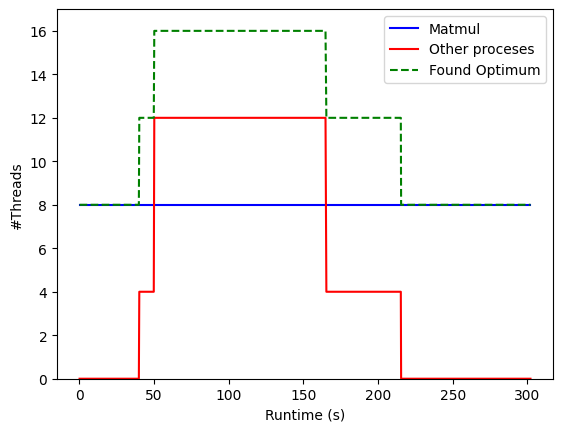

In [45]:
#data = [(159126607, 156267558, 6778303, 8), (137361533, 139669664, 6209761, 8), (136962050, 136117090, 6147751, 8), (136634402, 136076548, 6149459, 8), (136664504, 136081552, 6203231, 8), (136647633, 136072604, 6206283, 8), (136606856, 139571501, 6173630, 8), (136691969, 136085134, 6203780, 8), (136602785, 136073708, 6168991, 8), (136589680, 136072205, 6210372, 8), (136645065, 136079315, 6203170, 8), (136609887, 136075062, 6173690, 8), (136638443, 139575825, 6202743, 8), (137502133, 136184651, 6248702, 8), (137407589, 136173894, 6212570, 8), (137351551, 139663405, 6215743, 8), (137220522, 136151818, 6240524, 8), (136605360, 136074783, 6170638, 8), (136583504, 136071469, 6211899, 8), (136607402, 136074140, 6171493, 8), (136715590, 139585998, 6207564, 8), (136631801, 136077919, 6208542, 8), (136673424, 136081266, 6168380, 8), (136601666, 136074209, 6215865, 8), (136691505, 136085143, 6208847, 8), (136604938, 136074503, 6173385, 8), (136679930, 136082659, 6207442, 8), (136666954, 139581572, 6213852, 8), (155417563, 153585185, 6794172, 8), (137896450, 136236038, 6245650, 8), (137432601, 136177424, 6211349, 8), (136993890, 139622756, 6208053, 8), (136598977, 136072671, 6216171, 8), (136626800, 136076778, 6207747, 8), (136704311, 136083686, 6167831, 8), (136581670, 136070748, 6207016, 8), (136673934, 136083076, 6209456, 8), (136703329, 139586868, 6169784, 8), (136588131, 136072398, 6215011, 8), (136705557, 136087110, 6204879, 8), (136656172, 136080871, 6172958, 8), (136710477, 136086615, 6202743, 8), (136684046, 136083718, 6212142, 8), (136692166, 139583585, 6166672, 8), (137456108, 136174429, 6251265, 8), (137042800, 136128307, 6204330, 8), (136772656, 136095363, 6212509, 8), (136588558, 139572206, 6164535, 8), (136594964, 136071818, 6208968, 8), (136745637, 136091819, 6212020, 8), (136594760, 136072386, 6172653, 8), (136720601, 136087594, 6212570, 8), (136705157, 136087067, 6166854, 8), (136590105, 139572800, 6214950, 8), (136721255, 136089092, 6207320, 8), (136640384, 136077857, 6161423, 8), (136677260, 136082140, 6211654, 8), (136600147, 136073834, 6209517, 8), (136671254, 136081480, 6173386, 8), (137471729, 139682392, 6244735, 8), (159085939, 157077508, 6942304, 8), (136709167, 136080752, 6214339, 8), (136631196, 136076965, 6168502, 8), (136651829, 136078906, 6213058, 8), (136647745, 136075211, 6218856, 8), (136676742, 136083009, 6170334, 8), (136630197, 139577587, 6209640, 8), (136889392, 136109719, 6211837, 8), (136714825, 136087723, 6165816, 8), (136651265, 136079994, 6213424, 8), (136615586, 136074753, 6216415, 8), (136657501, 136077199, 6165817, 8), (136639666, 139577889, 6210860, 8), (136698254, 136079724, 6219101, 8), (136653902, 136080457, 6200362, 8), (136638651, 136078651, 6170273, 8), (136660723, 136081380, 6217940, 8), (136654694, 136079626, 6207382, 8), (136581619, 139569861, 6171798, 8), (136703830, 136086698, 6215255, 8), (136651757, 136079204, 6167953, 8), (136578265, 136071125, 6210800, 8), (136663160, 136081731, 6214217, 8), (136632736, 136077869, 6164535, 8), (136575755, 136070799, 6210800, 8), (136695843, 139584111, 6162642, 8), (136646446, 136077989, 6215683, 8), (136586443, 136069339, 6211593, 8), (136681743, 136083447, 6164596, 8), (136627554, 136077235, 6212081, 8), (136609424, 136075062, 6214401, 8), (136578920, 139571090, 6167770, 8), (136655769, 136079743, 6215010, 8), (136565248, 136068453, 6212509, 8), (136618325, 136075043, 6171249, 8), (136692824, 136084069, 6216048, 8), (136694577, 136085513, 6209091, 8), (136674346, 139582665, 6168868, 8), (136581001, 136071140, 6212997, 8), (136580700, 136071485, 6168747, 8), (136685616, 136084059, 6204085, 8), (136569191, 136070074, 6209762, 8), (136656876, 136075728, 6168686, 8), (136693703, 139584308, 6211715, 8), (136586698, 136072158, 6212752, 8), (139867244, 139982533, 6311141, 8), (148002530, 147997888, 6569320, 8), (137989386, 136245873, 6251204, 8), (136651620, 136078998, 6198043, 8), (136690562, 136082968, 6214706, 8), (136585584, 139571800, 6171554, 8), (136641184, 136078894, 6215988, 8), (136597939, 136073630, 6214034, 8), (136704768, 136087042, 6166427, 8), (136577873, 136070495, 6215072, 8), (136679571, 136083789, 6208541, 8), (136617197, 139575958, 6169052, 8), (136642396, 136078661, 6216354, 8), (136647305, 136079871, 6209884, 8), (136585486, 136071960, 6168929, 8), (136621463, 136075458, 6218429, 8), (136686888, 136083879, 6167282, 8), (136601654, 139573126, 6207442, 8), (136713514, 136087502, 6215194, 8), (163278004, 160590199, 7073408, 8), (136830194, 136103247, 6211837, 8), (136651506, 136079890, 6163558, 8), (136609582, 136074914, 6215927, 8), (136613283, 136074791, 6206893, 8), (136672234, 136081751, 6172897, 8), (136678084, 139581639, 6208846, 8), (136631606, 136071670, 6213180, 8), (136631258, 136077655, 6173263, 8), (136637743, 136078036, 6211471, 8), (136625889, 136075965, 6211959, 8), (136674751, 136082715, 6165634, 8), (136983170, 139620358, 6210860, 8), (136652236, 136080471, 6209640, 8), (136646882, 136078783, 6215499, 8), (136618980, 136076098, 6169968, 8), (136681367, 136084009, 6210616, 8), (136628979, 136077554, 6170455, 8), (136667334, 139582382, 6220382, 8), (136671138, 136080927, 6213424, 8), (136643579, 136077898, 6206405, 8), (136673920, 136079461, 6174728, 8), (136671218, 136081623, 6209152, 8), (136657625, 136080941, 6212386, 8), (136661109, 139581110, 6170456, 8), (136642455, 136079115, 6214889, 8), (136661708, 136080241, 6165572, 8), (136633850, 136077524, 6213668, 8), (136679061, 136082905, 6218673, 8), (136644428, 136079300, 6160446, 8), (136647419, 139579831, 6218734, 8), (136651061, 136080314, 6216781, 8), (136665229, 136081964, 6163009, 8), (136613158, 136075606, 6217514, 8), (136609241, 136074560, 6219710, 8), (136631578, 136077933, 6162582, 8), (136640994, 136077798, 6218917, 8), (136686743, 136079129, 6213241, 8), (136624160, 136075933, 6167038, 8), (136670064, 136082494, 6214950, 8), (136703363, 136086764, 6209029, 8), (136714963, 136088263, 6171188, 8), (136672761, 139582514, 6211532, 8), (136751116, 136092970, 6219222, 8), (136624990, 136076883, 6168197, 8), (136618490, 136076090, 6212020, 8), (136637143, 136078479, 6214889, 8), (136662640, 136081690, 6165756, 8), (136635923, 139578432, 6213485, 8), (136735838, 136090476, 6215499, 8), (136687336, 136084811, 6168197, 8), (136881123, 136107007, 6208481, 8), (136642231, 136078353, 6208419, 8), (136658319, 136081191, 6211410, 8), (136616735, 139576031, 6173934, 8), (136684159, 136084272, 6211532, 8), (136630130, 136075577, 6205795, 8), (136632642, 136076746, 6166793, 8), (136697044, 136084885, 6209701, 8), (136644292, 136079303, 6172653, 8), (136697298, 139586185, 6211715, 8), (136687090, 136084623, 6204146, 8), (136637948, 136078696, 6207992, 8), (136651784, 136080250, 6170334, 8), (136650154, 136079524, 6218245, 8), (136666583, 136081690, 6173202, 8), (136694795, 139580743, 6205795, 8), (136637061, 136078581, 6211654, 8), (136665821, 136082043, 6168869, 8), (136670166, 136082607, 6212935, 8), (136635014, 136077189, 6210495, 8), (136680676, 136081797, 6177047, 8), (136664762, 139581362, 6204879, 8), (136689981, 136082725, 6212142, 8), (136653223, 136079761, 6215194, 8), (136636219, 136077941, 6173691, 8), (136629601, 136077807, 6211531, 8), (136617128, 136074673, 6168869, 8), (160880369, 163606081, 7212811, 8), (137427287, 136177261, 6262740, 8), (136661398, 136079754, 6163193, 8), (136656423, 136079385, 6216842, 8), (136651529, 136080230, 6212142, 8), (136661154, 139581514, 6171554, 8), (136656637, 136079212, 6215743, 8), (136781757, 136096056, 6212143, 8), (173510689, 172185102, 7480815, 8), (136642983, 139578561, 6203781, 8), (136608064, 136074764, 6216842, 8), (136649634, 136080007, 6167831, 8), (136657744, 136081002, 6214278, 8), (136655818, 136080771, 6211593, 8), (136666295, 136079811, 6179123, 8), (136657206, 136080172, 6206038, 8), (136699069, 139585818, 6177048, 8), (136706971, 136080334, 6214644, 8), (136640035, 136078488, 6203720, 8), (136628248, 136076086, 6171798, 8), (136643920, 136078411, 6215621, 8), (136665792, 136081712, 6207504, 8), (136668824, 139581303, 6173263, 8), (136649723, 136080015, 6214767, 8), (136600679, 136073060, 6210677, 8), (136632721, 136077858, 6168930, 8), (136621613, 136076380, 6213546, 8), (136672224, 136082708, 6216842, 8), (136665142, 139582033, 6166732, 8), (136677416, 136082462, 6217514, 8), (136647877, 136077045, 6206160, 8), (136691332, 136082821, 6175888, 8), (136607504, 136073456, 6208114, 8), (136621434, 136076368, 6220870, 8), (136629327, 139576760, 6170150, 8), (136649766, 136080288, 6212631, 8), (136679692, 136080493, 6213485, 8), (136628989, 136076045, 6168197, 8), (136636388, 136078289, 6217636, 8), (136667022, 136081500, 6172591, 8), (136802329, 139599052, 6213607, 8), (136658420, 136081076, 6207992, 8), (136722366, 136089145, 6213485, 8), (136873653, 136107167, 6211471, 8), (136682796, 136083791, 6178451, 8), (136655217, 139580880, 6209457, 8), (136677686, 136078689, 6173629, 8), (136700130, 136086210, 6216781, 8), (136638358, 136078619, 6211959, 8), (136656073, 136080961, 6210129, 8), (161372565, 160584903, 6999554, 8), (136706513, 136085830, 6209762, 8), (175973267, 175993812, 7593914, 8), (136695304, 136084521, 6171981, 8), (136673626, 136082525, 6213607, 8), (136631545, 136077777, 6210312, 8), (136666801, 136082202, 6173873, 8), (136629846, 139577518, 6207687, 8), (136677599, 136082782, 6218978, 8), (136635956, 136078233, 6168441, 8), (136636818, 136076898, 6216598, 8), (136621794, 136075898, 6210494, 8), (136638536, 136078719, 6172348, 8), (136653182, 136080433, 6217330, 8), (136664517, 139582143, 6204208, 8), (136652583, 136079378, 6174850, 8), (136660212, 136081320, 6218612, 8), (136644898, 136078855, 6206100, 8), (136649076, 136079105, 6174117, 8), (136665958, 136082097, 6211837, 8), (136628660, 139577488, 6171615, 8), (136678591, 136082531, 6220565, 8), (137371334, 136171472, 6209884, 8), (140790194, 140095895, 6361007, 8), (147707509, 147961945, 6607954, 8), (136647514, 136071803, 6212753, 8), (136678706, 139584183, 6165634, 8), (136635371, 136078286, 6218795, 8), (136659282, 136077892, 6216842, 8), (136741907, 136089906, 6166427, 8), (136673069, 136081370, 6215743, 8), (136626166, 136076916, 6215561, 8), (136909928, 139611640, 6214339, 8), (136681577, 136083072, 6174423, 8), (136621934, 136076377, 6211349, 8), (136593527, 136072540, 6166793, 8), (136631896, 136077988, 6220931, 8), (136584627, 136070920, 6214157, 8), (136636595, 139575201, 6169723, 8), (162674667, 160332877, 7256756, 8), (136608416, 136074280, 6217635, 8), (136693536, 139584656, 6169601, 8), (138799376, 136348945, 6333724, 8), (136678414, 136082206, 6217636, 8), (136597263, 139569935, 6168624, 8), (136662576, 136079871, 6219589, 8), (136698114, 136085016, 6221419, 8), (136759853, 136093920, 6166672, 8), (136634215, 136078118, 6212996, 8), (136615844, 136075875, 6215744, 8), (136632229, 139577861, 6172103, 8), (136617611, 136072844, 6221359, 8), (136604289, 136072117, 6215194, 8), (136722209, 136086414, 6172347, 8), (136627879, 136068520, 6215744, 8), (136625243, 136076583, 6215926, 8), (136650326, 139578291, 6171798, 8), (136636620, 136074522, 6207565, 8), (136645235, 136077881, 6174545, 8), (136681065, 136081657, 6213851, 8), (136645151, 136079231, 6217269, 8), (136678997, 136082409, 6176681, 8), (136636498, 139578614, 6209884, 8), (136616373, 136075814, 6214645, 8), (136687947, 136084856, 6172958, 8), (136658812, 136081100, 6214461, 8), (136617667, 136073039, 6213974, 8), (136617618, 136076157, 6176253, 8), (136713153, 139587414, 6210434, 8), (136664196, 136081323, 6215255, 8), (136648541, 136078907, 6166183, 8), (136642177, 136078371, 6218245, 8), (136697036, 136085871, 6210556, 8), (136691812, 136083878, 6169296, 8), (136651336, 139578600, 6214156, 8), (136630504, 136077082, 6220382, 8), (136678716, 136083698, 6163864, 8), (136650467, 136080044, 6216414, 8), (136608982, 136074841, 6209884, 8), (136635073, 136078445, 6178512, 8), (136656637, 139580331, 6208481, 8), (136618160, 136072685, 6217147, 8), (136636000, 136078309, 6161666, 8), (136694880, 136080231, 6220382, 8), (136648424, 136077631, 6211532, 8), (136672410, 136083295, 6168563, 8), (136657442, 139580583, 6214584, 8), (136639774, 136078474, 6208725, 8), (136700072, 136077441, 6173629, 8), (136636995, 136077411, 6210189, 8), (136656966, 136080086, 6206405, 8), (136639901, 136078790, 6177841, 8), (136640722, 139578616, 6214339, 8), (136677870, 136083503, 6164047, 8), (136615131, 136074821, 6216964, 8), (136700058, 136085193, 6205917, 8), (136672139, 136082801, 6172225, 8), (136632922, 136078143, 6216842, 8), (139080112, 139882907, 6289046, 8), (137387993, 136171793, 6257126, 8), (136605342, 139574606, 6167159, 8), (136642226, 136079656, 6209762, 8), (136637047, 136075098, 6175460, 8), (136603131, 136072827, 6207626, 8), (136679297, 136083741, 6219711, 8), (136648582, 136077999, 6169112, 8), (137144929, 139642038, 6247299, 8), (136670679, 136078676, 6176192, 8), (136659658, 136081395, 6210190, 8), (136684724, 136084152, 6210555, 8), (136599013, 136072754, 6175155, 8), (136625035, 139576665, 6206832, 8), (136682431, 136078896, 6211898, 8), (136675517, 136081809, 6171188, 8), (136621467, 136076847, 6203292, 8), (136671900, 136083187, 6214035, 8), (136683588, 136084083, 6170516, 8), (136607188, 136073461, 6219467, 8), (136666336, 139580478, 6168441, 8), (136646146, 136079630, 6214828, 8), (136634340, 136077404, 6215804, 8), (136611182, 136075087, 6167343, 8), (136646878, 136079657, 6216232, 8), (136597316, 136073716, 6215072, 8), (136617374, 139574783, 6175765, 8), (136600961, 136073090, 6214889, 8), (136626919, 136076568, 6210067, 8), (136696578, 136086068, 6176803, 8), (136706292, 136084175, 6210006, 8), (136686002, 136084972, 6212814, 8), (136747937, 139591372, 6169906, 8), (136663083, 136079680, 6217391, 8), (136571014, 136068875, 6206893, 8), (136711167, 136085581, 6175949, 8), (136608028, 136074008, 6209396, 8), (136695396, 136086092, 6216720, 8), (136652442, 139580079, 6169845, 8), (136601956, 136072915, 6211776, 8), (136583458, 136071910, 6165572, 8), (136573465, 136070316, 6212631, 8), (136631929, 136077158, 6218124, 8), (136682907, 136080087, 6172591, 8), (136637039, 139576940, 6210800, 8), (136825711, 136101388, 6207748, 8), (136643038, 136079567, 6161422, 8), (136642619, 136078852, 6219832, 8), (136675792, 136080742, 6207077, 8), (136606307, 136071514, 6167342, 8), (159484045, 159932406, 7053938, 8), (136725162, 136088851, 6167525, 8), (136580061, 139571315, 6207687, 8), (136626873, 136076549, 6217147, 8), (136628491, 136077573, 6163192, 8), (136576781, 136070177, 6213852, 8), (136675006, 136080861, 6214461, 8), (136639405, 136077752, 6164474, 8), (136666959, 139582246, 6210861, 8), (136580635, 136070740, 6215316, 8), (136653757, 136080841, 6166488, 8), (136693768, 136084773, 6207260, 8), (136582458, 136069976, 6170272, 8), (136631944, 136075633, 6215255, 8), (136571570, 136068356, 6211654, 8), (136693869, 139584150, 6167892, 8), (136745746, 136092272, 6209884, 8), (136590155, 136072476, 6209457, 8), (136629732, 136077474, 6165145, 8), (151241470, 151903990, 6856489, 8), (179106271, 179885459, 8021036, 8), (158115579, 156263028, 6960981, 8), (156432531, 156019182, 6891279, 8), (155677992, 155956999, 6887983, 8), (155383152, 155921262, 6856611, 8), (154776591, 155845462, 6846540, 8), (158875997, 159855644, 6996991, 8), (158510322, 156310596, 6992597, 8), (152408517, 152049211, 6752119, 8), (136711926, 136086471, 6212569, 8), (136654482, 139580359, 6170822, 8), (136690361, 136084644, 6208114, 8), (136594781, 136070994, 6211654, 8), (136587456, 136064706, 6174178, 8), (136822555, 136100577, 6215805, 8), (285624314, 287699226, 12736967, 8), (298567835, 296317891, 13102566, 8), (299358521, 299912987, 13235135, 8), (299120518, 299886300, 13130765, 8), (299445418, 299928337, 13204068, 8), (299104300, 299886355, 13192532, 8), (299432622, 296423664, 13209927, 8), (299269172, 299898422, 13202786, 8), (298736159, 299840277, 13177395, 8), (298787965, 299841739, 13189359, 8), (299052203, 296379018, 13167385, 8), (299197169, 299897923, 13204434, 8), (299634018, 299949865, 13137235, 8), (299105676, 299886493, 13243801, 8), (299666353, 299951576, 13136136, 8), (298772004, 299844053, 13243619, 8), (299199793, 296392526, 13130215, 8), (298808806, 299848442, 13247464, 8), (298834555, 299852698, 13114041, 8), (299156862, 299891171, 13254544, 8), (299095900, 296372571, 13087613, 8), (298959446, 299867203, 13248989, 8), (299390402, 299919500, 13076688, 8), (298699143, 299833904, 13269436, 8), (299542741, 296441184, 13124112, 8), (298698753, 299835660, 13246060, 8), (299788171, 299970466, 13121243, 8), (298781637, 299845044, 13272244, 8), (299302954, 299911144, 13075284, 8), (298873188, 296352031, 13302578, 8), (299378488, 299920076, 13056668, 8), (299300280, 299910931, 13342740, 8), (299208764, 299896109, 13047635, 8), (299297762, 299903608, 13275906, 8), (299623940, 299950170, 13108853, 8), (298987990, 296370897, 13278103, 8), (299853645, 299977027, 13097134, 8), (298977492, 299869779, 13287808, 8), (299729430, 299964537, 13048612, 8), (298917059, 299860262, 13280850, 8), (298929442, 296364482, 13056668, 8), (298613354, 299824008, 13289700, 8), (299678221, 299956292, 13109280, 8), (298859542, 299853447, 13264309, 8), (299295279, 299909033, 13111478, 8), (298762003, 296343671, 13312649, 8), (299176767, 299893762, 13021695, 8), (299109403, 299879237, 13326443, 8), (299283638, 299907646, 13017972, 8), (299080159, 296380192, 13344937, 8), (299624743, 299949664, 13046414, 8), (298902601, 299861129, 13292569, 8), (299090343, 299883808, 13006192, 8), (299126729, 299888107, 13309475, 8), (299152326, 296391446, 13010709, 8), (298969418, 299869034, 13303677, 8), (299245280, 299900181, 13009610, 8), (299059499, 299878909, 13288235, 8), (275754025, 275967530, 11912873, 8), (299059492, 296377754, 13300442, 8), (298275701, 299775266, 12988614, 8), (299041713, 299877681, 13299038, 8), (298475428, 296306024, 12951200, 8), (299393954, 299920803, 13312893, 8), (298374636, 299791810, 13062894, 8), (299203521, 299898860, 13320705, 8), (298607106, 296321337, 13047147, 8), (298393323, 299793889, 13270230, 8), (298998801, 299871186, 13062283, 8), (299307753, 296408954, 13263821, 8), (298654219, 299827962, 13097196, 8), (299207285, 299897534, 13267605, 8), (298776467, 299845389, 13098050, 8), (327815001, 324385424, 14396203, 8), (298085691, 296251340, 12973905, 8), (348559642, 348067131, 15211326, 8), (351376632, 351918098, 14854027, 8), (346104902, 347760270, 15143211, 8), (346274613, 344282424, 14594323, 8), (346035557, 347750905, 15144980, 8), (349978113, 348242276, 14773217, 8), (352923741, 352110389, 15435446, 8), (350406164, 351797752, 14835839, 8), (360353994, 360042453, 15734884, 8), (354042909, 355751821, 14960838, 8), (353742741, 352210482, 15475058, 8), (351383007, 351920236, 14799523, 8), (350645350, 351827127, 15304099, 8), (301018225, 300124054, 12986356, 8), (298950494, 299866847, 13295498, 8), (297447765, 296177630, 13067227, 8), (299554365, 299940871, 13347317, 8), (299249001, 299903404, 13106412, 8), (299156288, 296391748, 13288174, 8), (299358055, 299911828, 13120755, 8), (299108853, 299885117, 13290981, 8), (299400114, 299923335, 13066434, 8), (298741993, 299839438, 13310025, 8), (299387387, 296415300, 13094754, 8), (298705801, 299830000, 13265102, 8), (299824719, 299973768, 13107145, 8), (299039456, 299877409, 13276577, 8), (299547762, 299941995, 13093350, 8), (298840347, 296352705, 13294644, 8), (299509958, 299935139, 13096219, 8), (298996696, 299872934, 13272793, 8), (298891060, 299858767, 13077969, 8), (298904773, 296355376, 13296536, 8), (298964290, 299868041, 13017606, 8), (298359340, 299792636, 13283902, 8), (299426745, 299924932, 13075955, 8), (298637587, 296322328, 13253994, 8), (299007741, 299872323, 13065091, 8), (299681025, 299957437, 13290127, 8), (298903720, 299859517, 13080167, 8), (299018788, 296373945, 13285183, 8), (298824162, 299851400, 13060209, 8), (300944415, 300115433, 13360134, 8), (298451736, 299804804, 13092923, 8), (299245044, 299903020, 13297329, 8), (298807648, 299847639, 13078458, 8), (299096708, 296383150, 13290005, 8), (284423168, 284050353, 12400603, 8), (298793376, 299847058, 13292202, 8), (298507135, 299810609, 13128507, 8), (299144944, 299883832, 13276821, 8), (298568264, 296318196, 13087247, 8), (299114049, 299884453, 13288540, 8), (298815201, 299849505, 13109098, 8), (299412970, 296425238, 13273098, 8), (299004125, 299872821, 13181363, 8), (299310957, 299912274, 13232815, 8), (298930736, 299863706, 13183194, 8), (298895286, 299859468, 13204312, 8), (298615167, 296319702, 13174465, 8), (298746446, 299841810, 13150357, 8), (299243722, 299902623, 13219266, 8), (299048995, 296377608, 13187527, 8), (306669941, 307826716, 13468410, 8), (298785215, 299845470, 13194669, 8), (306932045, 307862997, 13502529, 8), (309922898, 308238694, 13681300, 8), (307261142, 307905958, 13477138, 8), (308471567, 308057409, 13671108, 8), (305987920, 304245643, 13407253, 8), (291215931, 291899575, 12983976, 8), (299009566, 299872217, 13144742, 8), (299242742, 299901555, 13267300, 8), (299068814, 299881009, 13129299, 8), (299656445, 299953268, 13268521, 8), (298549410, 296316359, 13113919, 8), (299683453, 299955184, 13294766, 8), (298530507, 299811545, 13149197, 8), (299198074, 299897208, 13210721, 8), (299349053, 296415034, 13162991, 8), (299294703, 299910213, 13206998, 8), (298838279, 299853155, 13135037, 8), (299758868, 299967499, 13211758, 8), (299132598, 299890024, 13215359, 8), (299386643, 296420301, 13218411, 8), (298317923, 299788110, 13156705, 8), (299482884, 299929410, 13142178, 8), (298820344, 299847426, 13207852, 8), (299267033, 296406620, 13150479, 8), (298912324, 299861368, 13245816, 8), (299070383, 299871744, 13092557, 8), (299011076, 299873729, 13209073, 8), (299113251, 296382984, 13104336, 8), (298353700, 299792642, 13229886, 8), (299611222, 299949499, 13120938, 8), (298636294, 299827316, 13242092, 8), (300225759, 300026550, 13167569, 8), (298485676, 296308307, 13272610, 8), (299139620, 299890445, 13065396, 8), (299175714, 299890121, 13307584, 8), (299554345, 299941482, 13084927, 8), (298740117, 296340951, 13298184, 8), (299490076, 299933822, 13037930, 8), (299083987, 299878579, 13314114, 8), (299514955, 299934932, 13068326, 8), (298932033, 299863350, 13298245, 8), (299325260, 299911834, 13026089, 8), (298703882, 296336311, 13306119, 8), (299221420, 299900990, 13027432, 8), (298972000, 299868997, 13308743, 8), (299631188, 299950533, 13027432, 8), (298484693, 296307925, 13308987, 8), (299353268, 299914792, 13025724, 8), (298839169, 299852101, 13328884, 8), (299348945, 299915962, 13072904, 8), (298997069, 296373045, 13282375, 8), (298208139, 299733304, 13320889, 8), (298976060, 299864308, 13296841, 8), (299388217, 299920807, 13060147, 8), (299426108, 296425453, 13365689, 8), (300805925, 303599176, 13480007, 8), (300037878, 300002248, 13695460, 8), (298996206, 296367821, 13327298, 8), (299004828, 299869321, 13451870, 8), (298989104, 299869568, 13053800, 8), (298847134, 299849724, 13302029, 8), (299048357, 296374213, 13027615, 8), (298796270, 299843947, 13311612, 8), (298925296, 299863988, 13055874, 8), (298662635, 296329108, 13305081, 8), (298708978, 299831136, 12994657, 8), (299484963, 299931563, 13338345, 8), (298915808, 299861342, 13053799, 8), (299168562, 299892491, 13275845, 8), (298953467, 296367472, 13056180, 8), (299244806, 299904328, 13277798, 8), (299026393, 299874237, 13037503, 8), (299267294, 299905963, 13301053, 8), (298695839, 296334234, 12938443, 8), (299000247, 299867738, 13286770, 8), (298770651, 299842534, 13027189, 8), (298760486, 299841777, 13305080, 8), (298308168, 296284163, 12957853, 8), (298742138, 299835414, 13274136, 8), (299345726, 299912838, 13019132, 8), (299076471, 296383026, 13297939, 8), (298781456, 299842418, 13045499, 8), (299294554, 299910299, 13282009, 8), (298300160, 296285963, 13074247, 8), (298921402, 299860487, 13274868, 8), (298955433, 299867731, 13033475, 8), (299511528, 299935022, 13314114, 8), (300749795, 300086890, 13173489, 8), (299003000, 299871421, 13221646, 8), (299367608, 299919434, 13153775, 8), (299178857, 296392991, 13231472, 8), (299097427, 299882700, 13150174, 8), (299465556, 299924949, 13254666, 8), (299371920, 299919120, 13140347, 8), (299632667, 299946599, 13239529, 8), (298780851, 296344895, 13118009, 8), (299481864, 299930657, 13198696, 8), (298970849, 299868209, 13130338, 8), (299224023, 299901386, 13187466, 8), (299274658, 299906725, 13194607, 8), (299692897, 299960176, 13152616, 8), (299352570, 299911309, 13179592, 8), (299574228, 296443880, 13149991, 8), (299579486, 299945645, 13208340, 8), (299249562, 299902340, 13125760, 8), (298677937, 299827266, 13193936, 8), (298893943, 299856575, 13108548, 8), (299191235, 296394709, 13222317, 8), (299523560, 299935765, 13081876, 8), (298887526, 299857072, 13221036, 8), (299427986, 299926502, 13121731, 8), (298801135, 296347619, 13232205, 8), (285975809, 287743398, 12467253, 8), (299332834, 299914016, 13319363, 8), (300167325, 300017939, 13061490, 8), (299402685, 299920393, 13293972, 8), (299560834, 299941867, 13053922, 8), (298832091, 296350506, 13301541, 8), (299458574, 299928711, 12994595, 8), (299503386, 299930464, 13309842, 8), (299896245, 299984445, 13036343, 8), (299007648, 299871127, 13302518, 8), (300024948, 300000310, 13023038, 8), (299480673, 299931432, 13312343, 8), (299503343, 299935502, 13054716, 8), (298587346, 296319647, 13265530, 8), (299578120, 299943445, 13026700, 8), (299572360, 299942890, 13340847, 8), (299841608, 299972540, 13003201, 8), (298938932, 299865675, 13321438, 8), (299363974, 296416986, 13035001, 8), (299489789, 299933220, 13264493, 8), (300020200, 299995393, 13061307, 8), (299473003, 299931442, 13348659, 8), (299389953, 299919914, 13015226, 8), (299186980, 299895912, 13283901, 8), (299081385, 299883548, 13012723, 8), (299186140, 296395877, 13309781, 8), (299407215, 299924206, 13061429, 8), (299790782, 299972193, 13342678, 8), (299163251, 299892840, 13027188, 8), (299788447, 299966250, 13345120, 8), (299220809, 299899900, 13001004, 8), (299388018, 299919694, 13297513, 8), (299529072, 299938792, 13070950, 8), (299429954, 296422226, 13321499, 8), (299214380, 299898186, 13047818, 8), (299399480, 299922330, 13324917, 8), (298973562, 299865452, 13024137, 8), (299142701, 299889212, 13344204, 8), (298711175, 296337176, 12973783, 8), (299512523, 299935140, 13454616, 8), (299551700, 299942329, 13064725, 8), (299325600, 299912976, 13321255, 8), (299036601, 299874697, 12999112, 8), (299305416, 296411567, 13313015, 8), (299123644, 299887631, 13048978, 8), (299565032, 299942670, 13299893, 8), (298727641, 299838193, 12981229, 8), (299744487, 299960729, 13361050, 8), (298758822, 296342177, 13001187, 8), (299543623, 299939548, 13349270, 8), (299033233, 299876480, 13038419, 8), (299261988, 299904956, 13267605, 8), (299192882, 299893572, 13093350, 8), (299128990, 296388392, 13290860, 8), (298913811, 299861621, 13049466, 8), (299715851, 299962748, 13248684, 8), (298915281, 299857992, 13088590, 8), (299374692, 299918587, 13279507, 8), (298996870, 296372837, 13063626, 8), (299827101, 299975756, 13238308, 8), (298948861, 299861211, 13119412, 8), (299646653, 299951018, 13272366, 8), (299435025, 299925755, 13122342, 8), (299463794, 299928834, 13245999, 8), (298916376, 299863001, 13178738, 8), (299509359, 296437093, 13190274, 8), (299011899, 299874230, 13185879, 8), (299673176, 299957627, 13216458, 8), (299111046, 299885856, 13191007, 8), (299522539, 299932969, 13197720, 8), (298812057, 296345940, 13135342, 8), (299774578, 299970208, 13166409, 8), (299407432, 299919015, 13241482, 8), (299752378, 299961552, 13130765, 8), (298566787, 299817249, 13183438, 8), (299421238, 299926175, 13122342, 8), (299147377, 296387733, 13282864, 8), (299548849, 299941942, 13089505, 8), (298399851, 299798103, 13239285, 8), (299888829, 299983701, 13080960, 8), (299276573, 299908063, 13304837, 8), (299529520, 299938664, 13073453, 8), (301923414, 300235384, 13341396, 8), (299753736, 299964101, 13113858, 8), (298970301, 299869582, 13280667, 8), (299533285, 299940066, 13069607, 8), (299412922, 299923316, 13319302, 8), (299943717, 299984168, 13086087, 8), (298798473, 296346543, 13282010, 8), (300155768, 300015792, 13078152, 8), (299272263, 299904576, 13270474, 8), (299573643, 299944700, 13042325, 8), (299363084, 299917942, 13359707, 8), (299576621, 299945451, 13039884, 8), (298856723, 296355567, 13302822, 8), (299893168, 299984035, 13059598, 8), (299354116, 299913741, 13365322, 8), (299592735, 299946567, 13007291, 8), (298786586, 299846707, 13308926, 8), (299299202, 299910001, 12999112, 8), (298574247, 296315356, 13309720, 8), (299489766, 299933580, 13064847, 8), (299241447, 299902779, 13359035, 8), (299985896, 299993719, 13075589, 8), (299433878, 299927379, 13416226, 8), (299422558, 299926254, 13033292, 8), (299321880, 299911315, 13358608, 8), (299564457, 296443873, 13037686, 8), (299151464, 299891222, 13363431, 8), (299148662, 299887962, 13048062, 8), (299148376, 299891770, 13298916, 8), (299651543, 299954166, 13078885, 8), (299121160, 296387784, 13336514, 8), (299319169, 299908576, 13050748, 8), (299247594, 299902725, 13311855, 8), (299336329, 299914275, 13043973, 8), (299720937, 299961335, 13355374, 8), (299123587, 299888674, 13019986, 8), (299324543, 299913048, 13370022, 8), (299090066, 296382008, 13051175, 8), (299398048, 299923174, 13339809, 8), (299379369, 299914457, 13092130, 8), (299285955, 299904023, 13331936, 8), (298680985, 296326056, 13019315, 8), (299495408, 299935115, 13309292, 8), (298941973, 299866142, 13044766, 8), (299665893, 299953714, 13341641, 8), (299424032, 299920591, 13051175, 8), (299375125, 299918231, 13363552, 8), (299045547, 296375677, 13004972, 8), (298987393, 299869658, 13323940, 8), (299024577, 299875402, 13018217, 8), (299359408, 299917605, 13325405, 8), (298920923, 299862814, 13048489, 8), (299143794, 296391355, 13342801, 8), (298589808, 299820126, 13025723, 8), (299518830, 299932667, 13314602, 8), (298781503, 299844489, 13029447, 8), (299505842, 296436430, 13298489, 8), (298845104, 299852029, 13176358, 8), (299117132, 299873227, 13481105, 8), (298632277, 299824935, 13081571, 8), (299797501, 299971595, 13308804, 8), (299273253, 296401866, 13115262, 8), (299648796, 299953193, 13303310, 8), (298892524, 299858510, 13135587, 8), (299319901, 299909167, 13216213, 8), (299060148, 299877063, 13128202, 8), (299211269, 296398753, 13188809, 8), (299183588, 299893883, 13162442, 8), (299371193, 299915962, 13247585, 8), (299007964, 299874433, 13163114, 8), (299423476, 299924615, 13185024, 8), (299291690, 296406804, 13222379, 8), (299857222, 299975277, 13152554, 8), (299234270, 299895742, 13194790, 8), (299315089, 299906371, 13145719, 8), (299402648, 299922809, 13204617, 8), (299727162, 299964096, 13162930, 8), (298904799, 299857038, 13193448, 8), (299588826, 296447100, 13141506, 8), (299033614, 299876434, 13224942, 8), (299528958, 299939466, 13077725, 8), (299872105, 299980685, 13256925, 8), (299669509, 299955042, 13105618, 8), (299116626, 299887966, 13214749, 8), (299849174, 299978887, 13118496, 8), (299173572, 299889174, 13232572, 8), (299635257, 296449898, 13062832, 8), (298475949, 299807046, 13278042, 8), (300146752, 300015684, 13074613, 8), (299183375, 299896374, 13268887, 8), (299996087, 299996103, 13062894, 8), (298838938, 299853211, 13280483, 8), (300027791, 300002015, 13060392, 8), (298783901, 296345011, 13281948, 8), (299602625, 299946690, 13044767, 8), (299491510, 299933990, 13270534, 8), (300095180, 300010057, 13028409, 8), (298894576, 299857488, 13264737, 8), (300104638, 300006003, 13023892, 8), (299544544, 299941546, 13332059, 8), (300041045, 300002557, 13032010, 8), (298936702, 299861741, 13308193, 8), (299993094, 299997680, 13026700, 8), (299180004, 296395865, 13287320, 8), (299724469, 299960557, 13033292, 8), (299105529, 299886596, 13295864, 8), (299744368, 299965413, 12983426, 8), (299039446, 299870271, 13349270, 8), (299818422, 299971962, 12985502, 8), (299095012, 296385366, 13307888, 8), (299672940, 299954901, 13038785, 8), (299547815, 299940591, 13326931, 8), (299472801, 299919739, 13001126, 8), (298826147, 299850581, 13269437, 8), (299188906, 299896095, 12991910, 8), (299094607, 296383990, 13317959, 8), (299305702, 299911569, 13013699, 8), (298903255, 299860545, 13328029, 8), (299295951, 299910341, 13009916, 8), (299382414, 299920196, 13289944, 8), (299319562, 296412306, 13054410, 8), (299673667, 299955475, 13290493, 8), (298950084, 299866491, 13015470, 8), (299055675, 299880357, 13305447, 8), (299123688, 299886911, 13021878, 8), (299177697, 296390081, 13361050, 8), (298849521, 299853633, 12971707, 8), (299468794, 299931209, 13341458, 8), (298663464, 299827980, 12978116, 8), (299680484, 299957548, 13325832, 8), (299157170, 296392992, 13017606, 8), (299362784, 299917941, 13354458, 8), (299139469, 299890756, 13028653, 8), (299247432, 299903086, 13325345, 8), (299167598, 299891074, 12994229, 8), (299466378, 299930495, 13358059, 8), (298982494, 296371239, 13019132, 8), (299093726, 299884642, 13314480, 8), (299149821, 299884529, 12973905, 8), (299632052, 299951433, 13362026, 8), (298889377, 296357427, 13001310, 8), (299528658, 299932917, 13322048, 8), (298968357, 299868742, 12974637, 8), (299316228, 299912939, 13269192, 8), (299091414, 299882861, 13001371, 8), (299615491, 299950309, 13321621, 8), (298900758, 296361356, 13056607, 8), (299320873, 299911403, 13263089, 8), (299078437, 299880942, 13070645, 8), (299631082, 299951043, 13309048, 8), (299125285, 299888657, 13089688, 8), (299214323, 296398246, 13253811, 8), (299177669, 299890008, 13123746, 8), (299775023, 299969286, 13272183, 8), (299074761, 299881850, 13097195, 8), (299324480, 299912609, 13259305, 8), (299502917, 299936313, 13139493, 8), (299804272, 299973484, 13301357, 8), (299098343, 296385293, 13148953, 8), (299274201, 299907603, 13159451, 8), (299487135, 299933186, 13159757, 8), (299238501, 299896630, 13177029, 8), (299591752, 299947435, 13226895, 8), (299529463, 299939573, 13155667, 8), (298954280, 296365718, 13175442, 8), (299759477, 299962138, 13172269, 8), (299096895, 299882183, 13205593, 8), (299577192, 299944639, 13141874, 8), (298894123, 299860140, 13154812, 8), (299369999, 299918356, 13151089, 8), (299063508, 296381557, 13212979, 8), (299777697, 299967460, 13144254, 8), (298914723, 299861450, 13207241, 8), (300035795, 300000223, 13128751, 8), (298474363, 299805375, 13209805, 8), (299863597, 299978838, 13112149, 8), (299263376, 296405142, 13249417, 8), (283906532, 283986045, 12371855, 8), (298676825, 299827381, 13284390, 8), (299255247, 299905196, 13018827, 8), (298822781, 299849034, 13290920, 8), (299446260, 296425002, 13061612, 8), (298930144, 299863411, 13262112, 8), (299192467, 299897331, 13060392, 8), (299186529, 299895847, 13307949, 8), (299689273, 299958631, 13063992, 8), (299141277, 299890311, 13316556, 8), (299580078, 296444000, 13001981, 8), (299186839, 299894618, 13303921, 8), (299093973, 299883015, 13013150, 8), (299515905, 299934898, 13560085, 8), (299962151, 299990231, 13373379, 8), (300066921, 299997010, 13712794, 8), (300214289, 300020981, 13375210, 8), (300227723, 300009867, 13765285, 8), (299332114, 299909670, 13288296, 8), (300587865, 300058693, 13749965, 8), (298916426, 299857199, 13316128, 8), (299403956, 299916829, 13747158, 8), (298937471, 296364044, 13297207, 8), (299833373, 299975508, 13742762, 8), (298860313, 299845856, 13285001, 8), (300559026, 300065430, 13776148, 8), (298828259, 299849923, 13338467, 8), (299207561, 299894995, 13582363, 8), (298222480, 296267305, 13112454, 8), (299070156, 299880872, 13441067, 8), (298737073, 299838812, 12927884, 8), (299232775, 296400265, 13391812, 8), (298955909, 299866825, 12941556, 8), (299575922, 299938762, 13434841, 8), (298579489, 299818949, 12889554, 8), (299848520, 299976673, 13427822, 8), (298840605, 296351746, 12900846, 8), (299674915, 299956965, 13404568, 8), (298612782, 299822183, 12894193, 8), (299656904, 299955233, 13440945, 8), (298635304, 299825425, 12919400, 8), (299409835, 296422085, 13352505, 8), (298643393, 299823631, 12944059, 8), (299922591, 299986535, 13373073, 8), (299127816, 299888085, 12967435, 8), (299838501, 299975094, 13380520, 8), (298683906, 296332896, 12892912, 8), (299689792, 299957940, 13313869, 8), (298642214, 299826716, 12955534, 8), (299522783, 299938704, 13297573, 8), (299090564, 299884305, 12968473, 8), (299577057, 299940204, 13349209, 8), (298961335, 296367769, 13018582, 8), (300377648, 300045530, 13292508, 8), (299173421, 299894272, 13026028, 8), (299423862, 299917944, 13273221, 8), (299278889, 299908355, 13015774, 8), (301266965, 300150839, 13492642, 8), (298654748, 299827647, 13118679, 8), (299935256, 299967608, 13547695, 8), (298761474, 299827576, 13397610, 8), (300443568, 300030489, 13547268, 8), (298842885, 296337582, 13133999, 8), (300015293, 299993155, 13246365, 8), (298694560, 299827394, 13155179, 8), (299226777, 299901112, 13147427, 8), (298943456, 299864888, 13140286, 8), (299983872, 299993248, 13142667, 8), (298641019, 296319040, 13181973, 8), (299647202, 299953665, 13180691, 8), (298609761, 299822024, 13206876, 8), (299083124, 299880063, 13131924, 8), (299122412, 296386990, 13223843, 8), (300085477, 300008196, 13127286, 8), (340401201, 338461972, 14782799, 8), (299652784, 296451100, 13262478, 8), (298557359, 299818055, 13055204, 8), (299430529, 299921676, 13280788, 8), (298661697, 299827241, 13044279, 8), (300102638, 300010547, 13250454, 8), (299191561, 296394328, 13137845, 8), (299625394, 299946180, 13340176, 8), (298477283, 299780086, 13291836, 8), (299552950, 299940767, 13225491, 8), (299250285, 299903771, 13106656, 8), (299793660, 299972620, 13173184, 8), (298629113, 296326272, 13101345, 8), (299351701, 299915423, 13148221, 8), (298572386, 299816496, 13118497, 8), (300156131, 300011918, 13175747, 8), (298384643, 296296404, 13160794, 8), (299621262, 299949219, 13102628, 8), (299233893, 299899817, 13222744, 8), (299502797, 299936176, 13099637, 8), (298980808, 299870032, 13257718, 8), (214936435, 212358057, 9225013, 8), (136682240, 139584530, 6209823, 8), (136659758, 136079935, 6214095, 8), (136657292, 136078541, 6171554, 8), (136703892, 136087342, 6212387, 8), (136686729, 136079365, 6211104, 8), (136662760, 136080806, 6173385, 8), (136598087, 139571701, 6210678, 8), (136643346, 136077631, 6217513, 8), (136709035, 136086343, 6161300, 8), (136625755, 136076610, 6216415, 8), (136605373, 136073911, 6217147, 8), (136659908, 136077606, 6173752, 8), (136721033, 139588779, 6206710, 8), (136587038, 136067893, 6212142, 8), (136687181, 136083753, 6170456, 8), (136568537, 136070213, 6212508, 8), (136622507, 136074937, 6170822, 8), (136725641, 136088136, 6217025, 8), (136622067, 139573857, 6213241, 8), (136627863, 136073902, 6165755, 8), (136716408, 136088119, 6216354, 8), (136681759, 136084358, 6209701, 8), (136638327, 136078353, 6208419, 8), (136693941, 136084611, 6172592, 8), (136655459, 139580882, 6213546, 8), (136682307, 136083157, 6167953, 8), (136669354, 136082064, 6208541, 8), (136646214, 136079537, 6214950, 8), (136639777, 136074547, 6210555, 8), (136595488, 136073748, 6174423, 8), (136598830, 139573900, 6215377, 8), (136650845, 136078164, 6168686, 8), (136709242, 136084997, 6205611, 8), (136656609, 136080115, 6211898, 8), (136650325, 136080502, 6170944, 8), (136686250, 136084891, 6211959, 8), (136645459, 139578723, 6208541, 8), (136667690, 136081620, 6167953, 8), (136622066, 136074952, 6209884, 8), (136687585, 136084696, 6205612, 8), (136646614, 136079385, 6169418, 8), (136621928, 136075602, 6207809, 8), (136675859, 139583538, 6209151, 8), (136741908, 136091906, 6171920, 8), (136680330, 136083992, 6206100, 8), (136633937, 136077721, 6209091, 8), (139547146, 139939615, 6279525, 8), (145299778, 144161300, 6532148, 8), (140244619, 140023978, 6321334, 8), (136629990, 136076260, 6166977, 8), (136565587, 139568396, 6204879, 8), (136720995, 136087928, 6207443, 8), (136707545, 136087034, 6166549, 8), (136592421, 136072016, 6214522, 8), (136594164, 136071646, 6163986, 8), (136730809, 136087121, 6205367, 8), (136701295, 139586046, 6207809, 8), (136657550, 136076867, 6210311, 8), (136713744, 136085817, 6172592, 8), (136657343, 136081332, 6210372, 8), (136668226, 136082614, 6204635, 8), (136610752, 136071620, 6170639, 8), (136634184, 139577289, 6211654, 8), (136608818, 136074756, 6207381, 8), (136686875, 136084962, 6171188, 8), (136644684, 136079107, 6205307, 8), (136625666, 136077233, 6167098, 8), (136594654, 136073526, 6209945, 8), (136695626, 139584161, 6215072, 8), (136630069, 136076864, 6165084, 8), (136593138, 136073066, 6212692, 8), (136672947, 136079498, 6214034, 8), (136702652, 136085553, 6158981, 8), (136624376, 136077017, 6215744, 8), (136637933, 139578765, 6205550, 8), (136658637, 136079900, 6166000, 8), (136674983, 136082510, 6208785, 8), (136805887, 136099006, 6209640, 8), (136667319, 136079673, 6166244, 8), (136662742, 136081895, 6208541, 8), (136683957, 139582699, 6203720, 8), (136646420, 136080015, 6207320, 8), (136678483, 136082086, 6172775, 8), (136596601, 136072462, 6204513, 8), (136640385, 136078312, 6162094, 8), (136656947, 136080939, 6211837, 8), (136663997, 139577992, 6206771, 8), (144410512, 144044234, 6522505, 8), (147667402, 147957410, 6754439, 8), (175877466, 175981827, 7819255, 8), (176097362, 176008306, 7826212, 8), (175998746, 175996801, 7811321, 8), (175942384, 175989592, 7823771, 8), (175775939, 175969548, 7812480, 8), (176023749, 176000956, 7816447, 8), (176019421, 176001234, 7775066, 8), (175961244, 175990553, 7854838, 8), (156508977, 156061872, 7086408, 8), (157913517, 156237912, 7177838, 8), (144724181, 144080358, 6685652, 8), (147192185, 147896851, 6740156, 8), (161614560, 163698893, 7242657, 8), (141855373, 140227269, 6513533, 8), (143264190, 143904308, 6563948, 8), (137548964, 136188181, 6227462, 8), (136652139, 136075846, 6212021, 8), (136621613, 139575297, 6167098, 8), (136822540, 136102126, 6163559, 8), (136647285, 136078688, 6208785, 8), (136699417, 136086704, 6214157, 8), (136638311, 136074206, 6159957, 8), (136743212, 136091071, 6210250, 8), (136681931, 139582633, 6208114, 8), (136556124, 136064249, 6163131, 8), (136659649, 136081654, 6210800, 8), (136686670, 136080963, 6206954, 8), (136640379, 136075705, 6169662, 8), (136693594, 136085835, 6198410, 8), (136674177, 139577489, 6213180, 8), (136649518, 136077312, 6158065, 8), (136587126, 136071440, 6215133, 8), (136571374, 136067536, 6157150, 8), (136770893, 136094287, 6217208, 8), (136680868, 136083046, 6202926, 8), (136641077, 139578879, 6209396, 8), (136774286, 136094755, 6164413, 8), (136616747, 136074099, 6209945, 8), (136747610, 136092210, 6210555, 8), (136669306, 136080621, 6157516, 8), (136648984, 136079999, 6211349, 8), (136599354, 139573254, 6202010, 8), (136628728, 136074722, 6165878, 8), (136614115, 136074322, 6209884, 8), (149119307, 148136064, 6645430, 8), (136748251, 136090950, 6205184, 8), (136638122, 136078850, 6172836, 8), (136694508, 139585462, 6206405, 8), (136619487, 136076585, 6206222, 8), (136644274, 136078119, 6168563, 8), (136707861, 136086395, 6205001, 8), (136721253, 136085351, 6204941, 8), (136673719, 139582701, 6206588, 8), (136636909, 136073936, 6174056, 8), (136621033, 136076065, 6205367, 8), (136600816, 136074003, 6163376, 8), (136613205, 136075720, 6206710, 8), (136618940, 136075728, 6202804, 8), (136745062, 136088946, 6167526, 8), (136608285, 139575095, 6199386, 8), (136578442, 136071506, 6161605, 8), (136584247, 136072440, 6206100, 8), (136673259, 136081617, 6215072, 8), (136571801, 136070593, 6159591, 8), (136593325, 136073326, 6210372, 8), (136597162, 139571547, 6163864, 8), (136686404, 136082790, 6208602, 8), (136718789, 136088598, 6216354, 8), (136702534, 136082424, 6202499, 8), (136585913, 136072380, 6161361, 8), (136602637, 136069616, 6212813, 8), (136664466, 139579759, 6204147, 8), (136726891, 136088241, 6164840, 8), (136626099, 136076417, 6207565, 8), (136716391, 136086802, 6209762, 8), (136656027, 136079514, 6163253, 8), (136594252, 136073363, 6210250, 8), (136691424, 139585758, 6208908, 8), (136590993, 136073066, 6169479, 8), (136628072, 136077559, 6210982, 8), (136671329, 136082043, 6167953, 8), (136630297, 136076740, 6208725, 8), (136613911, 136071725, 6202865, 8), (136600120, 136073154, 6167098, 8), (136625162, 139577098, 6205490, 8), (136663833, 136081140, 6210311, 8), (136646197, 136076227, 6169723, 8), (136701016, 136085425, 6206161, 8), (136601576, 136072249, 6163619, 8), (136660839, 136081648, 6210678, 8), (136709692, 139586658, 6198836, 8), (136721527, 136089238, 6209213, 8), (136727256, 136090088, 6170516, 8), (136646600, 136080013, 6208542, 8), (146115307, 147762900, 6624677, 8), (146771909, 144341763, 6616439, 8), (136629417, 139576248, 6203536, 8), (136613413, 136073622, 6171371, 8), (188036845, 188003203, 7969462, 8), (136682652, 136084025, 6211715, 8), (136592996, 136071229, 6203658, 8), (136714488, 136088137, 6170212, 8), (136666598, 136080414, 6212081, 8), (136695649, 139582668, 6202621, 8), (136675364, 136083213, 6170089, 8), (136608915, 136074810, 6207870, 8), (136627049, 136077252, 6166488, 8), (136575063, 136070702, 6211166, 8), (136670303, 136080507, 6211348, 8), (136778638, 139596456, 6163315, 8), (136689783, 136084825, 6211532, 8), (136702700, 136082311, 6210738, 8), (170997414, 171873381, 7613933, 8), (165356898, 164167497, 7394085, 8), (151698135, 151960199, 6921003, 8), (142184640, 140270480, 6475142, 8), (136651058, 139577762, 6206283, 8), (136692417, 136083393, 6160934, 8), (136857263, 136106529, 6219772, 8), (153154821, 152142927, 6991803, 8), (144005218, 144000472, 6590377, 8), (151506619, 151936676, 6879987, 8), (140108715, 140011899, 6409285, 8), (140236293, 140024247, 6340133, 8), (138539452, 139814935, 6290694, 8), (136781740, 136092256, 6216171, 8), (136642979, 136079543, 6164474, 8), (136731695, 136089242, 6207809, 8), (136633102, 139574545, 6207625, 8), (136690290, 136084889, 6168380, 8), (136624025, 136072427, 6202499, 8), (136658313, 136079807, 6207321, 8), (136636197, 136075918, 6159896, 8), (136616093, 136075410, 6209457, 8), (136670028, 139581422, 6210799, 8), (136736497, 136088838, 6160629, 8), (136581546, 136071158, 6214218, 8), (136724566, 136088972, 6209029, 8), (136563043, 136069242, 6164901, 8), (136621172, 136070805, 6209091, 8), (136637369, 139576341, 6165450, 8), (136726820, 136089830, 6201645, 8), (136610102, 136074525, 6205367, 8), (136677783, 136080376, 6207748, 8), (136633353, 136072928, 6168868, 8), (136597308, 136072791, 6212021, 8), (136680773, 139583059, 6199569, 8), (136645254, 136077935, 6169845, 8), (136730152, 136089593, 6211593, 8), (136609219, 136075036, 6163436, 8), (136581269, 136070767, 6204025, 8), (136679415, 136083364, 6206222, 8), (136686314, 136084144, 6161056, 8), (136716536, 139588078, 6214950, 8), (136668959, 136082403, 6202376, 8), (136554407, 136067334, 6165878, 8), (136714824, 136088364, 6203659, 8), (136755628, 136091753, 6216170, 8), (136631090, 139573927, 6158065, 8), (136754513, 136090034, 6210922, 8), (136702048, 136084861, 6214523, 8), (136609712, 136073373, 6163619, 8), (136642441, 136077588, 6212020, 8), (136662613, 136081405, 6211410, 8), (138629845, 139826654, 6253036, 8), (136638523, 136077627, 6202987, 8), (136620662, 136073578, 6215438, 8), (136653024, 136078970, 6163009, 8), (136598134, 139569218, 6219040, 8)]
#plot('Fixed at 8 threads', data, 182177, ymax=20)

data = [(225498386, 224037175, 9160560, 8), (201019281, 200117996, 8741860, 8), (200937424, 203612285, 8728554, 8), (200982698, 200121811, 8738442, 8), (201004077, 200124472, 8771279, 8), (201175182, 200140985, 8773781, 8), (200925635, 203611218, 8784585, 8), (200968775, 200120217, 8780129, 8), (200907240, 200111707, 8782509, 8), (200875604, 200108373, 8773781, 8), (200960234, 203617563, 8788918, 8), (200855999, 200105999, 8750283, 8), (200989365, 200122707, 8809853, 8), (200896733, 200111355, 8746498, 8), (200862566, 200106801, 8793252, 8), (200962114, 203618403, 8781593, 8), (200951629, 200115216, 8782082, 8), (200898954, 200111975, 8787759, 8), (200907171, 200113054, 8774819, 8), (200955411, 203619098, 8785866, 8), (201016379, 200122709, 8798805, 8), (200857154, 200104561, 8797341, 8), (201035193, 200122516, 8780739, 8), (201042302, 203629917, 8784646, 8), (200884494, 200110327, 8791725, 8), (200894371, 200107656, 8790932, 8), (201023803, 200124668, 8786233, 8), (201008569, 203624080, 8798927, 8), (223861896, 221116276, 9542518, 8), (200909107, 200112476, 8780922, 8), (200941981, 200115448, 8800698, 8), (200913350, 200110837, 8797340, 8), (200971748, 200118383, 8782998, 8), (200893024, 203609971, 8796852, 8), (200966201, 200119181, 8790749, 8), (200879028, 200107712, 8790932, 8), (200951716, 200116406, 8787087, 8), (200904864, 203612222, 8802834, 8), (200949029, 200117688, 8808083, 8), (200869830, 200107869, 8766945, 8), (201006093, 200123887, 8813454, 8), (201207260, 203644267, 8986245, 8), (200927476, 200114461, 8796669, 8), (200906321, 200112959, 8785683, 8), (200928653, 200114686, 8800820, 8), (200884642, 203605714, 8789955, 8), (200883028, 200105900, 8774819, 8), (200929305, 200108635, 8830727, 8), (200832228, 200101175, 8763039, 8), (200887508, 200110619, 8794411, 8), (201114623, 203631227, 8805886, 8), (200839286, 200102852, 8804360, 8), (200927795, 200114526, 8793861, 8), (200942368, 200117337, 8805703, 8), (200910591, 203611799, 8800209, 8), (200908888, 200108369, 8783913, 8), (201010935, 200122155, 8786050, 8), (201061409, 200132332, 8805946, 8), (201036682, 203629199, 8823098, 8), (200956028, 200119152, 8781655, 8), (234663344, 231629271, 9947545, 8), (200982604, 200116909, 8791115, 8), (201004984, 200124285, 8805276, 8), (201031971, 200127426, 8849220, 8), (201085751, 203634678, 8762795, 8), (201013358, 200123523, 8845436, 8), (201034865, 200126955, 8793862, 8), (201113538, 200137187, 8805214, 8), (201077997, 203633912, 8823098, 8), (201007537, 200125011, 8811989, 8), (201015879, 200123817, 8813210, 8), (200965654, 200117353, 8805458, 8), (200867590, 203606913, 8811196, 8), (200975642, 200119714, 8796914, 8), (200911972, 200111164, 8796059, 8), (200911338, 200111757, 8781410, 8), (200929013, 203612923, 8832314, 8), (200966240, 200119824, 8794533, 8), (200885309, 200109498, 8800210, 8), (200988641, 200122725, 8828895, 8), (201015431, 200125223, 8821267, 8), (200960906, 203612866, 8793923, 8), (200908814, 200113273, 8822426, 8), (200939337, 200115959, 8799660, 8), (200930072, 200115886, 8833412, 8), (200845885, 203603043, 8804909, 8), (200985703, 200120504, 8790566, 8), (200889345, 200109683, 8813210, 8), (200939603, 200116391, 8820290, 8), (200926861, 203615022, 8803750, 8), (200942400, 200115620, 8823280, 8), (200889320, 200107382, 8812234, 8), (201047977, 200130680, 8789833, 8), (201004225, 203625167, 8838417, 8), (201016086, 200126632, 8816262, 8), (200930898, 200113015, 8766457, 8), (200983506, 200117646, 8807717, 8), (201039935, 203629800, 8852699, 8), (201011163, 200124711, 8802285, 8), (200993779, 200122960, 8854774, 8), (200921204, 200112255, 8818703, 8), (201053751, 203623908, 8811745, 8), (203288276, 200410369, 8931557, 8), (201158436, 203643691, 8808205, 8), (200974135, 200120806, 8802834, 8), (204887275, 204110218, 9123573, 8), (203377106, 203918143, 9122840, 8), (200933630, 200115236, 8787209, 8), (201000409, 200123472, 8819253, 8), (200967781, 203619678, 8821571, 8), (200889172, 200109096, 8829262, 8), (201020061, 200125623, 8829690, 8), (200960950, 200115811, 8815590, 8), (201029536, 203626685, 8820412, 8), (200927687, 200113857, 8804421, 8), (200927522, 200113068, 8805458, 8), (201028214, 200122584, 8825417, 8), (200974779, 203619867, 8801674, 8), (200987010, 200120579, 8818581, 8), (200977295, 200116964, 8795266, 8), (201000929, 200122491, 8808205, 8), (201071476, 203627906, 8808083, 8), (201051848, 200128550, 8826881, 8), (201038520, 200126605, 8803139, 8), (221432913, 221126791, 9499122, 8), (201053968, 200130266, 8823585, 8), (201058808, 200129519, 8840005, 8), (201077540, 200131333, 8818153, 8), (201089936, 203635269, 8810281, 8), (201104861, 200134020, 8797401, 8), (201031800, 200128567, 8807412, 8), (201068984, 200128340, 8833290, 8), (200896891, 203609364, 8824563, 8), (200977726, 200119481, 8796974, 8), (200941068, 200114027, 8818825, 8), (200995933, 200120323, 8815285, 8), (201098875, 203635981, 8812173, 8), (200928120, 200115271, 8823402, 8), (200919665, 200113430, 8813515, 8), (201101315, 200133470, 8799721, 8), (200899317, 203610359, 8802468, 8), (200970921, 200114543, 8796425, 8), (200944387, 200116325, 8815652, 8), (200898167, 200110639, 8804359, 8), (200907061, 203611096, 8762124, 8), (200920367, 200112494, 8795998, 8), (200896195, 200109566, 8866615, 8), (201037767, 200128795, 8801431, 8), (200918621, 200113993, 8810646, 8), (200934842, 203610254, 8828896, 8), (200971084, 200120463, 8834206, 8), (200900346, 200109213, 8802162, 8), (200881597, 200108534, 8821938, 8), (200864966, 203605932, 8833229, 8), (201053897, 200129655, 8832497, 8), (201000192, 200122057, 8786477, 8), (200890501, 200109149, 8820046, 8), (200902782, 203610528, 8796730, 8), (200944101, 200117075, 8814309, 8), (200966280, 200118623, 8821449, 8), (200945203, 200113760, 8822792, 8), (201021406, 203624291, 8821755, 8), (200898075, 200109794, 8778664, 8), (200902454, 200112377, 8859353, 8), (201003130, 200121729, 8778786, 8), (200858850, 200105718, 8862221, 8), (200958116, 203618232, 8790382, 8), (200969188, 200118555, 8808083, 8), (200876904, 200107840, 8825051, 8), (201300198, 200159693, 8802651, 8), (201055040, 203631196, 8858070, 8), (201092955, 200132556, 8819985, 8), (201056924, 200130170, 8812478, 8), (200945661, 203614727, 8776894, 8), (200951194, 200117360, 8840187, 8), (200962752, 200117990, 8757546, 8), (200966339, 200120340, 8824990, 8), (200964856, 200120265, 8814369, 8), (200909977, 203610720, 8872292, 8), (200935613, 200114135, 8800759, 8), (200869894, 200103293, 8824440, 8), (200891818, 200111153, 8821327, 8), (200952014, 203618647, 8836465, 8), (200921071, 200111817, 8806557, 8), (201159383, 200140981, 8849403, 8), (201151971, 200139146, 8827919, 8), (201062451, 203630366, 8838113, 8), (200896602, 200109602, 8825050, 8), (200926419, 200114167, 8829079, 8), (200954297, 200117029, 8836586, 8), (201159629, 203644030, 8989235, 8), (200986330, 200119027, 8819436, 8), (200903792, 200112208, 8852821, 8), (200967217, 200117883, 8823525, 8), (200898579, 203608169, 8816445, 8), (200900703, 200108718, 8846046, 8), (200957405, 200119267, 8825173, 8), (200923163, 200115035, 8811562, 8), (296262373, 296027324, 13376919, 8), (365318256, 367652875, 16571064, 8), (373576941, 372195805, 17042619, 8), (365872723, 367726994, 16620380, 8), (347066472, 344379875, 15735556, 8), (373732100, 375713991, 16976091, 8), (368048658, 367995409, 16761798, 8), (348242156, 348026860, 15785238, 8), (373620786, 372195884, 17018084, 8), (368355001, 368041298, 16753803, 8), (348812681, 351599135, 15834920, 8), (373772224, 372216035, 16995379, 8), (368147490, 368010252, 16777056, 8), (348855283, 348105971, 15811850, 8), (369092699, 371631007, 16801104, 8), (350225395, 348275129, 16045735, 8), (314080098, 315758744, 14353479, 8), (346435895, 344298918, 15932516, 8), (317817401, 319723918, 14472192, 8), (325736949, 324216247, 14955528, 8), (334312354, 335784956, 15281516, 8), (308707151, 308087888, 14107630, 8), (346321997, 344289247, 15923604, 8), (316861741, 319601249, 14490991, 8), (342641261, 340321936, 15781759, 8), (321359484, 323669739, 14644859, 8), (313604373, 312196253, 14342249, 8), (344436634, 344051590, 15786703, 8), (311174895, 311894978, 14233240, 8), (347117262, 336416944, 16570880, 8), (506911789, 416205871, 23367738, 8), (587993534, 517125608, 26381524, 8), (625552175, 530448696, 27644583, 8), (602433325, 470408380, 27464651, 8), (427248239, 333402979, 19947336, 8), (476745540, 374084231, 22500431, 8), (473605537, 372413326, 22059209, 8), (438421412, 349298680, 21139961, 8), (469461586, 368986061, 21475348, 8), (474481965, 391442947, 22254520, 8), (392318431, 325033606, 18393629, 8), (479665607, 405429605, 22299321, 8), (451994173, 380092770, 21170478, 8), (508614381, 422813208, 23862976, 8), (459373248, 352862320, 21569403, 8), (528800901, 403881835, 24940427, 8), (499185763, 394179708, 22709902, 8), (466279402, 366279693, 22020817, 8), (458551635, 378062757, 20694833, 8), (595147789, 490208093, 27625478, 8), (497670806, 399198871, 22379277, 8), (470355226, 413280732, 21491216, 8), (544277111, 423836958, 24817686, 8), (597275980, 427141567, 28047475, 8), (574420446, 490288457, 26349053, 8), (551959762, 427334651, 25853938, 8), (483990838, 387089005, 22173344, 8), (505747398, 398113410, 23158694, 8), (576249801, 467829882, 26440850, 8), (521987945, 454695327, 24246520, 8), (563966804, 415498232, 25562068, 8), (572029535, 470496173, 25976740, 8), (534172293, 422648632, 25000119, 8), (494538687, 387179944, 22527774, 8), (389982754, 341673975, 18011795, 8), (577238944, 460042328, 25947931, 8), (511991033, 390913527, 22289188, 8), (488038199, 367087281, 22923220, 8), (485636822, 399164676, 22412357, 8), (522303010, 429196361, 24004821, 8), (419991379, 357173178, 18208816, 8), (515994419, 411361550, 23757751, 8), (470447470, 384242807, 21565008, 8), (472349409, 371028357, 22423648, 8), (493181735, 382649491, 22550602, 8), (476610725, 369296575, 22722598, 8), (543882414, 461176914, 24882382, 8), (555703857, 476836004, 25588070, 8), (463807116, 363467852, 21751226, 8), (487951931, 395005881, 22018620, 8), (463992144, 376981194, 21383613, 8), (591399563, 493407231, 27280143, 8), (492233153, 399017076, 22628604, 8), (517795103, 410579612, 24519773, 8), (555322905, 428630794, 25775447, 8), (527216510, 404625049, 23937256, 8), (551988335, 433659298, 25314755, 8), (487993355, 389689565, 22048833, 8), (603991171, 488497029, 27808523, 8), (480035480, 362497223, 22499820, 8), (467980702, 380486946, 21027961, 8), (572021470, 441813017, 26539727, 8), (595932365, 466787206, 26828301, 8), (492040774, 398717025, 23394594, 8), (549649602, 481301459, 25247372, 8), (566295373, 453834551, 25973200, 8), (603992062, 491436689, 26884636, 8), (659991029, 558366477, 29920455, 8), (547993077, 422837716, 24394896, 8), (663990610, 486605066, 30120040, 8), (611998130, 472238190, 28592578, 8), (521017739, 433067115, 23899169, 8), (765941159, 623635563, 35275362, 8), (609060294, 474353400, 28276539, 8), (523970903, 440923567, 23914550, 8), (531971805, 405800917, 24222533, 8), (511986644, 409884272, 22540714, 8), (615994840, 509008407, 28175587, 8), (620051138, 503989533, 29334519, 8), (675652644, 571832770, 29078600, 8), (646567936, 550771217, 29773544, 8), (470840418, 412451202, 21328864, 8), (518890860, 454532354, 23665772, 8), (523950893, 449158389, 23882446, 8), (559990865, 420979101, 25199094, 8), (723992104, 619594577, 32846657, 8), (575995118, 468222301, 26623101, 8), (573474043, 426712637, 26296746, 8), (550510048, 425570376, 25268612, 8), (661228776, 522627892, 30810834, 8), (919749235, 759791471, 41106462, 8), (1103024359, 845275554, 48461180, 8), (1107968130, 883217873, 48358458, 8), (891071487, 695022608, 40640338, 8), (616909924, 507262959, 28044362, 8), (627997172, 518471445, 27984425, 8), (579990273, 486815593, 25861872, 8), (553048661, 448616671, 25925166, 8), (590934336, 447853476, 26115228, 8), (474347604, 391248376, 21614263, 8), (530162311, 406819009, 24157043, 8), (467472619, 412151643, 22191472, 8), (632026527, 513883981, 28599231, 8), (570550244, 464271725, 26338739, 8), (606369147, 465759427, 27898916, 8), (631029254, 472726477, 29160997, 8), (659987920, 492213102, 30148361, 8), (587996865, 444833564, 26057795, 8), (575989944, 453274056, 26343439, 8), (675988056, 490494207, 29730636, 8), (638322085, 450568030, 30130966, 8), (609718657, 489920420, 28259571, 8), (667944001, 505047475, 30481062, 8), (699991681, 506715444, 30571821, 8), (699993336, 554874352, 31880106, 8), (532885402, 455121947, 23751160, 8), (691097956, 560362490, 31461223, 8), (619995259, 468966978, 28786608, 8), (492021593, 406816881, 22373477, 8), (582155517, 463673728, 27393485, 8), (475174095, 389396196, 21355292, 8), (598620957, 503072180, 27244681, 8), (612025953, 497275935, 28091603, 8), (607213527, 501736362, 27865102, 8), (595058362, 452866482, 27037467, 8), (478806224, 362321383, 21497320, 8), (532755681, 403085979, 24780210, 8), (577244303, 430211103, 26093989, 8), (656886876, 473077233, 31163311, 8), (659982161, 477443269, 29544419, 8), (567347933, 439383879, 26673028, 8), (596608120, 515068968, 26685844, 8), (623987229, 513517206, 28594531, 8), (635993431, 507269671, 28372242, 8), (623991439, 479961402, 28062123, 8), (579988707, 437928833, 25992426, 8), (534918827, 444134664, 24784666, 8), (627601791, 482582260, 28906237, 8), (713506551, 512676628, 33032813, 8), (575948433, 442885356, 26299615, 8), (607987123, 460001499, 26771965, 8), (591995537, 472771550, 27451102, 8), (591993387, 435812313, 25851069, 8), (543992358, 427064000, 24897397, 8), (639988577, 515478281, 28950915, 8), (543990738, 439730490, 25498714, 8), (604040812, 446968652, 27808584, 8), (535948602, 434206407, 24395506, 8), (567988489, 428482352, 26252862, 8), (553636510, 423185433, 25424251, 8), (542394294, 440240402, 25155575, 8), (583522207, 488339567, 26390375, 8), (678756171, 513225599, 31217449, 8), (629657238, 487866629, 28726367, 8), (615991713, 462607961, 28041738, 8), (584035208, 485932046, 26517998, 8), (624572073, 511256703, 28605457, 8), (651301407, 519595802, 30033065, 8), (712063963, 529312841, 32248147, 8), (719989303, 580494775, 30283858, 8), (800013491, 621917956, 35416779, 8), (485445329, 392955809, 21854559, 8), (590520533, 483163749, 26961234, 8), (543992485, 434718565, 24786069, 8), (652032633, 545792654, 30184249, 8), (647952740, 523621611, 29485886, 8), (426340762, 357784078, 19818186, 8), (580652528, 462575855, 27257011, 8), (564981942, 438105350, 26199090, 8), (607995983, 470403944, 27829153, 8), (508038146, 445038261, 24029296, 8), (481850049, 418225328, 22914981, 8), (589635645, 480689589, 26903312, 8), (716446741, 592539036, 32091043, 8), (648007025, 490498163, 30221297, 8), (754049965, 589237667, 35096712, 8), (554237954, 432732895, 26197138, 8), (728742174, 557606940, 31959024, 8), (725536665, 574435486, 30826215, 8), (749683112, 616129997, 32260843, 8), (831720625, 648038157, 36088775, 8), (733325993, 587159646, 32172891, 8), (727341306, 592840701, 30984967, 8), (710950622, 555261348, 31051679, 8), (724350403, 550521489, 30551252, 8), (737647830, 543622954, 32723732, 8), (602315538, 450697215, 26747918, 8), (535898362, 407223561, 24577207, 8), (684082985, 550486292, 30621626, 8), (515993609, 450841257, 23715150, 8), (495994876, 429431580, 22318302, 8), (628031325, 470968786, 29012010, 8), (723951520, 591056963, 33511938, 8), (587996310, 460892354, 26703667, 8), (700021827, 534519751, 32605080, 8), (588261544, 479968144, 27437674, 8), (577352500, 474580111, 26266473, 8), (379195743, 379898688, 17022174, 8), (378447018, 376303089, 17034929, 8), (379116121, 379884436, 17025103, 8), (378283089, 379782148, 16975848, 8), (378867045, 376349999, 17077959, 8), (378888230, 379860661, 17004473, 8), (378468607, 379808095, 17034319, 8), (378542592, 376316246, 16981524, 8), (378600830, 379817347, 17036211, 8), (375845652, 375976911, 16893207, 8), (377952946, 376238133, 16915911, 8), (378231864, 379778545, 17049211, 8), (378481430, 379808680, 16935565, 8), (379798121, 379971896, 17086687, 8), (377580162, 376195672, 16951129, 8), (378181573, 379768093, 17000933, 8), (378086292, 376260542, 16877947, 8), (384080149, 384005736, 17305315, 8), (382302852, 383781286, 17140398, 8), (380159053, 380015950, 17097795, 8), (383506909, 383935841, 17219988, 8), (377195127, 376145442, 16984393, 8), (378380762, 376295995, 16909868, 8), (401576306, 403694936, 17966995, 8), (378322864, 376287847, 16947711, 8), (376402276, 379544887, 16938921, 8), (378516397, 376311855, 16812396, 8), (379261911, 379907591, 17080401, 8), (378457954, 379805528, 16947955, 8), (378255014, 376273194, 17040911, 8), (377583153, 379696344, 16902239, 8), (378813308, 376346957, 17014544, 8), (378615242, 379826479, 16991717, 8), (378831867, 379852857, 17093462, 8), (377773405, 376220063, 16894610, 8), (384047989, 384004250, 17328141, 8), (377517459, 376186368, 16880084, 8), (379125751, 379888417, 17057879, 8), (377675031, 379707015, 16846453, 8), (379440949, 379921385, 17090838, 8), (377186080, 376145088, 16871173, 8), (380922084, 380110328, 17056291, 8), (378624353, 379826451, 16929400, 8), (378769924, 376344825, 17081561, 8), (378320603, 379788737, 16962908, 8), (378387948, 379796158, 16676654, 8), (378784203, 376345973, 17121965, 8), (379159413, 379890574, 16644855, 8), (384246505, 384027425, 17408586, 8), (379209795, 379899177, 16524432, 8), (377946071, 376235098, 17172930, 8), (403073134, 403879861, 17642228, 8), (377983719, 379744305, 17185625, 8), (378823089, 376352290, 16528888, 8), (378545336, 379814258, 17231523, 8), (378028792, 379753311, 16461079, 8), (377744104, 376216573, 17222124, 8), (378719453, 379835778, 16408344, 8), (387658228, 387956904, 17708390, 8), (378110069, 376261536, 16396869, 8), (379058599, 379874776, 17453996, 8), (377897691, 376235848, 16368366, 8), (378626483, 379818685, 17318926, 8), (378915309, 379862798, 16482074, 8), (378214879, 376274710, 17301958, 8), (378275531, 379782640, 16469135, 8), (378919960, 379863855, 17294450, 8), (377787907, 376219462, 16527241, 8), (378127030, 379758652, 17203813, 8), (379369120, 376420825, 16668109, 8), (378840127, 379852549, 17144427, 8), (378536844, 379809145, 16715533, 8), (377738715, 376216178, 17007647, 8), (378148979, 379763199, 16759845, 8), (378227668, 376277892, 16868060, 8), (378859278, 379849710, 16908953, 8), (378835074, 379853653, 16795184, 8), (378110364, 376259665, 16970599, 8), (378423209, 379794604, 16681598, 8), (378181089, 376272284, 17070818, 8), (379132878, 379891340, 16663531, 8), (377973275, 379740211, 17165423, 8), (379542534, 379939960, 16517902, 8), (419681076, 414758201, 18734815, 8), (379239163, 376404561, 16763263, 8), (379297281, 379910092, 17067583, 8), (378910395, 379862494, 16684894, 8), (379264660, 379907769, 17158952, 8), (377474667, 376182351, 16490986, 8), (379287803, 379900896, 17250505, 8), (377734099, 376213719, 16466022, 8), (382756978, 383842514, 17425737, 8), (378020829, 379743176, 16418781, 8), (378804512, 376349196, 17263506, 8), (377666351, 379700224, 16381794, 8), (379207950, 376400307, 17341203, 8), (378123552, 379763122, 16427876, 8), (386714742, 387745986, 17710037, 8), (378133678, 376263678, 16528461, 8), (378937397, 379860414, 17289263, 8), (378613002, 379826307, 16620074, 8), (387875371, 387968402, 18114761, 8), (378275117, 376268822, 16909686, 8), (378434231, 379797989, 17660050, 8), (378279670, 376278227, 17030901, 8), (380043920, 379987394, 17707169, 8), (274405105, 275796821, 12838773, 8), (259192392, 259873463, 12256134, 8), (267499827, 267936857, 12525785, 8), (255408810, 252422047, 12104400, 8), (257041904, 259628586, 12069306, 8), (256867062, 256106887, 12204009, 8), (257037475, 256126351, 12126250, 8), (257397861, 259671437, 12213531, 8), (257227985, 256150079, 12088226, 8), (257214629, 256147278, 12176971, 8), (259984581, 259989862, 12230193, 8), (264617874, 264073630, 12533171, 8), (257380758, 259668695, 12063446, 8), (256806469, 256095905, 12210052, 8), (257073251, 256130399, 12086150, 8), (256992061, 256120653, 12219574, 8), (256890088, 259607708, 12077300, 8), (256817350, 256099667, 12195770, 8), (256695404, 256084405, 12029022, 8), (257013080, 256124920, 12191497, 8), (256734066, 256088298, 12098174, 8), (257637134, 259698082, 12194854, 8), (257253353, 256154459, 12073456, 8), (257991404, 259747418, 12210296, 8), (257467715, 256182461, 12129790, 8), (257611741, 256200175, 12197113, 8), (257247592, 259648460, 12094451, 8), (257391871, 256171896, 12214263, 8), (257125847, 256139257, 12116241, 8), (257196086, 259643498, 12153106, 8), (256936883, 256116793, 12085785, 8), (257130617, 256139708, 12190765, 8), (257293514, 259661127, 12149749, 8), (257698516, 256206821, 12163848, 8), (257566915, 256193235, 12144256, 8), (257652734, 259703453, 12178375, 8), (257395423, 256173253, 12136382, 8), (203866521, 203978934, 8650796, 8), (200624383, 200076848, 8914955, 8), (200653465, 200080300, 8958717, 8), (200607439, 203574301, 8936989, 8), (200630182, 200076471, 8929604, 8), (200620061, 200076033, 8946571, 8), (200606906, 200069833, 8961281, 8), (200591977, 200071094, 8874977, 8), (200571487, 200069877, 8945717, 8), (200592570, 200071073, 8957985, 8), (200638218, 203576906, 8945045, 8), (200641386, 200077308, 8956337, 8), (200654241, 200080282, 8919777, 8), (200613252, 200074719, 8964028, 8), (200638526, 200077391, 8951210, 8), (209346991, 211667594, 9342566, 8), (200970097, 200119099, 8964333, 8), (200775144, 200095044, 8953346, 8), (200675486, 200083480, 8945961, 8), (200640573, 200078133, 8928505, 8), (200648009, 203578272, 8965797, 8), (200618867, 200073532, 8917153, 8), (200668864, 200082747, 8945167, 8), (200607908, 200074517, 8924538, 8), (200593271, 200072033, 8948097, 8), (200619728, 200074354, 8953407, 8), (200634536, 200073760, 8958290, 8), (200559619, 203567249, 8917397, 8), (200584165, 200069570, 8957741, 8), (200595273, 200072521, 8927772, 8), (200558168, 200066240, 8941078, 8), (200577880, 200070973, 8935586, 8), (200544133, 200065746, 8955848, 8), (200587840, 200071951, 8903847, 8), (200601113, 203571774, 8956703, 8), (200600871, 200072892, 8927956, 8), (200562928, 200069447, 8956764, 8), (200715274, 200087806, 8942299, 8), (200605201, 200074677, 8962868, 8), (200644614, 200078836, 8929542, 8), (200627287, 203576571, 8969948, 8), (200643479, 200078816, 8942604, 8), (200536795, 200065611, 8921303, 8), (200531154, 200065556, 8930702, 8), (200596137, 200073014, 8954018, 8), (200635369, 200078197, 8953346, 8), (200635163, 200073866, 8911537, 8), (200627767, 203576105, 8953041, 8), (200549013, 200066029, 8924111, 8), (200549023, 200066960, 8967689, 8), (200536805, 200063418, 8951271, 8), (200618437, 200075552, 8929848, 8), (200556809, 200066885, 8965126, 8), (200571564, 200069746, 8902992, 8), (200632708, 203576900, 8973244, 8), (200590308, 200071998, 8946144, 8), (200568016, 200069602, 8922645, 8), (200569639, 200069905, 8964272, 8), (200621919, 200071907, 8917152, 8), (200666063, 200081020, 8961647, 8), (200641070, 203577773, 8958168, 8), (200621294, 200075010, 8924904, 8), (200571861, 200068976, 8963417, 8), (200586942, 200071674, 8904213, 8), (200575284, 200068681, 8962075, 8), (200587563, 200069736, 8969276, 8), (200519762, 200061302, 8922646, 8), (200537242, 203565530, 8949317, 8), (200592451, 200071692, 8932106, 8), (200564670, 200066721, 8957375, 8), (200646674, 200076514, 8917641, 8), (200561629, 200068252, 8961464, 8), (200501129, 200060710, 8960243, 8), (200638075, 200079301, 8933265, 8), (200610044, 203574366, 8964394, 8), (200571705, 200070278, 8924355, 8), (200583240, 200070264, 8946327, 8), (200524523, 200064671, 8928200, 8), (200528624, 200064259, 8960548, 8), (200597456, 200072309, 8947365, 8), (200529373, 200062955, 8934974, 8), (200709792, 203587697, 8950844, 8), (201007722, 200124294, 8961830, 8), (200841363, 200104014, 8954262, 8), (200591228, 200071767, 8942604, 8), (200657913, 200077513, 8927406, 8), (200532819, 200063589, 8974953, 8), (200581107, 203571857, 8931923, 8), (200657072, 200081680, 8964455, 8), (200623637, 200073912, 8903846, 8), (200589901, 200069215, 8965310, 8), (200591631, 200071508, 8956275, 8), (200559424, 200067475, 8903847, 8), (200536915, 203566134, 8956215, 8), (200569338, 200069556, 8919228, 8), (200582917, 200072126, 8955787, 8), (200595794, 200073506, 8941750, 8), (200548823, 200066622, 8939613, 8), (200573280, 200069002, 8957131, 8), (200593650, 200072873, 8904640, 8), (200594071, 203569273, 8782875, 8), (200617648, 200074250, 8952248, 8), (200887634, 200107873, 8937416, 8), (200718409, 200088547, 8960732, 8), (200617578, 200075600, 8956581, 8), (200657836, 200077202, 8933815, 8), (200621101, 203575841, 8965797, 8), (200574485, 200070892, 8957191, 8), (200590058, 200071788, 8927956, 8), (200607679, 200073376, 8963905, 8), (200500035, 200059337, 8934121, 8), (200548484, 200066046, 8952369, 8), (200547754, 200062872, 8922097, 8), (200687233, 203583988, 8965553, 8), (200585211, 200071015, 8966407, 8), (200585931, 200072201, 8918130, 8), (200602385, 200073466, 8946327, 8), (200541818, 200065156, 8918129, 8), (200558146, 200066817, 8965675, 8), (200581563, 200067062, 8911965, 8), (200636890, 203574034, 8959083, 8), (200605759, 200073947, 8957985, 8), (200594120, 200072825, 8914955, 8), (200663376, 200080838, 8956032, 8), (200553048, 200067507, 8963417, 8), (200564827, 200065142, 8911964, 8), (200594069, 203572528, 8969887, 8), (200520221, 200063506, 8930580, 8), (200561147, 200067524, 8965126, 8), (200524617, 200063074, 8928322, 8), (200612290, 200072592, 8962929, 8), (200604739, 200073371, 8908607, 8), (200552124, 200066930, 8970619, 8), (200600795, 203572592, 8958413, 8), (200590919, 200071710, 8928444, 8), (200595648, 200073519, 8956214, 8), (200610722, 200073928, 8965493, 8), (200683853, 200084601, 8921425, 8), (200659819, 200078729, 8958717, 8), (200590411, 200070712, 8916237, 8), (200545762, 203565691, 8966774, 8), (200584013, 200072655, 8916664, 8), (200574878, 200069414, 8970131, 8), (200586470, 200072924, 8951820, 8), (203504140, 203935507, 9066322, 8), (233120410, 232133388, 10419956, 8), (211060353, 211881987, 9582312, 8), (204214475, 204017535, 9312537, 8), (205457942, 204177151, 9238563, 8), (204242463, 204025642, 9248329, 8), (205704811, 207708829, 9177771, 8), (200849656, 200105085, 8952004, 8), (200818427, 200098774, 8950661, 8), (200767884, 200090598, 8925209, 8), (200780231, 203591726, 8966468, 8), (200671936, 200082933, 8938942, 8), (200772399, 200096194, 8984047, 8), (200807832, 200097868, 8954994, 8), (200590697, 200072680, 8909951, 8), (200630309, 203573983, 8957496, 8), (200548985, 200058110, 8920021, 8), (200613065, 200075167, 8968544, 8), (200561251, 200067553, 8923134, 8), (200631663, 200076984, 8960488, 8), (211925280, 211988808, 9510900, 8), (205829922, 207721525, 9160377, 8), (200727095, 200088825, 8955117, 8), (200704541, 200084059, 8908607, 8), (200728251, 200088136, 8967262, 8), (200611781, 200071767, 8948342, 8), (200586385, 200070446, 8922035, 8), (200543534, 203566279, 8957436, 8), (200624164, 200076994, 8929359, 8), (200600840, 200073687, 8963539, 8), (200682516, 200082909, 8964760, 8), (200611880, 200074902, 8906410, 8), (200582504, 200071652, 8958412, 8), (200612512, 203572439, 8963906, 8), (200642076, 200079080, 8933570, 8), (200616902, 200071332, 8938576, 8), (200614921, 200075868, 8964089, 8), (200622095, 200076535, 8924842, 8), (200628708, 200076741, 8954995, 8), (200694195, 200084918, 8936378, 8), (200596518, 203573794, 8917641, 8), (200573236, 200065653, 8969581, 8), (200565609, 200069305, 8922707, 8), (200569766, 200068631, 8940285, 8), (200665890, 200082254, 8954445, 8), (200593365, 200069389, 8936378, 8), (200572293, 200071183, 8955910, 8), (200584966, 203572679, 8916969, 8), (200619932, 200073479, 8952187, 8), (200610854, 200074865, 8932533, 8), (200636403, 200079204, 8956398, 8), (200566895, 200070454, 8916054, 8), (200560895, 200069772, 8948463, 8), (200658613, 203579640, 8956398, 8), (201089001, 200133700, 8962868, 8), (200813116, 200096630, 8951149, 8), (200583674, 200072477, 8922829, 8), (200665531, 200081642, 8954505, 8), (200604826, 203574823, 8965493, 8), (200676550, 200079393, 8940956, 8), (200590001, 200073319, 8934303, 8), (200613780, 200071951, 8917763, 8), (200597408, 200073370, 8953529, 8), (200610682, 200075883, 8977150, 8), (200628552, 200073144, 8912514, 8), (200591033, 203572229, 8951027, 8), (200615130, 200076474, 8975258, 8), (200595043, 200073184, 8914222, 8), (200569376, 200070864, 8978127, 8), (200649426, 200076849, 8945411, 8), (200604146, 200074529, 8917580, 8), (200601386, 200074062, 8929909, 8), (200605849, 203574972, 8946144, 8), (200564414, 200066092, 8964821, 8), (200543135, 200063950, 8910377, 8), (200575622, 200070195, 8967568, 8), (200573500, 200069885, 8915382, 8), (200699435, 200084646, 8957192, 8), (200599438, 203573745, 8953346, 8), (200546070, 200066829, 8948402, 8), (200592108, 200072223, 8934487, 8), (200623924, 200071783, 8946632, 8), (200602261, 200073544, 8920021, 8), (200624528, 200074618, 8949928, 8), (200638086, 200075571, 8918801, 8), (200682169, 203582428, 8955604, 8), (200605811, 200075327, 8973976, 8), (200605351, 200075182, 8904702, 8), (200603715, 200074775, 8972023, 8), (200563979, 200067128, 8940895, 8), (200631436, 200077615, 8937111, 8), (206645340, 207829567, 9222632, 8), (210712832, 211836997, 9541663, 8), (201230680, 200149308, 8984047, 8), (200788226, 200093605, 8949257, 8), (200803579, 200097878, 8919166, 8), (200729904, 203590700, 8960365, 8), (200690345, 200085973, 8943825, 8), (200727218, 200089163, 8956520, 8), (200708310, 200085727, 8938210, 8), (200641671, 200074010, 8951881, 8), (200697493, 200083050, 8924660, 8), (200641041, 203574457, 8953590, 8), (200626577, 200075086, 8943215, 8), (200539920, 200062571, 8929786, 8), (200558514, 200069378, 8960488, 8), (200615646, 200070770, 8915870, 8), (200632984, 200078455, 8971840, 8), (200555192, 203568450, 8951943, 8), (200592114, 200069895, 8948890, 8), (200527099, 200064916, 8933937, 8), (200626452, 200076342, 8913674, 8), (200585745, 200071026, 8954201, 8), (200600425, 200072395, 8948463, 8), (200601514, 200071584, 8923744, 8), (200627007, 203575004, 8967079, 8), (200570625, 200069759, 8940773, 8), (200582689, 200071707, 8923317, 8), (200601951, 200072975, 8977944, 8), (200602075, 200073290, 8939857, 8), (201175771, 200142071, 8955849, 8), (200658235, 203581836, 8929115, 8), (200609943, 200075898, 8950661, 8), (200573826, 200071210, 8923195, 8), (200584381, 200069385, 8961342, 8), (200665026, 200080737, 8952796, 8), (200580229, 200071851, 8870034, 8), (200556910, 203569119, 8959999, 8), (200602074, 200073448, 8912209, 8), (200652064, 200077270, 8964881, 8), (200573583, 200070715, 8950539, 8), (200593143, 200072842, 8907753, 8), (200732352, 200090844, 8968056, 8), (200667064, 200082430, 8954200, 8), (200666375, 203580953, 8914040, 8), (200534100, 200060565, 8951332, 8), (200591988, 200073710, 8921852, 8), (200539130, 200066271, 8964089, 8), (200574704, 200071548, 8915443, 8), (200577430, 200069702, 8955971, 8), (200610993, 203571133, 8956642, 8), (200614199, 200075517, 8943947, 8), (200566297, 200068455, 8924232, 8), (200510913, 200060942, 8917092, 8), (200597647, 200071444, 8959694, 8), (200571482, 200067093, 8937233, 8), (200561426, 200069151, 8934486, 8), (200584217, 203572682, 8956276, 8), (200539324, 200066361, 8918251, 8), (200546010, 200064135, 8960793, 8), (200524947, 200063712, 8949745, 8), (200538483, 200065657, 8933510, 8), (200502854, 200061025, 8916664, 8), (200529581, 200063131, 8950538, 8), (200559555, 200067494, 8909646, 8), (200539207, 203561867, 8951637, 8), (200612902, 200075133, 8968361, 8), (200599829, 200072214, 8919960, 8), (200519970, 200062573, 8953651, 8), (200566534, 200068649, 8919899, 8), (200605304, 200070883, 8958534, 8), (200569140, 200068835, 8906838, 8), (200578771, 203571042, 8971962, 8), (200547166, 200065984, 8952125, 8), (200543203, 200064181, 8916664, 8), (200625342, 200076422, 8961098, 8), (200606355, 200073358, 8905922, 8), (200562063, 200069928, 8928505, 8), (200589341, 200072358, 8948403, 8), (207475166, 207930597, 9233069, 8), (202490113, 203810079, 9072670, 8), (201132765, 200139290, 8970985, 8), (200781803, 200096819, 8921242, 8), (200684119, 203580959, 8951820, 8), (200578806, 200069216, 8947060, 8), (200556020, 200066383, 8922951, 8), (200523580, 200063076, 8952980, 8), (200601300, 200074229, 8922401, 8), (200602596, 200073658, 8965675, 8), (200597061, 200069720, 8947670, 8), (200689471, 203580680, 8952492, 8), (200674676, 200082975, 8917763, 8), (200639650, 200076389, 8948097, 8), (200650951, 200076656, 8926796, 8), (200644839, 200077503, 8946022, 8), (200569362, 200067349, 8929054, 8), (200550255, 203567423, 8947365, 8), (200582577, 200070660, 8943276, 8), (200586305, 200071103, 8931740, 8), (200554386, 200066046, 8959632, 8), (200667855, 200082488, 8918435, 8), (200607382, 200074233, 8937233, 8), (200538800, 200065501, 8923622, 8), (200598844, 203572267, 8945595, 8), (200606165, 200073234, 8954811, 8), (200678522, 200079637, 8959144, 8), (200605791, 200073346, 8920571, 8), (200613903, 200075057, 8946693, 8), (200631406, 200077735, 8928444, 8), (200561755, 203566960, 8964516, 8), (200585987, 200068291, 8914772, 8), (200572010, 200069797, 8951637, 8), (200598879, 200073257, 8955482, 8), (200598240, 200072248, 8921120, 8), (200573128, 200069728, 8955544, 8), (200604878, 200072534, 8921058, 8), (200581136, 203570277, 8953957, 8), (200615937, 200076435, 8959999, 8), (200592993, 200073010, 8906837, 8), (200638094, 200075057, 8962197, 8), (200578070, 200070996, 8953285, 8), (200604449, 200073529, 8915016, 8), (200612206, 203574912, 8965065, 8), (200590389, 200070524, 8904518, 8), (200580617, 200070807, 8963783, 8), (200601220, 200071991, 8942666, 8), (200571706, 200068169, 8924903, 8), (200570327, 200069060, 8952492, 8), (200552969, 200068013, 8919472, 8), (200551418, 203566497, 8951942, 8), (200574499, 200066639, 8905495, 8), (200553947, 200068872, 8961525, 8), (200587238, 200068411, 8918617, 8), (200600205, 200074104, 8956704, 8), (200609980, 200072308, 8953773, 8), (200587885, 200069498, 8916237, 8), (200568023, 203568144, 8957802, 8), (200615716, 200075273, 8904152, 8), (200599650, 200073533, 8971534, 8), (200597620, 200071073, 8961769, 8), (200628176, 200076277, 8946938, 8), (200629411, 200077143, 8931129, 8), (200588734, 200072471, 8940712, 8), (200606761, 203572720, 8922219, 8), (200574977, 200069669, 8948097, 8), (200578150, 200070564, 8915810, 8), (200615506, 200075411, 8965858, 8), (200588426, 200069471, 8948952, 8), (200614531, 200074449, 8917213, 8), (200586881, 203571019, 8970192, 8), (200581283, 200067978, 8906777, 8), (200577615, 200071771, 8968849, 8), (200616547, 200074400, 8949440, 8), (200627071, 200075201, 8933021, 8), (200603363, 200073384, 8942543, 8), (200632727, 200075828, 8955300, 8), (200617839, 203576206, 8923866, 8), (200608144, 200073657, 8954994, 8), (200563993, 200068258, 8902565, 8), (200571121, 200068974, 8953102, 8), (200580065, 200071388, 8916604, 8), (200608032, 200074813, 8952613, 8), (200583075, 200072137, 8914528, 8), (200576932, 203568681, 8952736, 8), (200615620, 200074376, 8964638, 8), (200624663, 200072790, 8942543, 8), (200613429, 200076329, 8913551, 8), (200601688, 200073699, 8957863, 8), (200536135, 200065712, 8930580, 8), (200570081, 203569334, 8951271, 8), (200610187, 200071380, 8954811, 8), (200580481, 200071038, 8924294, 8), (200556124, 200068349, 8917763, 8), (200557520, 200067150, 8942238, 8), (200573953, 200068764, 8956459, 8), (200614116, 200072786, 8925148, 8), (200527278, 203565354, 8955055, 8), (200563042, 200069925, 8917396, 8), (200631870, 200075833, 8938149, 8), (200552316, 200066743, 8929359, 8), (200575537, 200070811, 8939553, 8), (200548710, 200067635, 8963234, 8), (200602956, 200073791, 8915260, 8), (200601426, 203573026, 8945656, 8), (200559079, 200067057, 8956703, 8), (200555727, 200066820, 8924110, 8), (200577510, 200070335, 8918923, 8), (200606907, 200074902, 8969154, 8), (200666718, 200081664, 8946022, 8), (200602917, 200073999, 8954567, 8), (200560395, 203565504, 8916847, 8), (200587651, 200071271, 8964028, 8), (200593498, 200072065, 8932960, 8), (200569405, 200068661, 8952675, 8), (200596776, 200070442, 8908913, 8), (200597822, 200073014, 8963417, 8), (200568200, 200069381, 8932899, 8), (200936844, 203615974, 8988198, 8)]
plot('Fixed at 8 threads', data, 175246, 115294)

Energy: 13996.39J, Runtime: 303.25s


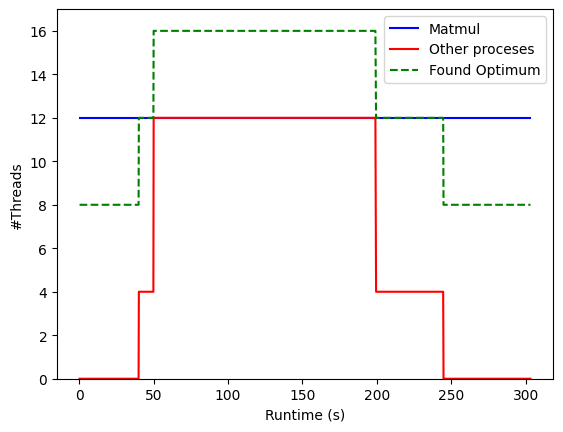

In [46]:
#data = [(221332733, 220885404, 9498388, 12), (180176721, 180012714, 8027263, 12), (180410957, 180025791, 8030741, 12), (183939837, 183947968, 8167704, 12), (184564754, 184016798, 8241433, 12), (180441401, 180035270, 8057658, 12), (180321160, 180018231, 8052714, 12), (183293922, 183937345, 8215921, 12), (183795185, 183977395, 8178995, 12), (183759464, 183965210, 8126383, 12), (180730479, 180058702, 8082377, 12), (180451908, 180035645, 8055705, 12), (180586671, 180046488, 8070658, 12), (180825429, 183731596, 8115030, 12), (184156904, 183916023, 8367593, 12), (180634078, 180050750, 8098857, 12), (184050539, 184001617, 8186197, 12), (180507686, 180037218, 8034342, 12), (183575247, 183962141, 8218180, 12), (180633543, 180049776, 8048991, 12), (180515625, 180040474, 8049479, 12), (183950832, 183994525, 8177469, 12), (180695960, 180057092, 8063578, 12), (183880427, 183987468, 8207560, 12), (180616841, 180045906, 8051066, 12), (182226358, 183846915, 8109781, 12), (180746221, 180061116, 8094828, 12), (183957705, 183993624, 8213541, 12), (205386316, 205729549, 8935341, 12), (180474554, 180034664, 8119425, 12), (180591675, 180043061, 8146463, 12), (182216962, 180176227, 8097087, 12), (180777935, 183728326, 8017679, 12), (180399147, 180031824, 8059184, 12), (184724430, 184057719, 8212625, 12), (180525282, 180041354, 8032206, 12), (181536685, 180126414, 8087504, 12), (183431149, 183951706, 8128824, 12), (180542950, 180043020, 8056498, 12), (180337677, 180026491, 8042338, 12), (184066968, 184001945, 8188700, 12), (181391876, 183780225, 8072733, 12), (184320019, 184024493, 8237284, 12), (180811387, 180066792, 8089273, 12), (180549185, 180044023, 8041301, 12), (180272440, 180020339, 8087259, 12), (183369080, 183945250, 8161234, 12), (180568131, 180045239, 8012675, 12), (180969235, 180079892, 8066630, 12), (180298220, 183678666, 8053446, 12), (182563721, 180211275, 8106058, 12), (181173659, 183761641, 8106120, 12), (180545869, 180038717, 8060587, 12), (183433672, 183945787, 8163065, 12), (180727526, 180058838, 8056742, 12), (180540544, 180043565, 8076456, 12), (180473782, 180037651, 8047831, 12), (180600674, 180044596, 8085246, 12), (180244415, 180018858, 8037150, 12), (184663773, 184054474, 8235574, 12), (208755308, 209369338, 9027626, 12), (194632179, 192216209, 8572976, 12), (195218012, 195930408, 8623086, 12), (192671870, 192054104, 8539224, 12), (193777044, 195812511, 8585366, 12), (192120476, 192007895, 8508279, 12), (183053173, 180253185, 8179178, 12), (186000532, 187829583, 8265909, 12), (188702224, 188056129, 8385355, 12), (185174753, 184096454, 8255106, 12), (186091198, 187839780, 8281411, 12), (188657744, 188051890, 8348368, 12), (187214690, 187932911, 8318277, 12), (186559305, 184207668, 8264383, 12), (192072123, 195665312, 8497659, 12), (186489310, 184205620, 8292093, 12), (186399077, 187865644, 8295145, 12), (189090016, 188089475, 8381387, 12), (186333049, 187857686, 8313638, 12), (188267832, 188021259, 8353494, 12), (188681734, 188055218, 8399515, 12), (188876974, 188072060, 8390787, 12), (184845162, 184067758, 8238931, 12), (185661525, 187803541, 8241495, 12), (188601952, 188046126, 8398172, 12), (182663109, 180220171, 8145426, 12), (188206343, 191681981, 8366983, 12), (188594497, 188047373, 8357828, 12), (185528522, 184126302, 8260477, 12), (187761610, 187975385, 8304666, 12), (185647972, 184135711, 8287271, 12), (185463548, 187786594, 8254190, 12), (185616768, 184132731, 8258463, 12), (186416408, 187865692, 8318094, 12), (186161563, 184178211, 8279276, 12), (187914090, 187990046, 8356180, 12), (185657997, 187796663, 8244913, 12), (189900419, 188157320, 8421060, 12), (184884185, 184072793, 8265481, 12), (188908307, 191740526, 8367960, 12), (187060175, 184251912, 8321878, 12), (187590313, 187964498, 8344705, 12), (184724132, 187725563, 8229105, 12), (185602587, 184129421, 8293436, 12), (187985135, 187997459, 8342203, 12), (191912101, 191990024, 8504617, 12), (183983904, 183996385, 8213602, 12), (184415626, 184032880, 8213296, 12), (187323088, 187940685, 8330668, 12), (185261766, 184104299, 8244119, 12), (182646175, 183885799, 8176554, 12), (185483178, 184118986, 8250894, 12), (187879041, 187988284, 8372110, 12), (186877371, 187905385, 8296244, 12), (185522897, 184121319, 8254678, 12), (186713460, 187891653, 8328287, 12), (187853735, 187984929, 8340067, 12), (183163901, 183921548, 8180521, 12), (187197625, 184264669, 8321511, 12), (188124396, 191675941, 8369425, 12), (187957844, 187995395, 8416360, 12), (183946192, 180326962, 8177714, 12), (188334172, 191691263, 8364480, 12), (182932517, 180243579, 8191813, 12), (212799365, 213244921, 9248084, 12), (180347398, 180027312, 8073893, 12), (180663377, 180052750, 8079020, 12), (180542479, 180044349, 8085733, 12), (180514361, 180039325, 8062297, 12), (181039487, 180085766, 8142313, 12), (180694782, 180056167, 8075113, 12), (180491450, 183706771, 8114848, 12), (180473081, 180037560, 8068522, 12), (181495055, 180121422, 8147806, 12), (180360905, 180028800, 8071695, 12), (180841494, 180069213, 8101298, 12), (180267419, 180018749, 8066142, 12), (181025205, 183750660, 8115762, 12), (180566643, 180045591, 8109294, 12), (181325274, 180102310, 8105997, 12), (182440637, 183868755, 8204447, 12), (183158258, 183927699, 8189615, 12), (180796527, 180065434, 8099833, 12), (180822773, 180065667, 8069681, 12), (183685304, 183973174, 8240153, 12), (182353748, 183859081, 8123270, 12), (180738462, 180060374, 8121256, 12), (180928174, 180074344, 8124796, 12), (180590868, 180047806, 8091227, 12), (182196606, 183848160, 8148722, 12), (180990375, 180079006, 8118753, 12), (187113223, 187924980, 8315958, 12), (183916584, 183991346, 8245584, 12), (180706483, 180057730, 8091654, 12), (180670784, 180053313, 8052958, 12), (181690574, 180139329, 8160380, 12), (180634340, 183716383, 8126383, 12), (180303677, 180024054, 8095438, 12), (182763090, 180224283, 8191202, 12), (183042640, 183917257, 8188334, 12), (182804092, 183895441, 8167093, 12), (180144057, 180004825, 8084086, 12), (180034972, 179999598, 8105753, 12), (181495467, 180123678, 8136332, 12), (181481462, 183788306, 8160623, 12), (181564847, 180127842, 8108927, 12), (180513577, 180041523, 8134806, 12), (181323416, 180107109, 8136637, 12), (180588749, 183714265, 8125407, 12), (184007626, 183996262, 8214273, 12), (181650259, 180136251, 8135904, 12), (180764805, 180061678, 8132243, 12), (182110994, 183841609, 8157083, 12), (182313300, 180189348, 8202921, 12), (184250336, 184018788, 8234232, 12), (180596665, 183715470, 8122111, 12), (180556933, 180042531, 8101114, 12), (183768041, 183979644, 8231730, 12), (182229725, 180182688, 8140482, 12), (183644108, 183968871, 8229044, 12), (181120876, 180088905, 8124246, 12), (183924629, 183992417, 8227518, 12), (187796297, 187981339, 8355204, 12), (180400282, 180026621, 8077799, 12), (180608411, 183714178, 8121012, 12), (180252190, 180020209, 8050516, 12), (180693897, 180056945, 8115763, 12), (184034191, 184000819, 8235392, 12), (183223260, 183933735, 8194131, 12), (180648974, 180053040, 8043742, 12), (181906127, 180156426, 8151407, 12), (180830114, 180066068, 8128153, 12), (185030810, 187751442, 8371622, 12), (185926774, 184156663, 8309671, 12), (187743353, 187977463, 8351236, 12), (184743321, 184059528, 8253214, 12), (186734743, 187891676, 8252908, 12), (183039681, 183917522, 8149516, 12), (182286172, 180188068, 8187418, 12), (219694780, 219972436, 9400244, 12), (185425559, 187784406, 8290934, 12), (185990339, 184160820, 8275918, 12), (185456441, 184120326, 8269693, 12), (182700466, 183889319, 8173441, 12), (185694162, 187803709, 8292948, 12), (187534650, 184289100, 8333231, 12), (187444418, 187951198, 8358133, 12), (186580376, 187879881, 8288186, 12), (187564008, 187961945, 8363199, 12), (181688419, 180138105, 8142618, 12), (186544236, 187876274, 8298624, 12), (186785353, 187897732, 8341165, 12), (187069756, 184251154, 8359598, 12), (191226278, 191934037, 8478982, 12), (185354455, 187777767, 8277384, 12), (181417560, 180115216, 8160990, 12), (185289823, 184106544, 8293619, 12), (184911902, 184072911, 8273111, 12), (182142739, 183844322, 8168558, 12), (187500628, 187954018, 8378152, 12), (187617509, 187964535, 8343485, 12), (187822323, 187983692, 8376871, 12), (187901327, 187990574, 8392922, 12), (187983377, 187993287, 8369364, 12), (188160686, 188010434, 8377115, 12), (187807588, 187982284, 8352639, 12), (187190113, 184259788, 8338907, 12), (184316187, 187692192, 8270792, 12), (187482341, 184286384, 8354043, 12), (187919113, 187991959, 8372904, 12), (184924750, 187741705, 8262064, 12), (181629186, 180134192, 8148721, 12), (187248422, 187935490, 8346354, 12), (187909246, 187991518, 8371560, 12), (188384139, 188024819, 8370523, 12), (186128086, 184175219, 8311319, 12), (184063001, 184003696, 8234110, 12), (184148862, 187677280, 8239054, 12), (184730210, 184059098, 8292093, 12), (182495722, 180204544, 8195596, 12), (184248147, 184019530, 8241068, 12), (187554087, 187959439, 8342020, 12), (183535139, 183959775, 8241312, 12), (185484751, 187789268, 8314737, 12), (191561422, 188294661, 8492654, 12), (185159246, 187760594, 8272134, 12), (189523815, 188124745, 8449381, 12), (187535596, 187954422, 8342019, 12), (187984703, 187997050, 8357218, 12), (184569215, 184046429, 8288492, 12), (182503867, 183872844, 8167581, 12), (188192773, 188014507, 8423563, 12), (218889678, 217260523, 9430456, 12), (206105707, 204173913, 9035317, 12), (180326621, 180026001, 8132120, 12), (183694915, 183969162, 8236429, 12), (180566258, 180045877, 8107767, 12), (180789059, 180063029, 8128459, 12), (180797993, 183731556, 8137857, 12), (180623430, 180051281, 8088419, 12), (188416072, 188021431, 8458353, 12), (205769114, 204144294, 9029396, 12), (207242395, 207932512, 9074989, 12), (204192070, 204014080, 8945778, 12), (205173242, 204096854, 8978065, 12), (203779745, 203978334, 8926552, 12), (205461034, 207782995, 8977699, 12), (204331560, 204023713, 8985267, 12), (204744778, 204056299, 8987465, 12), (205671228, 204136026, 8967140, 12), (204969335, 207743453, 8997475, 12), (201953780, 200159737, 8891640, 12), (203811212, 203982315, 8973243, 12), (205213272, 204099353, 8980568, 12), (203527386, 203959468, 8959877, 12), (203359616, 203943662, 8905190, 12), (206791443, 207896117, 9059303, 12), (205851670, 204151048, 9010170, 12), (206048663, 207836311, 9012672, 12), (205599574, 204131526, 8958412, 12), (205592958, 207797646, 9013038, 12), (205471138, 204119541, 8982643, 12), (204950640, 204077236, 8984108, 12), (204124093, 204008649, 8960060, 12), (204515699, 204041909, 8972145, 12), (205714041, 207805006, 9016396, 12), (205772904, 204143959, 8994606, 12), (205954494, 207826607, 9057044, 12), (205976905, 204158722, 8969216, 12), (205611976, 207799947, 9025184, 12), (205560885, 204128478, 9027260, 12), (208277916, 208018587, 9076942, 12), (206934342, 207910241, 9066932, 12), (205729388, 204142593, 9019020, 12), (205545282, 207793171, 8984962, 12), (203516325, 203957752, 8938820, 12), (206475909, 204202420, 8998879, 12), (229756212, 231811258, 9832189, 12), (205554428, 204128451, 8987831, 12), (205792795, 204147043, 9013404, 12), (203820652, 203984031, 8939736, 12), (206023116, 207831208, 8986488, 12), (205878559, 204154680, 9014686, 12), (204343625, 204027586, 8930153, 12), (203043560, 203918052, 8907448, 12), (205203810, 207764528, 8976051, 12), (204703963, 204055775, 8920815, 12), (206257135, 204180327, 8983559, 12), (206539256, 207877249, 9048743, 12), (204622078, 204049490, 8960366, 12), (205596464, 204131562, 8986183, 12), (206096862, 207838085, 8996315, 12), (205596975, 204131387, 9013587, 12), (204749524, 207727257, 8943276, 12), (206032351, 204165496, 9004371, 12), (207198862, 207931002, 9028725, 12), (204285452, 204020317, 8940040, 12), (206245271, 207852245, 9013466, 12), (206304511, 204172079, 9876562, 12), (204650150, 204050261, 9858922, 12), (206033686, 207824419, 9798315, 12), (205853025, 204145345, 9942296, 12), (208267588, 208017228, 10056981, 12), (204558534, 204041030, 9673132, 12), (205412189, 207778362, 9952734, 12), (206168582, 204176076, 9900975, 12), (205719746, 207795444, 9762732, 12), (204521427, 204038042, 9908971, 12), (204419665, 204005995, 9759435, 12), (205715725, 204132322, 9859594, 12), (204131034, 204005670, 9867040, 12), (220539244, 215392707, 10419896, 12), (238670121, 230890947, 11223726, 12), (266025702, 264687295, 12262969, 12), (265789436, 263979040, 12076752, 12), (270396085, 271388600, 12418669, 12), (265649339, 264147249, 11813812, 12), (268471618, 267347484, 12344634, 12), (269178512, 271661968, 12379546, 12), (264708501, 263733999, 11920136, 12), (266720954, 267864252, 12247405, 12), (251766332, 247615722, 11620454, 12), (269368023, 270422930, 12189422, 12), (286428769, 284153932, 13072110, 12), (251375095, 251913993, 11366426, 12), (262677848, 263882779, 11918548, 12), (285424238, 284059105, 13063932, 12), (262352613, 263848267, 11465302, 12), (294292942, 292182427, 13369473, 12), (277175072, 279681270, 12638945, 12), (267262138, 267928019, 12004302, 12), (278865803, 276205011, 12805204, 12), (280345812, 280025542, 12420501, 12), (268556593, 271660294, 12275115, 12), (288390768, 288024163, 13140896, 12), (259693543, 259970038, 11445101, 12), (302109978, 300095165, 13737025, 12), (261357615, 260097292, 11908966, 12), (282900550, 283893304, 12750578, 12), (292288006, 291995845, 13269558, 12), (260870207, 260063944, 11442293, 12), (285613275, 287760330, 13071927, 12), (300165314, 300009160, 13504970, 12), (265668612, 264130441, 12087982, 12), (288710357, 288050195, 13213101, 12), (256395265, 259671191, 11188142, 12), (292031496, 291985516, 13289395, 12), (280353361, 279956783, 12724516, 12), (254774909, 252222204, 11301851, 12), (292871710, 295711774, 13436611, 12), (284520104, 284036216, 12558134, 12), (287356769, 287913901, 13057279, 12), (293034522, 292079378, 13255520, 12), (265487995, 264097120, 11713532, 12), (277544483, 279787434, 12807279, 12), (257812793, 256142535, 11537813, 12), (278466656, 279854181, 12498197, 12), (274440595, 272196983, 12615691, 12), (252512879, 251987448, 11132540, 12), (251715418, 251936319, 11770294, 12), (251693968, 251967837, 11766083, 12), (252102615, 251993107, 11693452, 12), (252342367, 252023176, 11860321, 12), (251618404, 251947643, 11459749, 12), (251700626, 251947198, 11834198, 12), (251087989, 252005994, 11447602, 12), (252495105, 251901840, 11899384, 12), (252004348, 251958114, 11732697, 12), (251512525, 251944286, 11680878, 12), (251970835, 251978832, 11836274, 12), (251177210, 251875816, 11528229, 12), (251911772, 251967704, 11821809, 12), (251674857, 251968630, 11223237, 12), (252122715, 252005016, 11823823, 12), (251355708, 251937818, 11735626, 12), (251814637, 248310103, 11687409, 12), (252390983, 255678989, 11862031, 12), (251957159, 251980233, 11583954, 12), (251574859, 248278910, 11812470, 12), (252153829, 255639510, 11578584, 12), (252259296, 252018167, 11833282, 12), (251987266, 251991562, 11742951, 12), (251569771, 248242751, 11704682, 12), (251488907, 251934897, 11839325, 12), (251873885, 251960672, 11624849, 12), (252032301, 251969594, 11831085, 12), (251707465, 251968790, 11492891, 12), (252059394, 251995832, 11801483, 12), (251541628, 251949541, 11623750, 12), (251377908, 251925172, 11787689, 12), (251389264, 251943740, 11764618, 12), (252031971, 251979700, 11671540, 12), (251899522, 251987475, 11815339, 12), (251877569, 251971249, 11559663, 12), (251416127, 251895339, 11783112, 12), (251734680, 251959534, 11519868, 12), (252015211, 251981919, 11827118, 12), (252528065, 252034923, 11744904, 12), (251959468, 251961181, 11733002, 12), (251916059, 251950619, 11820587, 12), (252061648, 251990091, 11642854, 12), (251481821, 251938016, 11818756, 12), (251801884, 251976755, 11493623, 12), (251897447, 251977124, 11772858, 12), (252412654, 252029551, 11676118, 12), (251849511, 251919385, 11817230, 12), (252444311, 251926373, 11803925, 12), (251561839, 251607629, 11683198, 12), (252423272, 251682908, 11828766, 12), (252150272, 251957994, 11555573, 12), (251511613, 251937481, 11822785, 12), (251659890, 251966873, 11503144, 12), (252270687, 251171756, 11831940, 12), (251767504, 251968697, 11738312, 12), (252196561, 252003945, 11754670, 12), (251492903, 248284610, 11771576, 12), (252539638, 255697925, 11657197, 12), (251837024, 251960465, 11823212, 12), (251801743, 251927966, 11480683, 12), (252076718, 251969869, 11847565, 12), (251713390, 248302444, 11565156, 12), (252509608, 255698293, 11881562, 12), (252086848, 251997357, 11781708, 12), (251905912, 251989424, 11687104, 12), (252127768, 252006151, 11828461, 12), (251557424, 251914693, 11520295, 12), (252443390, 252014843, 11854889, 12), (251972037, 251987600, 11523835, 12), (252104569, 252002779, 11835053, 12), (251796082, 251973367, 11697358, 12), (252034097, 251926244, 11750763, 12), (252453632, 252033119, 11794586, 12), (251999035, 251969799, 11630891, 12), (252147515, 251991396, 11830048, 12), (251650200, 251956233, 11509980, 12), (252053659, 252001541, 11826081, 12), (251738029, 251971279, 11594025, 12), (262693835, 256802759, 12279754, 12), (251766514, 251969176, 11686921, 12), (251871038, 251954730, 11457978, 12), (251758221, 251955974, 11799836, 12), (251260994, 251872156, 11341218, 12), (251725664, 251968729, 11659211, 12), (251836459, 251983382, 11763825, 12), (251351667, 251930847, 11169893, 12), (252349645, 251951008, 11851105, 12), (252086002, 251992842, 11703278, 12), (252266751, 252018449, 11363802, 12), (251636692, 251954009, 11807770, 12), (251242634, 251910265, 11498506, 12), (252549000, 252039540, 11823639, 12), (251587207, 251963129, 11713349, 12), (251762425, 251947604, 11681061, 12), (251546359, 248209993, 11766999, 12), (252032480, 251993899, 11396516, 12), (252202751, 255679550, 11833466, 12), (251654478, 248296642, 11625092, 12), (251663779, 251945616, 11731965, 12), (251634793, 251946901, 11803314, 12), (251859970, 251951914, 11508455, 12), (251979666, 251987146, 11831634, 12), (251337069, 251934513, 11439546, 12), (251957416, 251983470, 11814118, 12), (251536874, 251944768, 11715607, 12), (252097144, 251991803, 11673860, 12), (251736853, 251887662, 11826263, 12), (252311749, 252017360, 11453096, 12), (252503320, 252030583, 11852203, 12), (251739218, 251969703, 11649873, 12), (251523773, 251953620, 11699982, 12), (252108449, 252000068, 11782685, 12), (251876024, 251986476, 11568391, 12), (252361733, 252024131, 11820343, 12), (251591689, 251929289, 11438325, 12), (252204585, 252009415, 11831147, 12), (251554656, 251959501, 11738861, 12), (252366437, 252020527, 11687287, 12), (251952326, 251941629, 11822113, 12), (251993095, 251939386, 11456941, 12), (252111834, 251994671, 11808930, 12), (251402047, 251944106, 11608796, 12), (252034933, 251979309, 11750092, 12), (251422084, 251943406, 11770295, 12), (251759321, 251977687, 11527192, 12), (251573786, 251869319, 11795685, 12), (252416641, 251875631, 11490571, 12), (252070508, 251992997, 11810761, 12), (251760104, 251976689, 11760163, 12), (303611875, 299641094, 13688807, 12), (251741468, 248392431, 11755341, 12), (252166115, 251838955, 11639924, 12), (251478963, 251954998, 11816987, 12), (251701119, 251966235, 11816987, 12), (251463587, 251930565, 11765961, 12), (251742637, 251963295, 11720673, 12), (251730047, 251964680, 11674653, 12), (251793140, 251978105, 11814667, 12), (252404643, 252007692, 11514375, 12), (252045430, 251965756, 11824799, 12), (251612528, 251965877, 11470551, 12), (251584108, 251950635, 11832245, 12), (252140376, 251596827, 11780061, 12), (252180496, 251979782, 11627899, 12), (251951039, 251991777, 11800446, 12), (251951506, 251993486, 11440279, 12), (251650071, 251927779, 11802582, 12), (251630515, 251955020, 11681305, 12), (252201136, 252005480, 11750642, 12), (251630220, 251962551, 11784821, 12), (252285942, 252008653, 11557587, 12), (251668935, 251966232, 11782807, 12), (251230351, 251920880, 11442659, 12), (252138402, 252004385, 11855621, 12), (252045420, 251916205, 11779145, 12), (251978640, 251952346, 11639557, 12), (251808346, 251976348, 11777314, 12), (251637974, 248296124, 11438325, 12), (252344405, 255684459, 11869416, 12), (251831296, 248281510, 11649445, 12), (251542427, 251957245, 11714447, 12), (251749428, 251974261, 11802705, 12), (251691592, 251938446, 11464020, 12), (251566279, 251957893, 11835969, 12), (251511961, 251955248, 11481843, 12), (251477439, 251900042, 11819306, 12), (251678947, 251876456, 11752716, 12), (251104534, 251912158, 11576509, 12), (252263630, 252007901, 11832733, 12), (251458665, 251946978, 11380586, 12), (251676386, 248279882, 11828095, 12), (251660848, 251966365, 11714570, 12), (251638332, 251967377, 11660187, 12), (251677246, 251964626, 11844269, 12), (251943608, 251967445, 11502229, 12), (252420971, 252011319, 11831269, 12), (251358975, 251942100, 11518037, 12), (251406126, 251946019, 11791962, 12), (252160565, 251940772, 11789093, 12), (251888768, 251955726, 11654084, 12), (251603716, 251960890, 11822418, 12), (251358095, 251939075, 11386202, 12), (251841753, 251954693, 11835724, 12), (252006010, 251994498, 11743500, 12), (273773964, 261997936, 12730558, 12), (290063040, 267516399, 13465481, 12), (252000672, 248776602, 11645356, 12), (257892392, 252915974, 11931671, 12), (254429563, 247194824, 11758454, 12), (282414657, 271821796, 12974088, 12), (321818332, 312567251, 14521996, 12), (304560389, 300842040, 13807277, 12), (304713008, 299266518, 13856654, 12), (253964794, 250752087, 11766327, 12), (264658541, 260502575, 12172882, 12), (278846253, 274679469, 12125152, 12), (253100314, 245267281, 11739166, 12), (253647626, 252087026, 11753571, 12), (270092028, 271820027, 12241363, 12), (253081732, 252082709, 11688752, 12), (254555649, 255813772, 11783905, 12), (253732020, 252136959, 11678864, 12), (252968042, 252076768, 11685578, 12), (259802867, 259977420, 11945282, 12), (273276548, 275680149, 12436614, 12), (253512079, 252097641, 11775177, 12), (263567131, 263959372, 12157257, 12), (253017958, 252067436, 11488862, 12), (256013237, 255978184, 11903168, 12), (263439388, 263945718, 12122649, 12), (252648297, 252050693, 11451387, 12), (262077126, 263799125, 12123077, 12), (252837799, 252014229, 11724030, 12), (252920046, 252071173, 11463350, 12), (253573646, 252116204, 11763702, 12), (269715924, 271800618, 12396819, 12), (253593597, 252113894, 11495332, 12), (266607982, 267878249, 12374358, 12), (276467642, 276033918, 12657927, 12), (258348018, 259854244, 11771698, 12), (278249273, 276165263, 12762602, 12), (260286410, 260018285, 11886078, 12), (253144401, 255756934, 11621857, 12), (259794603, 259960091, 12035431, 12), (254791018, 252195629, 11546906, 12), (253034565, 255749373, 11638825, 12), (270929134, 268234656, 12506743, 12), (273554809, 275791207, 12261138, 12), (271335907, 268266427, 12462554, 12), (265458250, 267770441, 12268523, 12), (253006133, 252077188, 11409639, 12), (258118378, 259817289, 11988373, 12), (307926750, 307685534, 13950464, 12), (270793718, 268123534, 12290313, 12), (282658063, 283880464, 12962491, 12), (251718660, 251969595, 11463045, 12), (264822989, 264061195, 12133086, 12), (263967723, 263993586, 12214996, 12), (283912927, 283982671, 12670683, 12), (289268527, 288101420, 13216458, 12), (285376515, 287773926, 12944852, 12), (263865204, 263927661, 12081329, 12), (259803702, 259953096, 12048797, 12), (254564871, 252210355, 11597810, 12), (296909113, 299719528, 13413723, 12), (266136831, 264168132, 12249602, 12), (253253758, 252095747, 11383272, 12), (253113972, 255757134, 11736115, 12), (265808089, 264142789, 12263030, 12), (252999724, 252075646, 11440522, 12), (253624760, 255793510, 11705659, 12), (252869261, 252055798, 11763092, 12), (256075373, 256000979, 11636628, 12), (265441557, 264105704, 12234344, 12), (266162848, 267825949, 12256133, 12), (263753111, 263975511, 11976105, 12), (281497715, 280115795, 12877774, 12), (258649734, 259877993, 11938446, 12), (257516291, 256119321, 11700837, 12), (253332429, 255758286, 11802033, 12), (252998442, 252079158, 11660370, 12), (253932352, 252142626, 11599031, 12), (253795002, 255813157, 11754669, 12), (257427394, 256107575, 11896210, 12), (253004475, 252077842, 11474397, 12), (276177804, 276007763, 12684294, 12), (252999053, 255747711, 11661469, 12), (264957326, 264075023, 12098907, 12), (259182153, 259925350, 11992767, 12), (261672123, 260130852, 11942352, 12), (255091351, 255922304, 11677644, 12), (254142978, 252160965, 11788727, 12), (271976486, 271989301, 12286651, 12), (252964657, 255734949, 11668427, 12), (254035566, 252166669, 11807831, 12), (253184961, 255751936, 11544099, 12), (253539775, 252119586, 11640229, 12), (260840548, 260058874, 12083770, 12), (253478894, 255787764, 11585664, 12), (253550186, 252123466, 11681794, 12), (261371890, 260047119, 12058196, 12), (252955095, 252060872, 11538606, 12), (265305624, 267751055, 12069427, 12), (255207692, 255931229, 11891205, 12), (253580760, 252125154, 11509309, 12), (259585217, 259947690, 11857025, 12), (271514619, 271781200, 12433501, 12), (255746215, 255971981, 11495698, 12), (274413346, 272187716, 12446807, 12), (253066570, 255747855, 11757660, 12), (252519518, 252015403, 11357820, 12), (253106087, 252086903, 11658662, 12), (278484618, 279858978, 12770841, 12), (252559866, 252043805, 11328401, 12), (252987019, 252078582, 11683015, 12), (252322738, 252018467, 11680512, 12), (254681804, 255724102, 11520905, 12), (251949076, 251992630, 11607637, 12), (254768878, 252222075, 11789093, 12), (256852147, 259730865, 11631684, 12), (253417421, 252098175, 11625153, 12), (265022643, 264081813, 12210052, 12), (252913422, 255730110, 11431184, 12), (253170826, 252089674, 11667207, 12), (271047582, 271906271, 12396697, 12), (252994624, 252079777, 11366121, 12), (252881945, 252060029, 11654633, 12), (251835052, 251976112, 11676118, 12), (252943813, 252071492, 11474213, 12), (252904419, 252072563, 11637727, 12), (258457451, 259856508, 11946930, 12), (252060634, 245304275, 11548371, 12), (261598847, 260123976, 11937042, 12), (252927735, 255740564, 11720551, 12), (260311536, 260020728, 11713593, 12), (252744862, 252057484, 11618135, 12), (255661126, 255950722, 11794525, 12), (253021048, 252082155, 11477022, 12), (285164532, 284088906, 12866239, 12), (277232104, 279708360, 12635160, 12), (253126192, 252072230, 11252535, 12), (255066059, 255873193, 11756745, 12), (253295881, 251729694, 11725800, 12), (257034230, 256075088, 11596284, 12), (267867570, 267984257, 12268706, 12), (269381417, 271778481, 12328154, 12), (252730785, 252034267, 11449068, 12), (259194023, 259924621, 11925628, 12), (252686347, 252052481, 11643281, 12), (253038487, 252082898, 11437593, 12), (279224911, 279912450, 12709074, 12), (264984114, 264076136, 12115447, 12), (252910026, 252046362, 11514924, 12), (283241341, 283930004, 12895048, 12), (295537882, 295968733, 13164700, 12), (252845583, 252032500, 11678803, 12), (271290098, 271924658, 12403228, 12), (252577415, 252044797, 11358857, 12), (252240421, 252006136, 11662629, 12), (261112657, 263745456, 12015717, 12), (255336632, 252271348, 11519562, 12), (251112603, 251920580, 11599702, 12), (260749491, 260043571, 11993317, 12), (252916827, 255738287, 11435029, 12), (252770262, 252057889, 11654511, 12), (252593603, 252045376, 11647126, 12), (264716286, 264037165, 11912872, 12), (267741395, 267960950, 12291717, 12), (272732370, 272055002, 12457732, 12), (253153436, 255753699, 11419160, 12), (255892156, 255961500, 11790009, 12), (260564679, 260040372, 11956878, 12), (252604987, 252036057, 11396273, 12), (310655685, 311878701, 13997889, 12), (251935722, 251986382, 11559052, 12), (257205968, 256096587, 11764191, 12), (252675555, 252053256, 11622285, 12), (266113756, 267778116, 12025604, 12), (261279336, 260089481, 11942108, 12), (281092678, 280079089, 12804899, 12), (263262454, 263934627, 11734589, 12), (252779925, 252050993, 11634980, 12), (254970973, 255892630, 11730133, 12), (254107854, 252171445, 11479036, 12), (253325827, 255769907, 11626557, 12), (263264558, 263740819, 12107757, 12), (269392557, 268105096, 12060882, 12), (266691639, 267876367, 12220428, 12), (264337846, 264019316, 12106781, 12), (257537264, 256120734, 11590851, 12), (260472485, 260020392, 11992828, 12), (253247505, 252099958, 11679231, 12), (252904954, 255733517, 11364106, 12), (281710388, 280130397, 12856535, 12), (252623173, 252047548, 11616975, 12), (252639185, 252047956, 11415742, 12), (255756159, 255973572, 11783234, 12), (252937489, 255710660, 11655549, 12), (256825144, 256050778, 11623261, 12), (258840271, 259899741, 11880463, 12), (252856424, 252061904, 11609040, 12), (252921108, 252055755, 11417512, 12), (288191419, 288011163, 13079984, 12), (252725721, 252047642, 11607636, 12), (252931628, 252088821, 11516389, 12), (263976991, 263953608, 12102630, 12), (281638815, 283785780, 12671171, 12), (263010116, 263910279, 12014007, 12), (269839539, 268144530, 12338470, 12), (257811100, 259811170, 11541657, 12), (252648910, 252050162, 11600373, 12), (272885829, 272067643, 12480865, 12), (252807339, 252057480, 11401215, 12), (256965935, 256063393, 11806367, 12), (252639479, 255716804, 11624848, 12), (263398610, 260221539, 11881927, 12), (252711676, 255700684, 11592378, 12), (281693058, 280136410, 12810392, 12), (253446225, 252105879, 11409456, 12), (261943577, 263817896, 12039459, 12), (279446269, 279938676, 12687345, 12), (266087103, 264154314, 12029327, 12), (258193139, 259845531, 11871979, 12), (276837957, 276058648, 12531279, 12), (254823801, 255880866, 11642915, 12), (283644085, 283947349, 12948941, 12), (252477300, 252034995, 11386263, 12), (252815447, 252060114, 11628449, 12), (275853612, 275972495, 12593534, 12), (254909534, 255887637, 11487520, 12), (265765689, 264136702, 12151153, 12), (263033876, 263820515, 12077239, 12), (252679676, 251748827, 11340181, 12), (252500916, 252025172, 11657685, 12), (253775106, 255805338, 11658113, 12), (252900641, 252057843, 11492951, 12), (251376322, 251941243, 11556367, 12), (289818406, 288131076, 13152066, 12), (252738581, 252053777, 11307100, 12), (256718477, 255580403, 11843720, 12), (286097260, 279418424, 13052884, 12), (252165838, 247741612, 11501008, 12), (255307808, 255263416, 11806610, 12), (264979689, 264073026, 12183929, 12), (251678990, 251940153, 11436738, 12), (268025603, 264231894, 12385528, 12), (252805339, 246164396, 11750458, 12), (252315381, 252011962, 11500581, 12), (254587390, 255865017, 11780244, 12), (271439399, 271942709, 12430327, 12), (252148886, 251996517, 11526765, 12), (266135175, 264173498, 12276641, 12), (255219044, 255913548, 11704071, 12), (255854983, 255977812, 11748810, 12), (251922924, 251912757, 11738068, 12), (251580206, 251957412, 11479585, 12), (252642651, 252050515, 11552400, 12), (270023475, 271829101, 12454802, 12), (251740131, 251968597, 11576570, 12), (252100679, 252004638, 11512971, 12), (252877554, 252053791, 11757477, 12), (271813584, 271969767, 12374114, 12), (250068342, 248149244, 11470368, 12), (281910235, 283821132, 12918546, 12), (253141121, 252078289, 11516572, 12), (252984153, 252069956, 11629731, 12), (255433745, 255945842, 11873688, 12), (252578305, 252042405, 11554780, 12), (252613582, 255699017, 11602204, 12), (252998578, 252073841, 11732148, 12), (251971259, 251989758, 11519929, 12), (252516126, 252038496, 11555207, 12), (264215900, 264012004, 12227386, 12), (257453266, 256115205, 11798859, 12), (251650050, 251954682, 11423555, 12), (281559577, 283778044, 12920133, 12), (252354594, 252016900, 11511506, 12), (260227192, 260009736, 11905792, 12), (251520782, 251946453, 11702424, 12), (251308926, 251937023, 11430024, 12), (258223671, 256153779, 11842255, 12), (261313636, 260100743, 12079437, 12), (263091694, 263903225, 11811066, 12), (256883022, 256038173, 11840973, 12), (253274964, 255766624, 11775116, 12), (250815388, 248223849, 11425386, 12), (252734073, 255717576, 11615754, 12), (257572470, 256127714, 11930512, 12), (252719608, 252055603, 11530488, 12), (252085095, 251998570, 11514497, 12), (255550850, 255956405, 11884491, 12), (250941753, 251892880, 11534821, 12), (252265513, 252016061, 11490144, 12), (250161280, 248098911, 11655671, 12), (251406650, 251941404, 11610688, 12), (250745676, 251880955, 11343233, 12), (255930110, 255990082, 11863983, 12), (258022476, 256153970, 11897369, 12), (252593773, 255711707, 11426851, 12), (257181871, 256078623, 11927093, 12), (250977919, 251894253, 11676789, 12), (253000787, 252074604, 11426973, 12), (254504666, 255854392, 11829316, 12), (264819021, 264049472, 12234709, 12), (257553772, 256116427, 11682893, 12), (252965954, 252068769, 11791901, 12), (252973219, 255742971, 11742829, 12), (252862112, 252054398, 11329805, 12), (249512883, 248117058, 11607209, 12), (254421538, 255851692, 11814056, 12), (252629738, 252047182, 11479402, 12), (256883350, 256057699, 11967133, 12), (252484670, 252033308, 11778229, 12), (252659794, 255702999, 11405671, 12), (257207555, 256095072, 11948456, 12), (252933694, 252057244, 11749604, 12), (252793302, 252058204, 11485871, 12), (253983345, 255824863, 11836762, 12), (251390784, 251942393, 11699433, 12), (252818731, 252063457, 11541230, 12), (253014572, 252066148, 11727265, 12), (252871037, 252063859, 11755585, 12), (255532223, 255936153, 11638947, 12), (252547572, 251982419, 11659211, 12), (252786581, 252038207, 11747346, 12), (252812955, 252053866, 11532197, 12), (252450493, 252030181, 11637482, 12), (266917551, 267893383, 12321013, 12), (252522758, 252033294, 11491426, 12), (254135477, 252169291, 11737885, 12), (275263467, 275932943, 12615629, 12), (252591082, 252029150, 11439485, 12), (252691654, 251991861, 11699922, 12), (259951043, 259978663, 12033294, 12), (253055878, 255747572, 11465058, 12), (252656253, 252049452, 11736115, 12), (253039593, 252053925, 11799226, 12), (253021511, 252077806, 11477082, 12), (266877787, 267901221, 12263579, 12), (252736267, 252040633, 11804292, 12), (252779611, 252042075, 11213350, 12), (257215372, 259755498, 11881500, 12), (274195625, 272151330, 12641752, 12), (252465253, 252020318, 11199740, 12), (252999050, 255737548, 11773712, 12), (253176633, 252090106, 11824494, 12), (252688027, 252052865, 11220369, 12), (253104689, 252070751, 11758271, 12), (252949700, 255579766, 11754486, 12), (252019704, 251995592, 11317965, 12), (252902859, 252069782, 11672516, 12), (252483487, 252036269, 11759125, 12), (252697615, 252040341, 11314119, 12), (253012888, 252078529, 11668244, 12), (253041360, 255747234, 11800019, 12), (252620648, 252027507, 11294221, 12), (251833836, 251973360, 11479402, 12), (253496754, 252117164, 11844208, 12), (251837497, 251970592, 11401826, 12), (252540242, 252037261, 11506075, 12), (271688974, 271953917, 12578459, 12), (252981312, 252075440, 11426972, 12), (252298336, 252006868, 11485933, 12), (252972592, 250149852, 11864654, 12), (253014359, 252078325, 11495454, 12), (257875565, 256146824, 11689790, 12), (272736439, 275721580, 12610380, 12), (253637273, 252132494, 11410738, 12), (251003996, 251908353, 11477326, 12), (252603251, 252043536, 11815888, 12), (252999177, 252064411, 11423249, 12), (252683773, 251989162, 11397859, 12), (252352755, 252005027, 11764253, 12), (253069322, 255748785, 11658600, 12), (252779718, 252049371, 11379549, 12), (261263617, 260096443, 12147246, 12), (252700583, 252054306, 11577180, 12), (251794754, 251976738, 11316133, 12), (252809588, 255712687, 11735078, 12), (252889939, 252061024, 11668000, 12), (252683725, 252051838, 11184602, 12), (256362839, 256022063, 11913788, 12), (258684501, 259865330, 11968903, 12), (252726303, 252039613, 11295198, 12), (253360601, 252110656, 11821320, 12), (257852324, 259811694, 11940582, 12), (251739618, 251958539, 11173006, 12), (252508528, 252033231, 11769806, 12), (253207683, 252090012, 11780854, 12), (252822795, 252062041, 11146578, 12), (256899792, 259725403, 11979644, 12), (257062578, 256077918, 11938141, 12), (252841835, 252053897, 11202181, 12), (252714644, 252051636, 11822540, 12), (276842472, 276048162, 12740629, 12), (252729972, 255719509, 11214510, 12), (252551030, 252042144, 11772797, 12), (251565257, 251958341, 11739045, 12), (252337009, 252021977, 11165560, 12), (252919074, 252068283, 11807343, 12), (276402693, 276028134, 12702238, 12), (251820348, 251980430, 11240205, 12), (255297747, 255920146, 11888397, 12), (252603752, 252021423, 11755830, 12), (252445407, 252033067, 11170259, 12), (253015090, 252066723, 11787079, 12), (252978345, 255736805, 11786164, 12), (252655766, 252047696, 11229952, 12), (252589489, 252044199, 11764435, 12), (251472467, 251950789, 11723664, 12), (261978752, 260087375, 11582917, 12), (252970612, 255730149, 11770905, 12), (252626282, 252047373, 11789948, 12), (252566186, 252035643, 11220308, 12), (252287286, 251995516, 11706025, 12), (252738576, 252050123, 11767670, 12), (252821492, 252065508, 11268709, 12), (253170813, 255759391, 11679108, 12), (257208036, 256075832, 12014984, 12), (252656923, 252041464, 11240328, 12), (251933034, 251989853, 11581940, 12), (252719561, 252042005, 11817048, 12), (253179852, 255756153, 11307527, 12), (252223646, 252013818, 11564667, 12), (272493555, 272036679, 12600493, 12), (253137691, 252089491, 11259432, 12), (252951234, 252054937, 11642731, 12), (252766409, 252045050, 11821381, 12), (252980983, 255743421, 11307466, 12), (272424496, 272028198, 12377166, 12), (255760096, 255996634, 11925567, 12), (260460111, 259997873, 11471956, 12), (264060206, 264001253, 12106536, 12), (252900940, 252069727, 11767731, 12), (252314100, 252001742, 11218294, 12), (252629408, 252043672, 11628755, 12), (276734121, 276053282, 12776945, 12), (252060617, 251989936, 11146394, 12), (252829671, 255722433, 11696382, 12), (259177275, 259928387, 12056976, 12), (251995083, 251995862, 11186922, 12), (252830898, 252049819, 11693268, 12), (252554616, 252036988, 11754425, 12), (252766860, 252059035, 11303743, 12), (252756462, 252058263, 11636689, 12), (253083540, 255749016, 11779328, 12), (255559680, 252287752, 11416109, 12), (252878227, 255735671, 11569550, 12), (258904150, 256238563, 12030060, 12), (252806157, 255660649, 11321809, 12), (253065559, 252057791, 11416536, 12), (252656216, 252051297, 11799896, 12), (252912796, 252063795, 11537202, 12), (252646074, 252043668, 11584809, 12), (252821991, 255728335, 11755769, 12), (252617169, 252032083, 11362397, 12), (257018662, 256082749, 11701875, 12), (264880231, 264048608, 12280364, 12), (252624889, 252043653, 11308565, 12), (253136151, 255740110, 11566559, 12), (255292703, 252269957, 11877533, 12), (292116958, 292317773, 12796904, 12), (276073316, 275996620, 12619413, 12), (252550610, 252036775, 11801606, 12), (255282588, 252269148, 11195161, 12), (252977314, 255722726, 11751252, 12), (262167934, 260153654, 12157012, 12), (252721945, 252053648, 11172762, 12), (265705746, 267792465, 12265350, 12), (252780600, 252053341, 11794647, 12), (258719058, 259877476, 11344759, 12), (252873890, 252066604, 11744049, 12), (256700675, 256055727, 11933381, 12), (252491038, 252013792, 11220064, 12), (252805920, 252062874, 11724091, 12), (252788981, 252057726, 11797943, 12), (252659588, 251772820, 11264253, 12), (292635606, 281122681, 13439602, 12), (263737933, 250873320, 12203643, 12), (278555519, 258403749, 12764066, 12), (385699384, 363058705, 17244158, 12), (252974732, 252055554, 11447480, 12), (253844173, 255817044, 11834076, 12), (255652528, 255950678, 11739472, 12), (252968150, 252068958, 11424959, 12), (254431827, 255855854, 11833710, 12), (263394318, 260279292, 12078155, 12), (257897934, 259820434, 11696625, 12), (254697186, 255792551, 11852021, 12), (255275381, 252264055, 11702545, 12), (250476120, 251858672, 11390047, 12), (255566934, 255960241, 11868988, 12), (254361136, 252193549, 11716462, 12), (252539186, 255704302, 11257234, 12), (256728125, 256057356, 11952911, 12), (254896164, 252235413, 11776459, 12), (252819597, 255704921, 11457186, 12), (257019417, 256056694, 11931976, 12), (260612805, 259985618, 11961639, 12), (252683001, 252047236, 11389802, 12), (254289702, 255836558, 11816315, 12), (254504360, 252201746, 11792573, 12), (252278986, 255684352, 11358980, 12), (255115455, 252254022, 11861725, 12), (256477130, 256014154, 11871490, 12), (252764505, 255437020, 11397615, 12), (256999126, 255973782, 11933929, 12), (262326080, 260187473, 12054047, 12), (252995538, 255719942, 11383943, 12), (256105011, 256001259, 11913727, 12), (253957250, 252132193, 11739044, 12), (252977519, 252077582, 11421358, 12), (256068453, 259643851, 11881866, 12), (254352520, 252188675, 11750947, 12), (252722068, 252042922, 11429597, 12), (253178727, 255756484, 11751191, 12), (271152097, 268245628, 12469267, 12), (252764905, 255701701, 11363374, 12), (265702111, 264111380, 12299163, 12), (273716040, 272120730, 12513884, 12), (251086042, 251897275, 11324983, 12), (260094766, 259999696, 12067169, 12), (271927660, 271988569, 12418181, 12), (252084947, 252002551, 11500093, 12), (254582683, 255873920, 11838043, 12), (254800473, 255890818, 11714570, 12), (252714527, 252056353, 11392854, 12), (256815521, 255999484, 11948944, 12), (255412034, 255915802, 11757172, 12), (252470930, 252032356, 11400422, 12), (256058186, 255975285, 11893281, 12), (254257275, 255842609, 11725067, 12), (253075912, 252083933, 11401460, 12), (255358019, 255938982, 11864655, 12), (254720947, 252223546, 11779694, 12), (252256987, 251999995, 11355928, 12), (268955932, 271738775, 12419768, 12), (266476510, 264175047, 12240569, 12), (252919409, 252056883, 11485811, 12), (271687510, 271961906, 12547087, 12), (252649499, 255700943, 11599884, 12), (252592911, 252043126, 11494905, 12), (256315923, 256021640, 11908417, 12), (254429576, 252171615, 11663788, 12), (251755366, 251011357, 11357026, 12), (263911877, 257709384, 12219512, 12), (269602829, 251094942, 12619109, 12), (395240439, 379400133, 17299699, 12), (279371942, 260534965, 12847746, 12), (268212264, 261966506, 12205474, 12), (268299164, 255143981, 12332060, 12), (287732958, 277758127, 13190213, 12), (251787948, 249584692, 11594575, 12), (251090705, 248897099, 11598298, 12), (252323908, 247463274, 11720551, 12), (262030630, 258542338, 12070892, 12), (213250044, 207325332, 10074742, 12), (263635573, 260785499, 12202178, 12), (240637877, 237044518, 10925387, 12), (267961617, 264363437, 12169341, 12), (275356245, 273236941, 12542083, 12), (253885233, 248574488, 11472749, 12), (279049482, 276930663, 12709867, 12), (285036633, 284024597, 12977995, 12), (254786381, 255788163, 11718536, 12), (253914633, 255750314, 11733918, 12), (256233083, 256014696, 11790558, 12), (253816261, 252125388, 11673982, 12), (260416336, 260024765, 11950348, 12), (264678140, 264047879, 12154082, 12), (255013006, 255902169, 11733308, 12), (254346399, 255846719, 11725006, 12), (256063187, 256001841, 11787446, 12), (257897293, 256144100, 11800812, 12), (254378283, 255859432, 11710053, 12), (255148435, 255911331, 11755158, 12), (253957709, 252155307, 11564790, 12), (262345980, 263792262, 12032135, 12), (258562065, 256180391, 11908416, 12), (253889683, 255817355, 11585420, 12), (255137657, 255924071, 11811981, 12), (254742549, 252212777, 11752168, 12), (254607260, 255882128, 11538422, 12), (259279530, 259588336, 11962982, 12), (259532940, 259936737, 11980805, 12), (254051265, 252159377, 11663300, 12), (268601813, 268048840, 12323027, 12), (258770060, 259863739, 11952912, 12), (254763338, 255889920, 11133760, 12), (253845951, 252145980, 10895541, 12), (255447557, 255953225, 10921847, 12), (254377783, 255861390, 10934970, 12), (254183950, 252176145, 10873812, 12), (254337166, 255859963, 10883334, 12), (253560369, 252124264, 10866183, 12), (254901456, 255442528, 10957736, 12), (254702486, 255871540, 11220431, 12), (253773012, 252143613, 11147493, 12), (254740782, 255892098, 11155794, 12), (254423709, 252196581, 11062838, 12), (255079851, 255916078, 10919101, 12), (253854955, 255819561, 10863741, 12), (253902662, 252157312, 10852023, 12), (254748038, 255891263, 10902927, 12), (253976887, 252156782, 10855868, 12), (253703561, 255801530, 10863070, 12), (253543382, 252125675, 10821567, 12), (254537380, 255875298, 10893954, 12), (254108617, 252171377, 10858431, 12), (254458157, 255870559, 10856235, 12), (253125481, 252092800, 10824496, 12), (253568081, 252128138, 10865023, 12), (254011150, 255827285, 10859958, 12), (254416043, 255867078, 10866671, 12), (253895836, 252155203, 10864719, 12), (253629182, 252132611, 10859225, 12), (254709678, 255880521, 10889010, 12), (254843702, 255902786, 10886569, 12), (254254076, 252185692, 10852694, 12), (254384034, 255862457, 10862277, 12), (255341752, 255934223, 10940646, 12), (254810741, 255899932, 10873446, 12), (254067475, 252169645, 10852878, 12), (254714672, 255888155, 10902560, 12), (255075140, 255919798, 10904940, 12), (254993876, 252248581, 10892367, 12), (255075538, 255921873, 10905551, 12), (253788696, 252146212, 10862338, 12), (255121049, 255922434, 10889681, 12), (255042651, 255919294, 10894565, 12), (254785782, 255897196, 10897494, 12), (253776314, 252144400, 10859530, 12), (254502016, 255872111, 10852023, 12), (254761889, 252229242, 10900668, 12), (254561602, 255879079, 10891208, 12), (254897010, 255901430, 10866305, 12), (253950635, 252154150, 10862887, 12), (254539770, 255876685, 10897921, 12), (253813854, 252148822, 10852817, 12), (253338731, 255775566, 10817233, 12), (254019972, 252166662, 10850009, 12), (253785507, 255812981, 10858126, 12), (254822739, 252233914, 10892550, 12), (254205436, 255848725, 10869113, 12), (254300888, 255855628, 10850131, 12), (255171939, 252262007, 10893344, 12), (254299368, 255854225, 10885409, 12), (254024778, 252166001, 10857882, 12), (254033729, 255835243, 10854892, 12), (253899378, 252155824, 10856540, 12), (255244753, 255936099, 10885897, 12), (254942261, 255909319, 10894992, 12), (255165748, 255922789, 10886080, 12), (254869209, 252235063, 10897677, 12), (254820487, 255899883, 10888827, 12), (253971856, 255828100, 10852817, 12), (255589108, 255964615, 10881686, 12), (255259572, 252269256, 10932284, 12), (254990932, 255913334, 10883029, 12), (254727702, 255891002, 10849093, 12), (254850893, 255902391, 10885043, 12), (253709560, 252138619, 10857089, 12), (254551969, 255877319, 10855258, 12), (254509209, 252206130, 10886935, 12), (255257311, 255935886, 10890047, 12), (253673292, 252137119, 10845798, 12), (255043652, 255918279, 10884494, 12), (254656405, 255879318, 10871493, 12), (254335077, 252193474, 10850924, 12), (254183858, 255845706, 10844516, 12), (254278726, 255853156, 10843539, 12), (254383131, 252196861, 10894564, 12), (254646001, 255886088, 10844821, 12), (254217745, 252181724, 10882785, 12), (198391876, 199726131, 8700966, 12), (161883727, 160153846, 7277936, 12), (166841303, 167899815, 7501262, 12), (169671467, 171805079, 7559368, 12), (166842796, 164233825, 7471966, 12), (164666472, 164053406, 7418560, 12), (163382052, 163945702, 7320660, 12), (166727858, 167890849, 7505535, 12), (164604130, 164043862, 7404217, 12), (166357287, 167862118, 7450054, 12), (169014108, 168082095, 7557415, 12), (161229970, 160101141, 7181805, 12), (164373891, 164027778, 7405560, 12), (166024866, 167831122, 7461284, 12), (167470158, 167946099, 7513714, 12), (166953007, 167910796, 7489666, 12), (168419392, 168033773, 7567669, 12), (169548946, 168126911, 7556316, 12), (166622859, 167881419, 7497417, 12), (166800859, 164230208, 7459942, 12), (168022647, 168001262, 7556743, 12), (166037097, 167835630, 7519451, 12), (163524473, 163959533, 7341656, 12), (166180057, 164178705, 7468609, 12), (166524980, 167874689, 7480694, 12), (166040198, 164166754, 7450847, 12), (164596066, 167713755, 7366437, 12), (161567720, 160130017, 7275005, 12), (169389945, 168115090, 7563213, 12), (167843459, 167983803, 7527691, 12), (167128311, 167924227, 7465984, 12), (167048448, 167919147, 7484600, 12), (166083811, 164172197, 7455426, 12), (166323107, 167859157, 7455364, 12), (166323069, 167859445, 7459820, 12), (168298918, 168021836, 7504253, 12), (163528867, 163959411, 7343243, 12), (166575100, 164212247, 7459942, 12), (166265801, 167846422, 7437053, 12), (164134978, 164010086, 7365643, 12), (167246651, 167936345, 7476727, 12), (167529649, 164290623, 7500224, 12), (166232005, 167848918, 7453717, 12), (163059004, 163918823, 7309429, 12), (166269910, 164187654, 7431012, 12), (167179460, 167930716, 7488750, 12), (166308972, 167847533, 7473614, 12), (167903305, 167989500, 7521282, 12), (167385978, 167946955, 7482219, 12), (161892201, 160156287, 7273053, 12), (169526179, 168123148, 7566875, 12), (164895703, 167740519, 7403423, 12), (166312132, 164191787, 7477398, 12), (166198038, 167848194, 7461956, 12), (166230202, 164181389, 7456219, 12), (168534382, 168042081, 7550213, 12), (169459997, 171786092, 7533305, 12), (169997641, 168165608, 7599712, 12), (166224766, 167851047, 7476605, 12), (168375953, 168020418, 7773356, 12), (169848287, 168149714, 7639507, 12), (165592897, 167793969, 7473309, 12), (164572987, 164037566, 7401653, 12), (168753330, 168060563, 7556194, 12), (166551100, 167878370, 7438702, 12), (166574328, 164212905, 7504497, 12), (163940723, 163991580, 7352154, 12)]
#plot('Fixed at 12 threads', data, 213574, ymax=20)

data = [(255589430, 255703935, 11042818, 12), (253081977, 252084256, 11016330, 12), (251590342, 251965353, 10960787, 12), (253740653, 252143184, 11061068, 12), (181855361, 183814702, 8429727, 12), (181325595, 180107319, 8397622, 12), (181296510, 180104964, 8392740, 12), (181054083, 183754093, 8429971, 12), (180401646, 180033068, 8382974, 12), (181273537, 180102441, 8397012, 12), (181481301, 183787291, 8457437, 12), (180033436, 180002162, 8366251, 12), (181502084, 180124267, 8434121, 12), (181237373, 180101493, 8416300, 12), (181394621, 183782454, 8447732, 12), (179381421, 176279867, 8362588, 12), (178317233, 179858399, 8334757, 12), (181830134, 180149676, 8399148, 12), (181319483, 183775452, 8437662, 12), (180390410, 180032100, 8403237, 12), (180626297, 180048735, 8418741, 12), (181683979, 180139400, 8393289, 12), (181073528, 183750361, 8471475, 12), (181690350, 180140239, 8403238, 12), (181879366, 183815699, 8418496, 12), (181460224, 180120485, 8388407, 12), (181646971, 180135006, 8460061, 12), (181289671, 183768510, 8457681, 12), (219189760, 216628716, 9819616, 12), (180116481, 180009360, 8381448, 12), (179772630, 176313875, 8394205, 12), (181452089, 183783986, 8417215, 12), (181701593, 180138729, 8436868, 12), (181738844, 183810740, 8375405, 12), (181314656, 180108912, 8416971, 12), (181348868, 180111104, 8408670, 12), (181903593, 183824753, 8432535, 12), (181608013, 180131683, 8412393, 12), (181460806, 183787843, 8449746, 12), (180144268, 180007790, 8382608, 12), (204681589, 204055835, 9328040, 12), (181857265, 180154461, 8436807, 12), (181320465, 183775668, 8382852, 12), (181391436, 180114977, 8469705, 12), (181341461, 180106071, 8404580, 12), (181567567, 183796275, 8420999, 12), (181847620, 180111333, 8589273, 12), (181944021, 183824494, 8415689, 12), (179716285, 179972921, 8340249, 12), (181569929, 180128410, 8431070, 12), (181805995, 180146202, 8387064, 12), (181110985, 183758662, 8435037, 12), (179556526, 179962358, 8352517, 12), (181995685, 180165726, 8428018, 12), (181508233, 180123176, 8470804, 12), (181196431, 183765767, 8394998, 12), (181059503, 180087692, 8375772, 12), (182130223, 183837568, 8559792, 12), (181748247, 180142138, 8542459, 12), (180124729, 180007068, 8386392, 12), (225857199, 224054223, 10076146, 12), (181322786, 180103364, 8414346, 12), (180637778, 180051826, 8373148, 12), (180894920, 180074020, 8406228, 12), (181107714, 183757759, 8439371, 12), (179371978, 176280404, 8324502, 12), (181340866, 183770988, 8392618, 12), (181870045, 180153458, 8456033, 12), (180967389, 180078170, 8384012, 12), (181655432, 183802629, 8449258, 12), (180374099, 180029218, 8415140, 12), (180257972, 180020560, 8365091, 12), (179823580, 179981828, 8367898, 12), (180830487, 180059932, 8411294, 12), (183531403, 183960587, 8538064, 12), (177937683, 179825980, 8338358, 12), (180644946, 180047162, 8399820, 12), (181798439, 180148430, 8449197, 12), (180349330, 180028626, 8360330, 12), (181689087, 183805156, 8473611, 12), (181698695, 180135412, 8462503, 12), (181798556, 183809142, 8483682, 12), (181721627, 180142764, 8409951, 12), (181540869, 180125041, 8438028, 12), (181618243, 183800923, 8424295, 12), (181670848, 180138822, 8404703, 12), (181666054, 183804200, 8433633, 12), (181832684, 180150316, 8465493, 12), (178463783, 179865755, 8270304, 12), (177368853, 176113695, 8316385, 12), (180269650, 180020167, 8413186, 12), (180163181, 180013025, 8411905, 12), (181552475, 180126006, 8454568, 12), (181724217, 183808946, 8445413, 12), (181936034, 180157231, 8476602, 12), (181467593, 183787910, 8484536, 12), (180242019, 180019810, 8382669, 12), (181915737, 180158368, 8490457, 12), (181708102, 183808141, 8465066, 12), (181826384, 180150940, 8445108, 12), (181820676, 183817857, 8515176, 12), (181319779, 180107223, 8464700, 12), (181442437, 180119820, 8444131, 12), (180192990, 180011788, 8408914, 12), (181701213, 183804768, 8476968, 12), (181968519, 180160327, 8468485, 12), (181446015, 183785923, 8493081, 12), (181719723, 180142107, 8445596, 12), (180185610, 180012137, 8414712, 12), (181765545, 183811798, 8468668, 12), (180194157, 180008225, 8418435, 12), (181741367, 180144511, 8472146, 12), (181379930, 180114414, 8442300, 12), (181701675, 183807222, 8461466, 12), (180714658, 180056739, 8460122, 12), (181193431, 180098910, 8446756, 12), (181577854, 183795824, 8496316, 12), (181205691, 180100108, 8439187, 12), (181178125, 180097394, 8459085, 12), (180492424, 180039899, 8406839, 12), (181097451, 183756370, 8502114, 12), (181081275, 180089471, 8459940, 12), (181029506, 180085275, 8434792, 12), (181494116, 183790701, 8430155, 12), (215555969, 213001353, 9719945, 12), (181341831, 180109332, 8446878, 12), (181335975, 180110754, 8455789, 12), (181218275, 180099105, 8401224, 12), (181190346, 183765535, 8492410, 12), (181176677, 180097330, 8445168, 12), (181529908, 180124119, 8489664, 12), (181742841, 183810451, 8479653, 12), (181199745, 180093963, 8501749, 12), (181789632, 183815359, 8469155, 12), (181571554, 180130522, 8519754, 12), (180313994, 180024254, 8416909, 12), (181382892, 180112360, 8500589, 12), (181765719, 183813237, 8445718, 12), (181991992, 180162873, 8491372, 12), (181199522, 183765668, 8443155, 12), (181583448, 180131378, 8491739, 12), (181863878, 183819423, 8501260, 12), (181213007, 180066763, 8507668, 12), (181562603, 180126198, 8574258, 12), (180121362, 180009282, 8417703, 12), (181010440, 183749335, 8429666, 12), (181605198, 180132482, 8453470, 12), (181543651, 180125314, 8486855, 12), (181938393, 183826626, 8508157, 12), (181799807, 180145843, 8465616, 12), (180008121, 179997487, 8423989, 12), (181620593, 183801214, 8429544, 12), (179920259, 179991064, 8442361, 12), (181707653, 180139821, 8447306, 12), (181343091, 180105616, 8455911, 12), (181807783, 183816772, 8480447, 12), (180247665, 180020209, 8388894, 12), (179939161, 179993083, 8473123, 12), (180993574, 180079600, 8408731, 12), (181531737, 183793612, 8498757, 12), (181315374, 180106701, 8449136, 12), (181298464, 180107635, 8515604, 12), (181614061, 183800642, 8448403, 12), (181440984, 180117884, 8483804, 12), (180177827, 180012927, 8434610, 12), (181576474, 180131052, 8450052, 12), (181352536, 183778936, 8517068, 12), (181707214, 180141899, 8473672, 12), (180879354, 180072049, 8420572, 12), (179904631, 179988299, 8395669, 12), (181471064, 183788876, 8475381, 12), (180084202, 180003715, 8421548, 12), (179755400, 179979106, 8423319, 12), (180451008, 180037186, 8439309, 12), (181884103, 180156060, 8495645, 12), (180646643, 180052733, 8456338, 12), (181243772, 183765049, 8488565, 12), (181729078, 180143508, 8454690, 12), (181683786, 183806332, 8514383, 12), (180145952, 180011573, 8422830, 12), (181385238, 180113435, 8501198, 12), (180244397, 180019395, 8427103, 12), (181264425, 180102825, 8501199, 12), (181683944, 183805722, 8474221, 12), (179171806, 179930689, 8381632, 12), (180373215, 180029036, 8451516, 12), (181635614, 180132796, 8508951, 12), (181301319, 180108219, 8466225, 12), (181296201, 183774175, 8520731, 12), (180241411, 180019572, 8412454, 12), (180635442, 180052350, 8497231, 12), (181390439, 180113648, 8471353, 12), (180447380, 180036723, 8436563, 12), (181283875, 183769133, 8491922, 12), (180332349, 180027112, 8551552, 12), (181540614, 180127807, 8509439, 12), (180377491, 180030415, 8453775, 12), (181481815, 183786216, 8510232, 12), (181549476, 180123163, 8474282, 12), (180966314, 180080038, 8467020, 12), (181248639, 183768856, 8474038, 12), (181319751, 180108840, 8528665, 12), (179783304, 179978844, 8435891, 12), (180290996, 180021582, 8448526, 12), (182081688, 183837400, 8516519, 12), (181212117, 180099054, 8467202, 12), (180088841, 180006823, 8442361, 12), (181681071, 180137801, 8495828, 12), (181601351, 183798989, 8498758, 12), (181924120, 180158102, 8438394, 12), (180054483, 180004013, 8433572, 12), (180481613, 180038872, 8478372, 12), (181660288, 183804407, 8487893, 12), (181067222, 180086931, 8519632, 12), (181078101, 180089273, 8474954, 12), (181365995, 183778930, 8490761, 12), (181273892, 180104164, 8535684, 12), (181418089, 180117687, 8494241, 12), (182305472, 183948069, 9073890, 12), (181490804, 179957746, 9373817, 12), (180718731, 180050810, 9284400, 12), (181889967, 183792818, 9335425, 12), (181439345, 180119599, 9353431, 12), (182096197, 183818569, 9430945, 12), (181988999, 180159156, 9381629, 12), (181731943, 183786320, 9361365, 12), (180854173, 180069989, 9284156, 12), (180884907, 180055687, 9357764, 12), (181225869, 180100192, 9381873, 12), (181907417, 183823886, 9308448, 12), (181062847, 180083220, 9355689, 12), (179223888, 179932706, 9316382, 12), (181945176, 180160951, 9341468, 12), (181468798, 183786950, 9351294, 12), (181862182, 180149942, 9412818, 12), (180823967, 183732549, 9295692, 12), (180308426, 179950008, 9309241, 12), (180466361, 180037702, 9313453, 12), (181348093, 180110142, 9335913, 12), (181223401, 180099892, 9349219, 12), (180752696, 183727382, 9374915, 12), (181724489, 180139347, 9336158, 12), (181986020, 180143133, 9390296, 12), (181891870, 183822044, 9373267, 12), (181880262, 180155107, 9322608, 12), (181413499, 183802245, 9386634, 12), (181149103, 180049639, 9375342, 12), (180037055, 179914473, 9296973, 12), (178581636, 179877509, 9230628, 12), (178295818, 176158160, 9236427, 12), (178236333, 179820972, 9188270, 12), (178513552, 176259157, 9285376, 12), (212095336, 212614041, 10675205, 12), (178162853, 176173198, 9193153, 12), (178484055, 179872218, 9226478, 12), (178452828, 176203311, 9301001, 12), (178082093, 179888373, 9166359, 12), (178518057, 176152748, 9277442, 12), (179839499, 179963020, 9297156, 12), (178578486, 179878235, 9242896, 12), (179534086, 179959014, 9266151, 12), (179749325, 179948520, 9349158, 12), (178765690, 179872453, 9248328, 12), (177572597, 176115973, 9231300, 12), (178557558, 179877385, 9255347, 12), (179942343, 179985658, 9288734, 12), (177589734, 176132200, 9232642, 12), (177528133, 176126004, 9219642, 12), (177563622, 179791181, 9206703, 12), (177655377, 176086440, 9213965, 12), (178039884, 179832362, 9269142, 12), (179375963, 179945892, 9280616, 12), (179322745, 176265532, 9305823, 12), (185991623, 183877799, 9554297, 12), (466584259, 331125048, 22149479, 12), (371934923, 261187983, 16170369, 12), (419998624, 283671167, 18731214, 12), (439006106, 293801885, 19229260, 12), (493027107, 353080528, 23003542, 12), (416000629, 271756681, 19148938, 12), (455326352, 292272145, 21201179, 12), (424648990, 292172406, 19274365, 12), (447956978, 325651859, 19355297, 12), (387988713, 277667867, 17969742, 12), (384019637, 268996733, 17741226, 12), (480013647, 331656711, 22436039, 12), (419943774, 305313049, 18574720, 12), (500023491, 344090144, 23136233, 12), (413290893, 269151419, 19562511, 12), (450627693, 312216733, 19641185, 12), (516026838, 357975648, 23486146, 12), (524018546, 355652447, 23487489, 12), (567994882, 373583247, 24595579, 12), (510181353, 346176871, 23957092, 12), (589818095, 405214521, 26780083, 12), (527945182, 353779069, 23392152, 12), (503995159, 323817956, 23012881, 12), (527990424, 347052305, 23700379, 12), (553321172, 362139456, 25053708, 12), (614665025, 431318890, 26528985, 12), (499996753, 327406520, 22849551, 12), (447165381, 293582042, 20814339, 12), (492848915, 323732171, 22500369, 12), (536312746, 327065941, 24810789, 12), (517065903, 339082912, 22608890, 12), (514611267, 343190320, 23945007, 12), (439960401, 284582424, 19486278, 12), (396030907, 256833696, 19053662, 12), (396503748, 265709286, 19111096, 12), (382995375, 250250156, 18062698, 12), (416485294, 286241336, 20174936, 12), (445954490, 282148350, 20708688, 12), (453986975, 271162596, 19608104, 12), (464194148, 308011490, 21710088, 12), (392746470, 254810173, 17921952, 12), (567038522, 357584442, 25150265, 12), (471993667, 297256294, 21782842, 12), (467989121, 298288890, 21511053, 12), (464054956, 284191918, 20758919, 12), (472424635, 288979755, 22188908, 12), (503497010, 322093567, 23080446, 12), (531995462, 334050391, 23904663, 12), (476037167, 305975267, 22174565, 12), (563946633, 375583807, 24962887, 12), (507995494, 332986374, 21738470, 12), (467996978, 318666650, 20833870, 12), (524033635, 361981097, 24261169, 12), (522458857, 344183276, 23057924, 12), (605484873, 398738367, 26097650, 12), (536032863, 358320875, 25003293, 12), (648001377, 424298887, 28863268, 12), (619213425, 373575836, 27308524, 12), (514743642, 315547427, 23005801, 12), (586007006, 392700722, 26617424, 12), (444000940, 293608502, 19713634, 12), (517894223, 339848913, 23169496, 12), (454093203, 295634663, 21476141, 12), (483950321, 302654609, 20965279, 12), (558756828, 362885711, 24707273, 12), (501274105, 331768535, 23461915, 12), (491950731, 325274348, 21184577, 12), (579992282, 376654842, 25044674, 12), (496002569, 309582125, 22874820, 12), (481563439, 304319164, 22093693, 12), (418419441, 267163608, 19270825, 12), (528035343, 329988084, 24701230, 12), (488000284, 299596061, 21900823, 12), (423932328, 277931000, 19366284, 12), (504056214, 329227681, 23757080, 12), (447922225, 305465472, 20141916, 12), (527122640, 346232181, 24393614, 12), (532859621, 341492596, 24436644, 12), (508019945, 327660942, 22628360, 12), (579963703, 402601911, 25337948, 12), (555989328, 391149986, 25010678, 12), (479995151, 336641608, 21479559, 12), (496689999, 352053771, 22133549, 12), (591289647, 419562928, 26437432, 12), (520038045, 358320658, 23333192, 12), (531980293, 341994114, 23777588, 12), (515998713, 353658067, 23433839, 12), (523990363, 365323169, 23629578, 12), (522807693, 335635394, 23664979, 12), (519828243, 340650075, 23398622, 12), (509082104, 333845612, 23042482, 12), (537695844, 345802999, 24357421, 12), (522515562, 328174124, 23207155, 12), (596025147, 359312499, 27060600, 12), (529580893, 336788854, 24537230, 12), (482405603, 328176197, 22070683, 12), (524002503, 337173917, 24100768, 12), (582587162, 357883772, 27012627, 12), (501407962, 318441606, 22590762, 12), (531992131, 326664703, 24898435, 12), (511987774, 321657557, 23552735, 12), (519953524, 319394234, 22626956, 12), (515993964, 320171775, 22495670, 12), (520043051, 340964599, 23699464, 12), (523945349, 324044437, 23203309, 12), (539992758, 353537398, 23560852, 12), (504042044, 308314662, 23944335, 12), (620384903, 385915766, 27601370, 12), (519553286, 315020426, 22948061, 12), (503804386, 325527471, 23567201, 12), (516208463, 335009608, 23616333, 12), (511991346, 340277872, 23378847, 12), (508004488, 330320154, 23330506, 12), (515986776, 322365385, 23487489, 12), (531967138, 333919053, 23172304, 12), (602893339, 331747096, 27174735, 12), (534077276, 309796500, 23057008, 12), (554929510, 337677850, 24760435, 12), (536069124, 336715774, 24019347, 12), (595991013, 375574939, 25359066, 12), (567423261, 352892581, 26547722, 12), (556627918, 333711766, 26377130, 12), (523982780, 323064140, 24023986, 12), (475983270, 296807491, 22119450, 12), (559934132, 314244002, 25727596, 12), (576015070, 331206611, 26538629, 12), (567956384, 361636940, 25103085, 12), (528029031, 336667897, 23664673, 12), (531991264, 335540866, 24703794, 12), (483961020, 339766483, 20767098, 12), (562878994, 412381633, 24916135, 12), (565105026, 378240734, 24861387, 12), (467988111, 315670609, 19940440, 12), (483993619, 310330617, 21645269, 12), (533421717, 346418442, 24162658, 12), (446588441, 297639320, 19959422, 12), (536497072, 354553554, 24722288, 12), (539680137, 362637890, 24282835, 12), (458288906, 306652081, 20304392, 12), (509526509, 350419304, 23162599, 12), (551589749, 383867517, 25172665, 12), (448726098, 321695287, 19977610, 12), (571648244, 402626664, 25480038, 12), (390805890, 284895436, 18141921, 12), (453151326, 300608662, 19940562, 12), (468028185, 315379995, 22170048, 12), (479983041, 339096715, 21993779, 12), (500528934, 355039063, 22080449, 12), (532458513, 397392719, 24304869, 12), (474995261, 355537649, 21533576, 12), (487992489, 329599451, 22039372, 12), (546654726, 367398167, 24697324, 12), (541345168, 361844302, 24247131, 12), (511946714, 337654536, 22203129, 12), (528038503, 349267543, 24156189, 12), (539990459, 384071795, 24692991, 12), (497547934, 350667009, 22267032, 12), (512857342, 353719121, 22872989, 12), (507440880, 331148510, 23868652, 12), (503648612, 316504546, 23020205, 12), (522668128, 331603388, 22409793, 12), (535807840, 331198355, 24809996, 12), (523969347, 329753966, 23188478, 12), (532011243, 336683880, 23399110, 12), (489437376, 318749549, 22779544, 12), (490556281, 321660231, 22060429, 12), (509705234, 326801173, 22742801, 12), (502470697, 311552192, 23139162, 12), (511803337, 320090204, 23347231, 12), (541149431, 363095653, 24850827, 12), (518836436, 357550229, 23880493, 12), (523969735, 379639116, 23064516, 12), (527964090, 359323245, 23984924, 12), (546256132, 383136435, 24463377, 12), (517782242, 346128927, 23036563, 12), (511977312, 331673917, 23393250, 12), (499949243, 300655950, 22384159, 12), (596018676, 369635337, 25934748, 12), (540013306, 338331844, 23904724, 12), (539990964, 348637150, 24683287, 12), (481846752, 294147557, 21813054, 12), (518094859, 335112830, 22169011, 12), (501856778, 332153491, 23149050, 12), (482279090, 325127078, 21213080, 12), (511895808, 338639074, 23154970, 12), (539988081, 337292014, 24375792, 12), (479991623, 312330989, 21617010, 12), (514788998, 322169120, 23061648, 12), (505201000, 325415901, 23062685, 12), (472745251, 302772084, 21499518, 12), (504395908, 323999230, 22048832, 12), (519948413, 321161300, 24070678, 12), (522916905, 320893261, 23184206, 12), (510988282, 332227766, 22683292, 12), (502287772, 308699211, 23264161, 12), (498794121, 330866741, 22176457, 12), (513292486, 348486809, 22628604, 12), (517280361, 340696906, 23916138, 12), (503984288, 320662150, 22775882, 12), (497603279, 319023444, 21484747, 12), (507679733, 340598861, 23737366, 12), (474614748, 322847641, 21317511, 12), (505327583, 347414424, 22242924, 12), (547993831, 357304511, 25088071, 12), (503994062, 348301737, 22429569, 12), (500028301, 323647379, 21758550, 12), (527954726, 360316808, 23689392, 12), (523990149, 315282078, 23508546, 12), (559989635, 338927522, 24969174, 12), (536055978, 320317325, 25351131, 12), (508163944, 336383836, 23318117, 12), (488585023, 312814290, 21210578, 12), (535186972, 354403934, 24128722, 12), (527972638, 346086365, 23510743, 12), (491939018, 313977957, 22594119, 12), (556047477, 363571316, 24494017, 12), (540031429, 356791839, 24297240, 12), (579950831, 377634128, 25513118, 12), (538996073, 338624370, 25088681, 12), (524989865, 339944496, 23650330, 12), (476488358, 318683800, 21545904, 12), (559495603, 384631040, 25418575, 12), (463999494, 313587227, 20868599, 12), (560162598, 368168996, 25315121, 12), (639817149, 453087108, 28312671, 12), (532035016, 357661592, 24670774, 12), (527950184, 370185844, 22698062, 12), (532029750, 345531669, 25066647, 12), (519986845, 337660674, 23482789, 12), (473374833, 309443045, 21594366, 12), (568293587, 385648052, 25791133, 12), (550282226, 377862196, 24642271, 12), (504024283, 351852554, 22327152, 12), (544007374, 337938725, 25580440, 12), (519981485, 350317505, 23770081, 12), (507956623, 343613094, 22375492, 12), (564031834, 375648007, 26206171, 12), (551981565, 367629838, 25369442, 12), (544010402, 344005876, 24858213, 12), (519933829, 328066837, 23643555, 12), (544030356, 337991801, 25431331, 12), (563988605, 390502532, 25934321, 12), (501358123, 337774282, 22348026, 12), (512871999, 352061463, 22586673, 12), (529720995, 385373489, 23607301, 12), (419992303, 297302655, 18455214, 12), (515598828, 353614219, 23410218, 12), (576845218, 419384490, 25915461, 12), (479649825, 332298065, 21894048, 12), (521585518, 350129942, 23040713, 12), (469606021, 337069227, 21477117, 12), (489124270, 370419759, 21700873, 12), (559542575, 409875795, 24653318, 12), (447982827, 326924612, 19710826, 12), (536000528, 384914632, 23783204, 12), (576033361, 402966436, 25673457, 12), (547991174, 387044913, 24510436, 12), (477079172, 343298799, 21611150, 12), (542915229, 370503029, 24310058, 12), (574883342, 414562200, 25199398, 12), (465072892, 307063930, 20954536, 12), (485060953, 336079372, 22857181, 12), (499460091, 349276401, 21961369, 12), (539874810, 349710001, 24476866, 12), (519556344, 354534017, 23418641, 12), (496818762, 345697052, 21983159, 12), (631324304, 433813018, 28293019, 12), (500062450, 349657799, 22665530, 12), (491812172, 338975019, 21974248, 12), (508033514, 348985271, 23163454, 12), (476676108, 311715225, 22113041, 12), (432372812, 311625045, 19103528, 12), (477287968, 336617190, 21999028, 12), (505559071, 338925552, 22946292, 12), (400042445, 265937460, 18354446, 12), (647938804, 440803325, 28620532, 12), (451993939, 288895385, 20838753, 12), (524778986, 343954332, 23974609, 12), (463196239, 310181601, 21018806, 12), (512002437, 356841913, 23838439, 12), (492048803, 354172250, 22088689, 12), (659825713, 496056810, 29314988, 12), (464091000, 334857876, 21102729, 12), (416033541, 301627298, 18573988, 12), (484948728, 341180534, 22592777, 12), (495042430, 354561271, 23131227, 12), (499940833, 388113463, 21581793, 12), (516048393, 358925092, 23798157, 12), (451983615, 300320133, 21101081, 12), (438472955, 301630659, 19402294, 12), (472834932, 330379225, 22467533, 12), (456612788, 318166694, 20853340, 12), (460273721, 331254801, 20261362, 12), (254962404, 252157399, 12499174, 12), (253908338, 255821975, 12437285, 12), (253558396, 252024297, 12266693, 12), (290778924, 291508326, 13964075, 12), (253383608, 252068705, 12186798, 12), (253757206, 255809259, 12440397, 12), (253821912, 252136924, 12421111, 12), (254184772, 255826143, 12175201, 12), (253895407, 252142131, 12459441, 12), (253982997, 255813883, 12493681, 12), (254462142, 252143548, 12194671, 12), (254634378, 255865349, 12481352, 12), (253743004, 252140692, 12443572, 12), (254277952, 255851918, 12187835, 12), (253919523, 252147830, 12430510, 12), (254054216, 255831655, 12447539, 12), (254829004, 255899196, 12170379, 12), (252504045, 252035940, 12356414, 12), (252641243, 252029861, 12360259, 12), (257669566, 256008727, 12419157, 12), (253336808, 255711708, 12366424, 12), (252978973, 252075488, 12383086, 12), (251900558, 251867056, 12043182, 12), (252536401, 252005511, 12379118, 12), (252415220, 251989313, 12322662, 12), (252146341, 252002011, 12096770, 12), (252185745, 251502186, 12435027, 12), (252279570, 251976350, 12363006, 12), (252416202, 252017478, 12038848, 12), (252515214, 255703835, 12372466, 12), (251745532, 248271511, 12254668, 12), (251979564, 251996216, 12170746, 12), (252706708, 255717362, 12331023, 12), (252656617, 252047118, 12343047, 12), (252455540, 251982971, 12095184, 12), (251950656, 251971567, 12322051, 12), (252480557, 252036878, 12347014, 12), (252824650, 252062092, 12147308, 12), (252054285, 251983975, 12315154, 12), (252374375, 252022916, 12275847, 12), (252695469, 255708032, 12216094, 12), (252973304, 252075549, 12300140, 12), (252063898, 251982259, 12338835, 12), (253037807, 252041433, 12172271, 12), (252861966, 252048074, 12344878, 12), (252067562, 251985574, 12240081, 12), (252846853, 252016457, 12167328, 12), (253177469, 255739476, 12393034, 12), (253024840, 252062813, 12270172, 12), (252210441, 252012348, 12162749, 12), (252139041, 251987638, 12311248, 12), (251965775, 251975232, 12219512, 12), (252515139, 252042074, 12234100, 12), (252399446, 252027673, 12321379, 12), (251426676, 251946548, 12176666, 12), (265885296, 267770171, 12746122, 12), (285082788, 284072935, 13654506, 12), (252789106, 252059425, 12171539, 12), (252443986, 251966646, 12355986, 12), (252245355, 252003026, 12336272, 12), (252444305, 252036011, 12259002, 12), (252542340, 255637095, 12386870, 12), (252613573, 252028454, 12350432, 12), (252804191, 252022315, 12264618, 12), (252375689, 251992121, 12326506, 12), (252476620, 252020725, 12289519, 12), (252376756, 252019946, 12282318, 12), (252794902, 252027221, 12366545, 12), (251643710, 251957141, 12220245, 12), (252343418, 252020346, 12289458, 12), (252681805, 255652894, 12385283, 12), (252666099, 252049408, 12256072, 12), (252121701, 251983318, 12336578, 12), (253147908, 252089060, 12366301, 12), (252820821, 252063990, 12246001, 12), (252372428, 252013052, 12323821, 12), (252315733, 252023472, 12355743, 12), (252359474, 255689323, 12301787, 12), (252954373, 252061469, 12384246, 12), (252172978, 252009298, 12317534, 12), (252277628, 252016575, 12258391, 12), (252367684, 252024182, 12378326, 12), (253161780, 252022846, 12280974, 12), (252496930, 251986102, 12363006, 12), (252458378, 255697661, 12339812, 12), (252621867, 252010455, 12305449, 12), (252805088, 252040964, 12367766, 12), (252239436, 252017864, 12344085, 12), (252774857, 252046018, 12303924, 12), (252399663, 252028154, 12329863, 12), (252464270, 252034621, 12231963, 12), (252902243, 255728355, 12323333, 12), (252764793, 252033869, 12383086, 12), (252114455, 251949061, 12244293, 12), (252427754, 252029778, 12322112, 12), (252237118, 251885986, 12383330, 12), (252591286, 251776109, 12261382, 12), (252545428, 251712431, 12396697, 12), (237887779, 239375666, 11742157, 12), (189857325, 188090892, 9558142, 12), (169741421, 171805644, 8770852, 12), (169798164, 168140828, 8682534, 12), (169722609, 171749553, 8772499, 12), (169959662, 168159625, 8821572, 12), (169910976, 171790034, 8796669, 12), (169717003, 168126146, 8772744, 12), (169891121, 168131682, 8826210, 12), (169815524, 171638888, 8832741, 12), (169626103, 168130198, 8755105, 12), (169983887, 171779314, 8837257, 12), (169735490, 168118247, 8765481, 12), (169599156, 171797355, 8722512, 12), (169831988, 168149959, 8830238, 12), (169708087, 171801222, 8808633, 12), (169642881, 168130333, 8681435, 12), (171186407, 171258744, 8908974, 12), (172184134, 172011584, 8935096, 12), (172133825, 171980649, 8870461, 12), (171877379, 171981211, 8906593, 12), (172204394, 172012767, 8929238, 12), (172171857, 172009973, 8850807, 12), (172356690, 172020419, 8916542, 12), (172071703, 172003130, 8958046, 12), (172138118, 172009435, 8815224, 12), (172270169, 172020044, 8890175, 12), (172283388, 172015238, 8906777, 12), (172499528, 171991107, 8900001, 12), (172387785, 172029265, 8945351, 12), (172362012, 172027452, 8974464, 12), (172306080, 175621307, 8887490, 12), (172418914, 172024974, 8954384, 12), (172623029, 172045147, 8952675, 12), (172222722, 171973349, 8910804, 12), (172319496, 171993826, 8896950, 12), (172292139, 172020715, 8950661, 12), (171962166, 171995038, 8812477, 12), (172058628, 171979352, 8855752, 12), (172412835, 172015654, 8889686, 12), (172193020, 172013753, 8429056, 12), (187230512, 187916450, 9581335, 12), (187385102, 187945969, 9557654, 12), (187659859, 187964868, 9332252, 12), (187417978, 187944053, 9565893, 12), (187490122, 187905399, 9599829, 12), (187825129, 184309738, 9247901, 12), (191432161, 191918208, 9786596, 12), (191847765, 191984271, 9751074, 12), (191276283, 191934185, 9480566, 12), (187330797, 187939954, 9553382, 12), (187352314, 187943592, 9581823, 12), (187533995, 187959227, 9244972, 12), (185371497, 184099818, 9516455, 12), (185416828, 184112310, 9457556, 12), (185597157, 187792984, 9273475, 12), (185617092, 184131400, 9455176, 12), (185669006, 187803549, 9506323, 12), (185981037, 184147103, 9254554, 12), (185933923, 187825566, 9500647, 12), (186429447, 184195894, 9498389, 12), (186077469, 187735876, 9335181, 12), (185154239, 184077255, 9401343, 12), (184716964, 184030260, 9453895, 12), (185133884, 184078623, 9307837, 12), (185833534, 187793588, 9456702, 12), (183819107, 181467643, 9430823, 12), (234122690, 217934868, 11421419, 12), (243583182, 228034836, 12103667, 12), (201395976, 196835230, 10048131, 12), (216978044, 212601372, 10611423, 12), (240845487, 237141766, 12003875, 12), (250314774, 249778858, 12354888, 12), (255280696, 253554316, 12320403, 12), (253860279, 247105199, 12528166, 12), (258131625, 257131002, 12435210, 12), (253658029, 248165050, 12304290, 12), (264377738, 255793085, 12977139, 12), (259311610, 257288742, 12675505, 12), (252282639, 249613824, 12290252, 12), (253861044, 252134435, 12446867, 12), (253966036, 255826582, 12465483, 12), (253562108, 252113741, 12362396, 12), (254039291, 255815963, 12445341, 12), (253079186, 252035015, 12380157, 12), (253616000, 252111007, 12364592, 12), (253826519, 255806483, 12417937, 12), (252311092, 251963885, 12378813, 12), (253375581, 252063672, 12349151, 12), (253827841, 255813261, 12444426, 12), (254054349, 252164199, 12419280, 12), (253910147, 255782914, 12384245, 12), (253877557, 252151616, 12449004, 12), (253759274, 255808605, 12332549, 12), (253830376, 252127417, 12314788, 12), (252244453, 252016093, 12379241, 12), (252947906, 252060258, 12379363, 12), (254038158, 255829985, 12360197, 12), (253454536, 252117463, 12381377, 12), (253746033, 255748984, 12415435, 12), (249715057, 248123813, 11525117, 12), (249602310, 251799820, 11296236, 12), (249342264, 248108078, 11302827, 12), (249660964, 248137522, 11334749, 12), (249734883, 251809917, 11317598, 12), (249883280, 248153626, 11348726, 12), (248386088, 248030810, 11234895, 12), (250195064, 251847486, 11314913, 12), (248438161, 248035075, 11274141, 12), (249265049, 248105044, 11278352, 12), (249776580, 251813179, 11315706, 12), (249751604, 248143674, 11323152, 12), (249616008, 251799934, 11275423, 12), (250117481, 248171712, 11314607, 12), (250292723, 251855457, 11347994, 12), (249484253, 248116405, 11304109, 12), (250130329, 251843321, 11325899, 12), (248228664, 248018394, 11237032, 12), (249628720, 248132126, 11323213, 12), (250050833, 251836539, 11313569, 12), (250358011, 248196167, 11312716, 12), (248553123, 248043028, 11296052, 12), (249596781, 251798452, 11313021, 12), (249173294, 248095301, 11286470, 12), (250148276, 251844314, 11298860, 12), (249805221, 248150723, 11322359, 12), (248945825, 248076241, 11265779, 12), (249926307, 251826767, 11326570, 12), (248997315, 248081167, 11291414, 12), (249764316, 248142604, 11269258, 12), (249720067, 251807584, 11325228, 12), (249069323, 248082524, 11261629, 12), (249820966, 251818656, 11298433, 12), (248872859, 248072964, 11281709, 12), (249900348, 248157278, 11339326, 12), (249867555, 251764351, 11499971, 12), (249694788, 248139795, 11221163, 12), (249802974, 251812446, 11228364, 12), (249905934, 248156590, 11252596, 12), (250375053, 251863413, 11270418, 12), (249224253, 248100994, 11242464, 12), (249683767, 248137879, 11222444, 12), (249524486, 251790664, 11247225, 12), (249833035, 248149680, 11264742, 12), (250053071, 251835048, 11275606, 12), (249493450, 248121434, 11237520, 12), (249920014, 251825412, 11252901, 12), (249549487, 248121941, 11267427, 12), (249692288, 248139974, 11203096, 12), (250068885, 251838472, 11315950, 12), (250043707, 251834193, 11250338, 12), (249779241, 248146632, 11228303, 12), (249668168, 248138008, 11238009, 12), (249345945, 251776605, 11231355, 12), (249590567, 248132052, 11217135, 12), (249810093, 251816392, 11260713, 12), (249457124, 248121022, 11232759, 12), (249906102, 248158436, 11207308, 12), (249533169, 251792128, 11246858, 12), (249277693, 248105041, 11215304, 12), (249624173, 251801027, 11263765, 12), (249096408, 248087988, 11193208, 12), (249772461, 248146218, 11195406, 12), (249863083, 251814567, 11247591, 12), (249447903, 248118685, 11263521, 12), (249705620, 248142416, 11238131, 12), (249047883, 251748205, 11168672, 12), (249789200, 248148780, 11270723, 12), (249843677, 251818385, 11215731, 12), (248543917, 248041858, 11215242, 12), (249713748, 248139328, 11197969, 12), (249572318, 251796056, 11256991, 12), (249844444, 248153455, 11244661, 12), (249669056, 248138769, 11239229, 12), (249483531, 251789675, 11188631, 12), (249719420, 248142096, 11233370, 12), (249875394, 251821271, 11241182, 12), (249580688, 248128709, 11192476, 12), (249101674, 248090486, 11184481, 12), (250013678, 251828825, 11296541, 12), (249902117, 248158124, 11240938, 12), (249513060, 251792449, 11203462, 12), (249265575, 248104186, 11200716, 12), (249664253, 251805571, 11245211, 12), (249985617, 248162956, 11217012, 12), (249700551, 248140117, 11213045, 12), (249811017, 251814169, 11257661, 12), (250345154, 248185082, 11400179, 12), (249961406, 251829589, 11278657, 12), (249523569, 248126695, 11207491, 12), (249501743, 251788111, 11244051, 12), (249189715, 248099437, 11205477, 12), (249511469, 248122939, 11180574, 12), (250105739, 251838640, 11280123, 12), (249679180, 248138215, 11199190, 12), (249597026, 251793293, 11262300, 12), (250129525, 248175827, 11237642, 12), (249868039, 251821223, 11247103, 12), (249346991, 248111015, 11210847, 12), (249593433, 251798596, 11239413, 12), (250064568, 248170338, 11249177, 12), (249887207, 248154431, 11204989, 12), (250059377, 251838122, 11283540, 12), (249928002, 248160186, 11220308, 12), (249090916, 251754237, 11200289, 12), (249844959, 248153997, 11191927, 12), (249642877, 251802293, 11228060, 12), (250098696, 248174065, 11238801, 12), (249746247, 251811060, 11236605, 12), (249213017, 248098010, 11194246, 12), (249596354, 248131541, 11232637, 12), (250179088, 251842535, 11245394, 12), (250116117, 248175961, 11223787, 12), (249777893, 251814492, 11244845, 12), (249645842, 248135288, 11208894, 12), (250069473, 251837949, 11242403, 12), (249363797, 248111233, 11188326, 12), (249889328, 251822334, 11243562, 12), (250083359, 248172933, 11241915, 12), (249734551, 251810593, 11260530, 12), (249916852, 248158942, 11236849, 12), (249579852, 248131312, 11191378, 12), (249408274, 251782616, 11211213, 12), (249617961, 248134201, 11175936, 12), (248949602, 248076510, 11204256, 12), (250166946, 251845412, 11236178, 12), (249567848, 248127474, 11218782, 12), (249775618, 251792331, 11264864, 12), (249910441, 248158652, 11234651, 12), (249753680, 251811483, 11183565, 12), (249803227, 248148071, 11220491, 12), (249466288, 251787939, 11241427, 12), (249323671, 248109232, 11207735, 12), (249933124, 248159791, 11234956, 12), (249393315, 251779201, 11228670, 12), (249556110, 248129249, 11196505, 12), (249672439, 248137644, 11238374, 12), (249616396, 251799897, 11191012, 12), (249824738, 248151235, 11237093, 12), (249511688, 251792161, 11192781, 12), (249943870, 248160327, 11264986, 12), (249661951, 251802789, 11216402, 12), (249332579, 248109810, 11216096, 12), (249238006, 248098169, 11224825, 12), (250038781, 251836758, 11225313, 12), (250020350, 248167154, 11238375, 12), (249716524, 251807920, 11205843, 12), (249092455, 248089682, 11218782, 12), (249522919, 248126421, 11225435, 12), (249378988, 251779135, 11183443, 12), (249971675, 248163088, 11228487, 12), (249427379, 251783753, 11245089, 12), (249510519, 248125288, 11182344, 12), (249808905, 248150417, 11274629, 12), (249926488, 251826406, 11246493, 12), (249834970, 248152811, 11235139, 12), (249340949, 251777836, 11201754, 12), (250019293, 248166528, 11196993, 12), (249372843, 251778434, 11238374, 12), (249330314, 248105945, 11214510, 12), (249832840, 248153028, 11222811, 12), (249805148, 251815742, 11239900, 12), (249044165, 248085895, 11174837, 12), (250210627, 251850208, 11251436, 12), (249873599, 248155705, 11250887, 12), (249459821, 248120804, 11218904, 12), (249705314, 251806066, 11213961, 12), (249793629, 248148920, 11230684, 12), (250345552, 251862267, 11223543, 12), (250020716, 248167410, 11272432, 12), (249429655, 251785044, 11227327, 12), (250094260, 248174933, 11237215, 12), (249245936, 251768289, 11188509, 12), (249966252, 248162552, 11212679, 12), (249300493, 248103197, 11225618, 12), (249638697, 251797951, 11222811, 12), (249571870, 248131290, 11210298, 12), (249206624, 251767299, 11200533, 12), (249775427, 248146712, 11179598, 12), (249696083, 248139666, 11236788, 12), (249791419, 251815491, 11219148, 12), (249949411, 248161558, 11220858, 12), (249572404, 251794381, 11206453, 12), (249267212, 248105168, 11192537, 12), (249144073, 248094748, 11180697, 12), (249616139, 251800084, 11200166, 12), (249181255, 248097065, 11221224, 12), (250207797, 251849379, 11233980, 12), (250326356, 248193485, 11254061, 12), (250104109, 251841313, 11224031, 12), (249644384, 248132493, 11192598, 12), (249830444, 251813437, 11254305, 12), (250080477, 248172474, 11229646, 12), (249998316, 251832967, 11226534, 12), (250118049, 248175330, 11226900, 12), (249609171, 251799563, 11237337, 12), (250050586, 248170457, 11221773, 12), (249950286, 251829416, 11241915, 12), (249981967, 248162777, 11208406, 12), (250215482, 251850826, 11216585, 12), (249200381, 248099708, 11188143, 12), (249335102, 248110083, 11190523, 12), (248755343, 248062124, 11195162, 12), (249738653, 251810624, 11237825, 12), (249541597, 248127435, 11189486, 12), (249503675, 251790779, 11227693, 12), (250165380, 248174603, 11238191, 12), (249894390, 251817618, 11387667, 12), (249841856, 248153305, 11219880, 12), (249549823, 248127942, 11205172, 12), (249520788, 251791317, 11188998, 12), (249968493, 248161726, 11231599, 12), (249764364, 251812601, 11225618, 12), (249276133, 248105453, 11214022, 12), (249674725, 251803250, 11207064, 12), (249534016, 248124893, 11209016, 12), (249843888, 248152408, 11237948, 12), (249932156, 251826608, 11231294, 12), (249791223, 248148692, 11224520, 12), (249863095, 251820309, 11238069, 12), (249383994, 248114765, 11192049, 12), (249653921, 251804810, 11241854, 12), (249787055, 248146874, 11228242, 12), (250057419, 248166349, 11233614, 12), (249872795, 251823047, 11189547, 12), (249555617, 248129754, 11251009, 12), (250075551, 251837489, 11216646, 12), (249618035, 248134039, 11254182, 12), (249832387, 251818184, 11236300, 12), (249889957, 248157791, 11226716, 12), (250039391, 251834604, 11234835, 12), (249798951, 248149554, 11215669, 12), (250024345, 251835053, 11235873, 12), (249559456, 248127941, 11231477, 12), (249676757, 248138723, 11188997, 12)]
plot('Fixed at 12 threads', data, 204695, 149394)

Energy: 14787.68J, Runtime: 321.84s


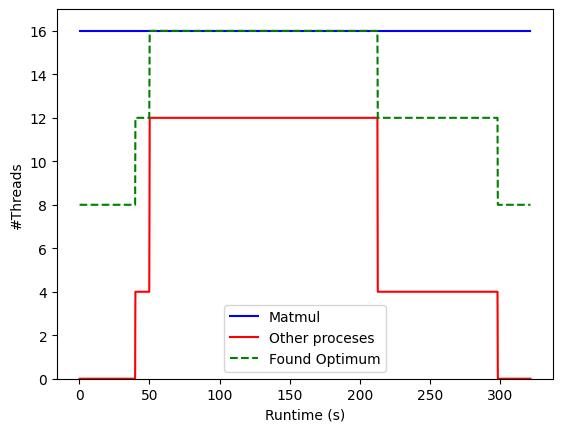

In [47]:
#data = [(186602451, 184855006, 8289651, 16), (185187210, 184031263, 8338114, 16), (155371120, 155946803, 7294598, 16), (159482902, 159787480, 7399822, 16), (154463095, 155888893, 7274823, 16), (156297511, 156004190, 7324566, 16), (155356943, 155915935, 7333539, 16), (156300756, 156000027, 7327984, 16), (155761065, 155959259, 7320843, 16), (155660298, 155977298, 7278790, 16), (155934742, 155992856, 7335308, 16), (154734662, 152154799, 7299481, 16), (154791973, 155904553, 7299359, 16), (154799246, 155909645, 7289471, 16), (156587098, 156024529, 7333477, 16), (154420918, 152148532, 7292035, 16), (154651525, 155910788, 7265301, 16), (154497258, 155905270, 7304730, 16), (156216060, 155965295, 7334026, 16), (154701373, 152121397, 7299908, 16), (155213207, 156043026, 7296307, 16), (155094464, 155817390, 7302899, 16), (154329367, 155893103, 7253522, 16), (157175826, 155123323, 7369732, 16), (155124232, 155917024, 7332989, 16), (155427997, 152213391, 7285748, 16), (156484407, 159750885, 7365215, 16), (154534325, 152147903, 7262189, 16), (197050116, 197040950, 8747780, 16), (180201808, 175148092, 8259928, 16), (185108989, 179594341, 8492165, 16), (186103044, 179524338, 8546487, 16), (189273519, 191308201, 8578470, 16), (188951955, 188004370, 8605141, 16), (189125429, 188048911, 8590005, 16), (189399960, 191792605, 8606728, 16), (186418455, 184072731, 8537332, 16), (186080091, 187843878, 8483316, 16), (185927337, 184093201, 8501138, 16), (186227359, 187884103, 8472146, 16), (186374519, 184144217, 8526284, 16), (183769377, 183967218, 8387552, 16), (183393952, 183955483, 8435769, 16), (183856323, 183960400, 8387674, 16), (184131223, 183998153, 8439798, 16), (184042395, 183998629, 8425881, 16), (183946439, 183994181, 8435587, 16), (184075973, 183994346, 8422769, 16), (184116172, 184150719, 8434243, 16), (184114842, 183839578, 8428384, 16), (184218774, 184009307, 8424845, 16), (184196543, 184160981, 8426187, 16), (183927803, 183701983, 8431497, 16), (184297635, 183777741, 8464028, 16), (184276964, 184011758, 8429910, 16), (184165445, 184008766, 8434122, 16), (184196993, 187759184, 8429421, 16), (184102769, 184004446, 8416483, 16), (184257784, 183990998, 8462503, 16), (184095691, 183997243, 8425820, 16), (235470329, 232730802, 10157201, 16), (184039607, 183989840, 8431070, 16), (183990459, 183997992, 8434731, 16), (197363138, 188086982, 8996559, 16), (184378514, 183966637, 8400675, 16), (184255927, 183983537, 8406594, 16), (184182649, 184007895, 8396646, 16), (184087187, 184004460, 8402445, 16), (184151849, 183951110, 8459390, 16), (184107151, 183998375, 8395852, 16), (184087373, 184000906, 8413553, 16), (184272999, 184004736, 8390237, 16), (184407680, 184021535, 8416849, 16), (184149102, 184000348, 8440164, 16), (184093649, 183949510, 8426309, 16), (184038736, 183985431, 8404153, 16), (184203862, 184010491, 8417093, 16), (184114621, 187754343, 8406594, 16), (184220549, 184012214, 8404276, 16), (184045494, 183998684, 8401651, 16), (184102496, 184019376, 8467446, 16), (184166661, 183989944, 8407632, 16), (184121825, 184004764, 8406229, 16), (184274218, 184012564, 8406656, 16), (184277228, 183971543, 8418496, 16), (184083858, 184030346, 8408975, 16), (184172788, 183930659, 8450052, 16), (184132164, 184005914, 8395669, 16), (184161455, 183998208, 8402933, 16), (184112430, 183997636, 8409036, 16), (184360042, 184013603, 8417154, 16), (183995098, 183969954, 8424783, 16), (184205164, 183974979, 8439798, 16), (184156602, 184006342, 8406900, 16), (184106939, 184003166, 8419412, 16), (184094048, 183993941, 8419351, 16), (184098201, 183989794, 8418130, 16), (184114673, 184002479, 8407876, 16), (184153316, 184008505, 8430155, 16), (184047640, 183990620, 8401162, 16), (184505368, 184001535, 8460733, 16), (184188740, 183992824, 8432840, 16), (184193908, 187744387, 8430703, 16), (184175875, 184006528, 8423563, 16), (184252226, 184012010, 8465737, 16), (184115617, 184004759, 8403787, 16), (184003497, 183988725, 8436014, 16), (184052438, 183995208, 8393838, 16), (184228756, 183996578, 8424783, 16), (184083451, 184003910, 8407327, 16), (184245514, 184011762, 8443521, 16), (184026272, 183998478, 8416361, 16), (184256438, 184000343, 8412698, 16), (184063359, 183982305, 8403482, 16), (184242837, 184010851, 8407571, 16), (184229321, 184010239, 8398233, 16), (184166543, 184000623, 8456033, 16), (184083662, 183954425, 8370889, 16), (184232731, 184004932, 8460977, 16), (184182020, 183974272, 8401101, 16), (184222286, 184004395, 8416666, 16), (184151626, 184005723, 8393960, 16), (183958738, 183992886, 8418009, 16), (184234314, 184009063, 8453896, 16), (232574459, 232755625, 10024267, 16), (184146121, 184004345, 8416482, 16), (184263738, 184003326, 8448831, 16), (184245480, 184012711, 8412637, 16), (183997694, 183950149, 8413248, 16), (184071652, 183734122, 8399453, 16), (183999535, 183995830, 8414652, 16), (184024657, 183997545, 8394815, 16), (184021771, 183999127, 8403420, 16), (184124960, 183968608, 8407511, 16), (184195541, 184006263, 8403420, 16), (184047610, 183999835, 8404764, 16), (184059151, 184000016, 8412027, 16), (184246857, 184011284, 8391458, 16), (184011348, 183997111, 8458963, 16), (184043069, 183989889, 8409646, 16), (184141677, 183991422, 8425455, 16), (184196814, 184009674, 8405740, 16), (180574542, 179740091, 8308450, 16), (175595168, 175872694, 7819499, 16), (128410081, 128013499, 6195480, 16), (128279284, 127984304, 6200790, 16), (125994028, 127871655, 6123702, 16), (126417425, 124123371, 6138290, 16), (126557551, 127883633, 6188400, 16), (126010431, 124115014, 6158920, 16), (126636017, 127911205, 6143478, 16), (126206803, 127883236, 6176375, 16), (126179179, 124097692, 6169296, 16), (126585490, 127901001, 6180221, 16), (126126041, 124123045, 6149765, 16), (185111085, 178578517, 8343118, 16), (194783447, 177741597, 8836769, 16), (190138921, 180773600, 8660623, 16), (192535966, 178672956, 8878456, 16), (273852378, 255177314, 11501191, 16), (284199748, 263835950, 12167632, 16), (291353140, 267913906, 12454192, 16), (290085455, 266788466, 12470854, 16), (301947420, 278890751, 12804655, 16), (213558711, 206097416, 9538794, 16), (202798708, 195358194, 8810768, 16), (201932558, 190361136, 9226233, 16), (191354361, 186731821, 8764993, 16), (192655883, 188019346, 8818764, 16), (188511464, 183152365, 8665505, 16), (187493669, 182133036, 8526528, 16), (183621826, 180892051, 8334452, 16), (183476610, 182169723, 8326211, 16), (183183533, 181262085, 8377725, 16), (183286439, 177877578, 8459207, 16), (183243684, 182542962, 8402994, 16), (186041475, 186342218, 8518960, 16), (190114520, 187055352, 8662453, 16), (189601481, 188706888, 8702554, 16), (190096540, 186856879, 8685463, 16), (190053175, 191522558, 8675088, 16), (190130847, 188109631, 8681008, 16), (190013640, 191770293, 8675332, 16), (190060465, 187194872, 8680764, 16), (190417780, 190860857, 8724770, 16), (190579052, 191865195, 8685036, 16), (190381912, 188138366, 8684182, 16), (190915865, 191909924, 8713723, 16), (190750388, 191917404, 8718483, 16), (190816796, 188171494, 8707925, 16), (190668636, 191260176, 8734353, 16), (190784270, 191916053, 8679970, 16), (190598886, 188157713, 8730691, 16), (190663801, 191899050, 8730995, 16), (190672000, 191898364, 8699075, 16), (190965488, 188167663, 8738442, 16), (190451369, 191898224, 8728066, 16), (190933126, 191885117, 8732704, 16), (189610611, 188056422, 8657083, 16), (190529498, 191890366, 8716408, 16), (190624530, 188105625, 8732827, 16), (190714953, 191874051, 8698952, 16), (190475135, 191891390, 8728432, 16), (190980320, 188177564, 8727273, 16), (189911631, 191751863, 8697121, 16), (190942382, 191931210, 8710916, 16), (190553669, 188156561, 8687782, 16), (190756345, 191910271, 8731912, 16), (190751668, 191913421, 8721840, 16), (190170483, 188148161, 8698830, 16), (189872463, 191817947, 8692666, 16), (190217696, 188054595, 8671792, 16), (191058896, 191888376, 8699013, 16), (190511842, 191868538, 8658792, 16), (190758118, 188160118, 8706520, 16), (190052174, 191860831, 8664102, 16), (190403597, 188149620, 8696144, 16), (190452525, 191889766, 8677041, 16), (190685221, 191914858, 8718484, 16), (190506505, 188147406, 8668251, 16), (190295741, 191888614, 8712380, 16), (190326027, 188143489, 8679055, 16), (190475038, 191888622, 8707315, 16), (190631273, 191911835, 8681130, 16), (212264365, 205054534, 9528296, 16), (190052427, 188100581, 8683571, 16), (189788850, 191822600, 8674599, 16), (190655788, 188204589, 8717874, 16), (190616840, 191854708, 8729775, 16), (190643611, 191852724, 8689247, 16), (190094309, 188125773, 8684671, 16), (190508804, 191904052, 8705971, 16), (191035586, 191937809, 8727822, 16), (190527647, 188154232, 8682473, 16), (190517756, 191893740, 8706459, 16), (190381785, 191843800, 8700662, 16), (190680526, 188141048, 8717568, 16), (189723929, 191857028, 8677590, 16), (190653799, 188159164, 8679848, 16), (190394100, 191896694, 8714578, 16), (190132079, 188124582, 8679177, 16), (189792320, 191858281, 8677284, 16), (189908595, 188117090, 8652139, 16), (190854656, 191925857, 8714516, 16), (190507893, 191894772, 8702554, 16), (190571743, 188105701, 8691628, 16), (190977557, 191923615, 8736916, 16), (190199692, 191885795, 8725014, 16), (190133580, 188187939, 8691994, 16), (190811391, 191853325, 8714151, 16), (190455153, 191889936, 8705238, 16), (190698987, 188163215, 8707437, 16), (233275941, 233117422, 10145604, 16), (190563383, 188157615, 8717018, 16), (190720214, 191895082, 8707131, 16), (190802879, 191930616, 8735146, 16), (190911467, 188143471, 8738076, 16), (190775511, 191913242, 8703713, 16), (190483327, 191903349, 8709573, 16), (190573591, 188158002, 8713356, 16), (190844920, 191889139, 8717141, 16), (190025498, 188108737, 8673196, 16), (190786070, 191905674, 8720009, 16), (190317419, 191892094, 8705849, 16), (190649888, 188161708, 8711465, 16), (190340980, 191895211, 8675393, 16), (190031332, 188122371, 8685829, 16), (190070561, 191867265, 8679055, 16), (190661821, 191914894, 8727944, 16), (190672184, 188164444, 8702432, 16), (190436504, 191892378, 8750893, 16), (190432985, 191886706, 8681862, 16), (190961523, 188183114, 8739175, 16), (190428432, 191898951, 8740517, 16), (190805605, 191922831, 8687539, 16), (190575827, 188153173, 8722329, 16), (190454210, 191860726, 8740456, 16), (190845892, 191903703, 8688454, 16), (190274929, 188090186, 8743569, 16), (190313265, 191892841, 8643349, 16), (190520647, 188154573, 8671182, 16), (190632080, 191910952, 8638161, 16), (190694716, 191902504, 8673989, 16), (190341121, 188143136, 8612527, 16), (189982714, 191872409, 8625222, 16), (190543496, 188155196, 8655984, 16), (190689647, 191917150, 8624550, 16), (189600328, 188056251, 8631753, 16), (190623786, 191887151, 8652810, 16), (189620974, 191845692, 8575906, 16), (190924819, 188180532, 8659829, 16), (190071814, 191877142, 8603921, 16), (189901725, 188080574, 8621926, 16), (190980648, 191930656, 8645425, 16), (190531112, 191905909, 8664040, 16), (190263930, 188139087, 8629494, 16), (190955136, 191931143, 8650003, 16), (190857000, 191916474, 8656777, 16), (190499151, 188151517, 8625771, 16), (191030693, 191917547, 8657937, 16), (190292576, 191890917, 8658974, 16), (191047666, 188125718, 8639383, 16), (190916394, 191689785, 8620278, 16), (190710725, 191897730, 8648781, 16), (190496347, 188126575, 8665322, 16), (190486938, 191882382, 8575723, 16), (191227645, 191948741, 8663552, 16), (190228498, 188102446, 8591043, 16), (190457084, 191899367, 8602211, 16), (190924662, 191919697, 8624124, 16), (190538191, 188156839, 8610268, 16), (189751645, 191857724, 8544839, 16), (190219233, 188135977, 8634683, 16), (190494453, 191891129, 8587014, 16), (190526186, 191892376, 8626870, 16), (190883863, 188168550, 8628213, 16), (190426373, 191898008, 8603737, 16), (190673682, 191913172, 8621377, 16), (189753351, 188094864, 8565103, 16), (190076265, 191877528, 8582925, 16), (190294108, 188118217, 8627114, 16), (190481082, 191903531, 8580666, 16), (190604694, 188159009, 8628091, 16), (212562916, 206983722, 9327186, 16), (282091702, 235578251, 12345122, 16), (331497222, 279678935, 14217798, 16), (322052183, 257763027, 13758510, 16), (232120379, 179419063, 10321140, 16), (233907763, 175123260, 11048495, 16), (245918856, 189489332, 10794162, 16), (226898701, 176424802, 10538181, 16), (265050457, 210055632, 11842377, 16), (246118783, 197627406, 11087008, 16), (289905977, 241902442, 12000946, 16), (269674167, 218559409, 12008209, 16), (238332722, 194982564, 10797885, 16), (236008928, 184470389, 10833102, 16), (267982153, 204496745, 11742584, 16), (242014077, 192619914, 10672520, 16), (304858407, 252291327, 13155911, 16), (293116576, 231812938, 12859098, 16), (270374297, 222141265, 11713654, 16), (259087682, 197188853, 11970062, 16), (239239290, 178263605, 10839938, 16), (240481995, 186222083, 11033907, 16), (334041603, 260515753, 14616357, 16), (256740866, 209106341, 11159395, 16), (283973067, 229960634, 12494170, 16), (321924558, 257614337, 14090723, 16), (306069955, 245121235, 12989774, 16), (299994715, 231635469, 13272976, 16), (338580858, 270406614, 14539636, 16), (266476535, 218648884, 11455232, 16), (274925666, 224420588, 11699677, 16), (304001146, 246572351, 13314907, 16), (287976737, 224244798, 12939176, 16), (293461770, 228796735, 12691130, 16), (322544057, 257643043, 14125330, 16), (324005381, 259495532, 13825465, 16), (323952953, 254381520, 13592433, 16), (385787608, 308845653, 16589191, 16), (298204513, 236749841, 12601164, 16), (299997796, 234070792, 12963346, 16), (331989028, 267709437, 13343350, 16), (377932829, 299865126, 16138386, 16), (282124313, 226824975, 12565886, 16), (283947686, 225491508, 12433013, 16), (287968363, 230494680, 12442351, 16), (273044529, 216375213, 12184783, 16), (282940915, 228569643, 11394014, 16), (331995942, 266597635, 14072657, 16), (327993570, 265998266, 13645290, 16), (274015086, 224856885, 11655549, 16), (282009860, 235370684, 12393339, 16), (282788794, 220173813, 12696562, 16), (242532283, 201562459, 10932223, 16), (288776011, 222777833, 12616057, 16), (317135684, 245553048, 14107080, 16), (308743109, 245792748, 13119779, 16), (273799016, 217854038, 11797455, 16), (271644194, 219452435, 12250335, 16), (318070308, 252613367, 13759974, 16), (336462628, 264520416, 14080714, 16), (244093241, 201750885, 11031710, 16), (331896482, 264723809, 14546593, 16), (291995992, 228748318, 12504546, 16), (343986399, 268907303, 14820519, 16), (312004848, 240748915, 13817042, 16), (347983588, 270494441, 14563439, 16), (330312472, 260974259, 14468103, 16), (311616816, 254811253, 13370937, 16), (298023335, 243124719, 12861296, 16), (323996608, 255979514, 13778346, 16), (287995943, 233995550, 12334624, 16), (316486030, 262515536, 13252102, 16), (304324288, 239263316, 13530910, 16), (295005208, 229849414, 12935758, 16), (292180887, 232248561, 12378569, 16), (291992923, 228490858, 13041776, 16), (343975559, 279478931, 14657494, 16), (316011845, 259096284, 13376675, 16), (311160132, 254441050, 13534145, 16), (312920221, 247790602, 13569911, 16), (315742194, 248964458, 13208523, 16), (320179101, 261819961, 13881800, 16), (295967364, 240236369, 13036344, 16), (336007579, 265246339, 14036219, 16), (312002421, 240306980, 13315334, 16), (315965181, 247492241, 13949550, 16), (325192590, 263080827, 13688502, 16), (342792093, 271990464, 14591333, 16), (292115470, 233499507, 12858060, 16), (319895585, 268203241, 13266507, 16), (288876187, 230400017, 12761381, 16), (335092679, 270898939, 13799525, 16), (391989321, 320058067, 15534445, 16), (308028805, 255997631, 13333828, 16), (375962808, 303671809, 15423362, 16), (308018724, 252481597, 13124539, 16), (279968041, 233009240, 11643769, 16), (376198602, 307254956, 15944356, 16), (311811945, 258213330, 13274014, 16), (291990844, 239235408, 12543363, 16), (278261708, 225601789, 12294830, 16), (273708255, 224128501, 11707184, 16), (331995315, 266235203, 13466946, 16), (443995140, 355586464, 18337904, 16), (327993024, 268200446, 13786341, 16), (321421285, 260295040, 13598476, 16), (303192387, 251445029, 13292141, 16), (315368071, 261443855, 13164578, 16), (275989894, 225487722, 11387483, 16), (308037598, 242747646, 13745570, 16), (299954149, 243704072, 12898344, 16), (281545179, 220583277, 12524565, 16), (318444708, 256388324, 13487881, 16), (312349676, 243514524, 13725733, 16), (319640585, 258469930, 13606716, 16), (290714448, 227420832, 12328154, 16), (338801504, 264670262, 14637658, 16), (287910231, 223975495, 12923856, 16), (302551075, 239233250, 12542326, 16), (316020338, 250703816, 13927516, 16), (351989056, 269897025, 15283042, 16), (323974127, 253944820, 13702846, 16), (319989187, 248245668, 13209988, 16), (247997665, 202651220, 10778415, 16), (319991305, 254131368, 13553920, 16), (292028964, 233491435, 12692961, 16), (297885267, 241442435, 12445158, 16), (398070283, 336236461, 16559406, 16), (378753564, 307917323, 15746725, 16), (405237420, 332515886, 15902608, 16), (362275073, 299397996, 15298789, 16), (356935588, 304053155, 15111961, 16), (251218517, 208521025, 10934054, 16), (320428987, 263049576, 13409084, 16), (333110543, 281566728, 13556484, 16), (331998212, 253902764, 14744774, 16), (351990177, 280539723, 14475671, 16), (291992805, 241236538, 12871854, 16), (320025737, 261206746, 13529934, 16), (329688051, 267305137, 14311487, 16), (289708718, 234118332, 12638456, 16), (284575565, 226992785, 12355559, 16), (307993206, 237983694, 13010465, 16), (311981501, 246485373, 13356106, 16), (313824971, 242608084, 13568813, 16), (312890240, 243402743, 13429531, 16), (353262635, 277074926, 14719628, 16), (328018012, 257694462, 13666469, 16), (303969382, 248070216, 13187894, 16), (314160319, 253621852, 13715480, 16), (308102091, 244706202, 13315945, 16), (365259759, 284642125, 15961324, 16), (304367177, 249481266, 12904752, 16), (312105321, 253395914, 13361844, 16), (320040961, 246746400, 14289758, 16), (307968302, 246736296, 13073819, 16), (284656133, 229734900, 12315215, 16), (244888095, 207012808, 11063448, 16), (301186196, 240559756, 13231595, 16), (280003266, 230997875, 12005279, 16), (308967558, 248558669, 13473721, 16), (311260648, 251694720, 13647059, 16), (304962695, 252058601, 12479094, 16), (331995931, 271124224, 13818385, 16), (316722145, 258284142, 13764308, 16), (307258899, 251200081, 12531523, 16), (315999841, 250983917, 13775417, 16), (327002261, 264394437, 14189111, 16), (288564278, 234216622, 12551970, 16), (312456500, 247282253, 13953944, 16), (289715445, 231348836, 12627470, 16), (308836953, 239952489, 13637600, 16), (290295359, 236390185, 12915433, 16), (293053184, 234311314, 12523649, 16), (322079612, 263848343, 13658413, 16), (309395190, 246582414, 13668605, 16), (334556868, 264096109, 14337610, 16), (308748270, 238669708, 13754176, 16), (319242937, 249949341, 13871790, 16), (313790248, 249467096, 13083036, 16), (322173003, 256316542, 13265225, 16), (343993402, 272983748, 14529382, 16), (287985696, 236661095, 12294036, 16), (308001865, 248738226, 13137295, 16), (316030741, 258877533, 13667873, 16), (327980910, 262480532, 13756190, 16), (307963799, 257889941, 12867094, 16), (411993714, 323378455, 16978777, 16), (296013090, 236592851, 12653838, 16), (287986702, 240244427, 12405974, 16), (306170928, 249866289, 13354275, 16), (283841641, 232710351, 12440031, 16), (369948955, 305799755, 14941918, 16), (285959524, 234102512, 12730314, 16), (334026354, 265737542, 13636378, 16), (308033388, 243502399, 13251553, 16), (287960112, 228239370, 12708280, 16), (416009922, 339466840, 17079973, 16), (420837764, 337165596, 17804520, 16), (391389919, 314456472, 16085347, 16), (415551040, 326450276, 16454548, 16), (408094021, 318728273, 17127886, 16), (383650950, 308725202, 16022908, 16), (391044080, 313392518, 15693990, 16), (314861375, 253478520, 13184415, 16), (368133074, 303495330, 15667440, 16), (360362864, 289495715, 15183738, 16), (326000478, 266372495, 13672512, 16), (413300753, 333826539, 17237322, 16), (303815002, 251470016, 12887906, 16), (378888997, 299176401, 16024678, 16), (308025518, 240060157, 13540676, 16), (293048172, 228102099, 12502715, 16), (304292437, 241285031, 12925565, 16), (318588357, 255730974, 13637843, 16), (327997487, 264542266, 13588589, 16), (312023344, 246293848, 13166714, 16), (326559259, 250995386, 14291833, 16), (342148724, 264866110, 14844201, 16), (323716922, 253713801, 13879786, 16), (311524803, 248260653, 13518032, 16), (308010237, 252924019, 13312893, 16), (315997430, 257446201, 13724025, 16), (316012725, 256566808, 13780421, 16), (309249729, 242137415, 13242276, 16), (310684959, 247526154, 13401760, 16), (363997939, 286124816, 15167381, 16), (311991770, 241714443, 13458400, 16), (324134589, 248588961, 14388025, 16), (343865909, 265717902, 14319055, 16), (380014060, 299681746, 16459736, 16), (307953227, 254688482, 12732877, 16), (296010711, 233715156, 12790006, 16), (307978563, 246267136, 12822355, 16), (352021084, 288692393, 14983604, 16), (299984846, 248495932, 12889859, 16), (416033531, 335747597, 17689042, 16), (343984258, 279976865, 14456201, 16), (359946317, 283419069, 15182456, 16), (336853187, 273551938, 14368249, 16), (343134959, 276971698, 14366602, 16), (352550437, 292782423, 15089805, 16), (367438261, 299066104, 14824791, 16), (349287284, 278290539, 14286157, 16), (350721064, 277904999, 15254722, 16), (352002590, 282229992, 15006492, 16), (307988860, 251235482, 12842863, 16), (296149881, 235257043, 12812101, 16), (307838441, 251157789, 13616725, 16), (311975281, 244558827, 13085355, 16), (327992261, 257746683, 13858363, 16), (308019552, 259735463, 13386318, 16), (322940399, 264397230, 13940700, 16), (345020196, 274827276, 14574059, 16), (334634154, 277650290, 14377099, 16), (342505028, 274670142, 14592492, 16), (389470668, 308086874, 16886981, 16), (318010892, 257295618, 13550624, 16), (304832077, 246052920, 13376004, 16), (302551325, 250155488, 13331692, 16), (324787393, 262383052, 13786219, 16), (299202020, 238556067, 13366909, 16), (286369032, 225385691, 12790495, 16), (295058988, 237029063, 12545744, 16), (434516759, 356245485, 17423112, 16), (412034829, 338998242, 17126299, 16), (399952935, 328445634, 15573568, 16), (384022917, 312231588, 15797201, 16), (384001302, 313746612, 16390644, 16), (391962932, 308238557, 15371665, 16), (389789408, 309598402, 15596030, 16), (314199142, 256483871, 13122586, 16), (323997130, 257493631, 13634670, 16), (298426786, 236137868, 12783049, 16), (300521593, 240658962, 13281094, 16), (300996448, 234303820, 13411464, 16), (256032992, 215486590, 11297457, 16), (311994669, 248486011, 13351162, 16), (288592435, 226806160, 12870023, 16), (307421713, 243630864, 13221463, 16), (360112570, 284252778, 15655721, 16), (311878560, 250987160, 13291531, 16), (301825172, 241658910, 13117276, 16), (331058239, 266238985, 14461877, 16), (295795556, 240430889, 12714323, 16), (331276157, 255652908, 14058924, 16), (323987462, 249282134, 13842433, 16), (323217890, 252145902, 13789638, 16), (299739312, 230461840, 13478237, 16), (287546576, 225192192, 12475431, 16), (305472165, 256076295, 12687468, 16), (331998346, 269728848, 13914576, 16), (303993034, 245236916, 12390043, 16), (319441360, 251943883, 13359646, 16), (328566629, 259956022, 14454126, 16), (287166785, 225435651, 12568205, 16), (292800665, 243467562, 11825897, 16), (315616922, 251211298, 13924220, 16), (292371991, 239504379, 12752043, 16), (312029644, 251941080, 13072416, 16), (411463000, 321707849, 17726822, 16), (332489083, 268443806, 13526516, 16), (215693331, 179931556, 9593726, 16), (268331371, 228520248, 12017365, 16), (287989733, 236942459, 12781339, 16), (275962590, 223718413, 11670258, 16), (287937485, 225479886, 12803678, 16), (296054282, 238982633, 13030972, 16), (311994787, 253437497, 12663175, 16), (299596782, 244462663, 13168240, 16), (276417756, 229769030, 12431487, 16), (274806125, 220408965, 11918426, 16), (305707773, 243426377, 13557583, 16), (279447379, 225177587, 12027557, 16), (300021802, 237960927, 12828885, 16), (303988924, 244115861, 13445706, 16), (297751442, 236099743, 13215420, 16), (374210775, 293370272, 15053611, 16), (415995768, 322735924, 17281755, 16), (392033294, 310497854, 16571369, 16), (379226330, 295875715, 16243793, 16), (392753599, 305520520, 16664875, 16), (383988648, 298946254, 16425373, 16), (388007841, 298484231, 16944414, 16), (379990196, 289625496, 16456135, 16), (383985932, 304206872, 16513385, 16), (371997962, 301315674, 15904196, 16), (383987199, 298745788, 16478656, 16), (384008831, 306977979, 16540180, 16), (383982841, 296744392, 16133320, 16), (395996407, 310828425, 17125933, 16), (387959374, 305041216, 15796835, 16), (380031998, 297489409, 16610737, 16), (371983502, 303231597, 15547384, 16), (384002868, 296991344, 16789020, 16), (395960822, 307989042, 16293842, 16), (372011980, 293482950, 15953389, 16), (400013277, 315742686, 16982318, 16), (383953887, 302728432, 15658590, 16), (290538789, 221887920, 12983304, 16), (309445253, 249338484, 13035856, 16), (263996928, 212496244, 10935824, 16), (288011726, 234674876, 12534331, 16), (372003242, 302493009, 15994771, 16), (284002080, 244483869, 12273162, 16), (273656891, 223872845, 12006256, 16), (322297741, 261400884, 13503078, 16), (266726966, 216416612, 11733430, 16), (379648750, 304433979, 16053608, 16), (301609325, 244822079, 12896146, 16), (295991417, 235355610, 12494475, 16), (343986800, 276226957, 14345667, 16), (312400700, 246519612, 13614772, 16), (294530466, 230378648, 12580412, 16), (299565323, 239044142, 13249783, 16), (298791414, 235157690, 13230496, 16), (307219130, 235532673, 13166897, 16), (245193745, 198061918, 11111544, 16), (314261646, 253840868, 13226163, 16), (320012489, 252437384, 13759913, 16), (303978287, 256745944, 13038358, 16), (293464486, 241425241, 12880094, 16), (306520882, 251157941, 12656462, 16), (307990628, 251667867, 12814847, 16), (315996831, 257493241, 13233853, 16), (315991515, 257993638, 12959134, 16), (315992312, 251497755, 13047574, 16), (400023370, 324990590, 16809039, 16), (304659113, 251036334, 12737638, 16), (285919543, 231169186, 12292449, 16), (312180708, 246927038, 13830226, 16), (333219303, 257614551, 14361108, 16), (263691002, 207972198, 11317537, 16), (272273133, 217346941, 11615449, 16), (316971702, 242046703, 14177759, 16), (311013527, 238921939, 12702422, 16), (310602605, 244410521, 13787684, 16), (289408652, 232286042, 12844999, 16), (315993604, 255181536, 13191922, 16), (277608099, 227066823, 12482817, 16), (282394424, 217216128, 12741362, 16), (278706156, 209778233, 12376738, 16), (289247028, 227263066, 12875028, 16), (315995296, 254116811, 13357449, 16), (392639481, 311295343, 15907368, 16), (365776738, 284523072, 14928490, 16), (339947990, 269410658, 14705834, 16), (305638484, 246116908, 13448452, 16), (303986893, 237732449, 12845548, 16), (331033977, 252628775, 14531884, 16), (401575306, 308733179, 16795062, 16), (403340885, 307135935, 16980547, 16), (352018286, 280487599, 15236961, 16), (331983576, 268214391, 14019190, 16), (392006047, 311747366, 16905657, 16), (327988216, 266214837, 13784084, 16), (321514755, 254133349, 13795070, 16), (370484655, 284617949, 16164387, 16), (347982199, 274526806, 14508080, 16), (344005257, 281477641, 14931237, 16), (403955666, 321494456, 16962359, 16), (357533916, 291306787, 15059898, 16), (334452069, 264873370, 14699852, 16), (355910541, 276541351, 14596704, 16), (356116519, 298945389, 15323935, 16), (325901694, 256867472, 14291162, 16), (338088850, 269201240, 14176661, 16), (361098397, 281535928, 15822469, 16), (320672197, 263010556, 13826808, 16), (326207368, 265725735, 13860255, 16), (327959047, 261180822, 13862696, 16), (331987952, 265372675, 13738673, 16), (315992552, 249881473, 12781278, 16), (308000005, 247722271, 13550136, 16), (331988958, 269734957, 13529140, 16), (308260431, 251512488, 13021695, 16), (354727134, 287102175, 15348716, 16), (305049656, 249552394, 13307949, 16), (307933819, 247352433, 12636564, 16), (291997579, 233611761, 12472075, 16), (340026518, 267987541, 14868980, 16), (327953539, 254507023, 13543911, 16), (279971827, 225456718, 12485198, 16), (308519101, 258013006, 13349392, 16), (303518327, 246205565, 12928983, 16), (320881896, 262537385, 13833461, 16), (315087000, 261019022, 13287991, 16), (372025555, 300470263, 15515951, 16), (291959371, 235466503, 12337249, 16), (316054318, 253246560, 14013881, 16), (327930763, 262989806, 13553432, 16), (331992188, 267069014, 13603664, 16), (331995903, 260981863, 14136195, 16), (351997785, 282211727, 14299829, 16), (315993006, 259496314, 13614711, 16), (323936772, 266483714, 13973658, 16), (316904849, 257796786, 13679531, 16), (310543722, 253405984, 13267178, 16), (313784453, 260339389, 13742457, 16), (318827980, 257915853, 13856044, 16), (328002458, 254551765, 13997340, 16), (363449256, 277186945, 15987935, 16), (320506268, 260237645, 13590846, 16), (348021334, 287248998, 14979759, 16), (320013718, 261217324, 13966822, 16), (335988147, 258496497, 14637841, 16), (411950835, 323738773, 16987993, 16), (311916065, 238400198, 13246731, 16), (316072461, 253484690, 13807521, 16), (368247150, 294228608, 15574667, 16), (288378386, 240260101, 12372527, 16), (299756604, 244720208, 13235684, 16), (304477049, 251525334, 13334317, 16), (319146115, 267687508, 13529750, 16), (283962988, 244232015, 11692292, 16), (328051657, 269499817, 14288965, 16), (311984304, 255236858, 13658107, 16), (323935728, 261743532, 13592251, 16), (348024730, 279999018, 15066795, 16), (361412277, 298816766, 15276267, 16), (312974131, 258572670, 13205593, 16), (329593880, 267854263, 14364465, 16), (320963257, 257705222, 13950221, 16), (303151499, 242755661, 12888883, 16), (391842804, 300474645, 16890032, 16), (327994900, 261492699, 13555080, 16), (343996285, 275994132, 14519677, 16), (344028101, 283248650, 14796960, 16), (343960333, 274545298, 14704186, 16), (304015288, 239973871, 13598476, 16), (296786158, 230542099, 12726530, 16), (290361389, 235891176, 12359344, 16), (304856100, 247665614, 13564235, 16), (339953717, 277887638, 14035425, 16), (323991878, 270255830, 12962003, 16), (315995470, 258490778, 13225064, 16), (327989540, 269235720, 13737697, 16), (327992365, 266963863, 13386623, 16), (331994567, 270830058, 13727565, 16), (315995585, 256738723, 13453579, 16), (327991832, 261232552, 13532558, 16), (326979056, 260173423, 14255395, 16), (297008026, 229191537, 12947538, 16), (327988845, 261522320, 13540798, 16), (332002014, 258241227, 14513391, 16), (323988060, 257314941, 13149930, 16), (316031127, 255999356, 13608852, 16), (316212354, 247504428, 14088587, 16), (331774377, 263456849, 13919520, 16), (355960705, 290494222, 14667748, 16), (391998488, 321426112, 16233296, 16), (375991797, 305128617, 15014732, 16), (339994492, 280169101, 14154688, 16), (364603260, 301990632, 15493918, 16), (319406814, 260697543, 13591579, 16), (309908835, 254333187, 13542629, 16), (282089498, 234365832, 12445402, 16), (275713474, 232052572, 11891083, 16), (272267841, 229361448, 11899872, 16), (323203472, 262441979, 14109949, 16), (267887514, 223984373, 11850617, 16), (310014180, 255150149, 13287136, 16), (317275833, 248934009, 14137293, 16), (329597581, 264309714, 14261805, 16), (311964598, 243246580, 13033291, 16), (360027988, 283694021, 15713156, 16), (400992554, 320091766, 16684283, 16), (370963818, 304442203, 15375144, 16), (326801766, 265664364, 13856287, 16), (309184581, 252551598, 13117215, 16), (351992534, 280248858, 14768700, 16), (372041347, 293746087, 15534079, 16), (299942033, 246375705, 12703825, 16), (335993981, 262151793, 14400842, 16), (320027403, 259908106, 13427883, 16), (323969870, 256179520, 13900721, 16), (332048429, 273489332, 14370264, 16), (380374081, 304260795, 15993672, 16), (367583161, 290194444, 15928426, 16), (324512424, 257240819, 13669338, 16), (316690830, 266036834, 13770411, 16), (430748122, 351140903, 17524675, 16), (287997690, 232841342, 12111541, 16), (327990931, 268440260, 13852626, 16), (355993341, 296218494, 14616601, 16), (252050808, 213753429, 11089083, 16), (287935509, 239386294, 12296782, 16), (327992094, 267859107, 13855312, 16), (312531812, 254813563, 13480251, 16), (287491290, 235169270, 12303009, 16), (307959105, 245131308, 13015408, 16), (299995640, 237483111, 13240932, 16), (304030749, 233986275, 13032987, 16), (283962125, 224626949, 11739655, 16), (372020062, 300225022, 15965108, 16), (359965285, 295740864, 14886498, 16), (372032710, 306225825, 15664450, 16), (379987897, 299485224, 16478473, 16), (294519972, 233919748, 12604277, 16), (302716560, 247400290, 13300320, 16), (396441691, 325519708, 16636005, 16), (287713622, 237947634, 12232634, 16), (467319539, 376438429, 19521496, 16), (319252950, 264689050, 13561183, 16), (341950021, 271104454, 14416528, 16), (314638124, 243401288, 13909755, 16), (303370367, 228957380, 12942655, 16), (327434669, 248707060, 14315087, 16), (379242009, 305623914, 16205892, 16), (361307369, 297024449, 14822960, 16), (324030667, 250942750, 14187464, 16), (331955026, 256492356, 13593105, 16), (381607852, 302096871, 16414753, 16), (298423853, 243145586, 12923978, 16), (284042086, 236240573, 12030121, 16), (275927257, 238013081, 11941009, 16), (338884534, 269927330, 14706750, 16), (321122770, 272561147, 13770045, 16), (323956033, 255737365, 13590847, 16), (360026674, 284944529, 15604391, 16), (307962527, 245238286, 12613920, 16), (376022700, 306188592, 16081014, 16), (323964946, 272238985, 13395901, 16), (263706461, 215704998, 11529878, 16), (348283615, 295510068, 14558373, 16), (324016481, 258745479, 14104334, 16), (279993988, 222217240, 12077240, 16), (296552843, 243154446, 13058011, 16), (367414134, 295412628, 15199424, 16), (308024694, 246138046, 12980191, 16), (323965817, 262411791, 13646938, 16), (354872405, 280854403, 15147483, 16), (269168816, 226383328, 11536165, 16), (343935787, 275332012, 14101282, 16), (306944330, 251170040, 13476528, 16), (309043895, 243776880, 13022000, 16), (327995484, 265984715, 13939296, 16), (299993529, 246352600, 12555082, 16), (319992686, 258458552, 12990689, 16), (363995464, 297220992, 15072288, 16), (359994304, 293557444, 15028587, 16), (347996827, 279097491, 14010523, 16), (367984875, 306185980, 15101829, 16), (360030526, 299989257, 15120872, 16), (351902899, 294719723, 14593163, 16), (312040990, 261497732, 12539641, 16), (329105239, 266562753, 14309595, 16), (410882762, 343098113, 16598895, 16), (354152316, 293632662, 14517602, 16), (345861209, 289242214, 14146509, 16), (387970270, 304728735, 16085591, 16), (352036732, 284488144, 15027489, 16), (375952105, 298597451, 14785118, 16), (329328223, 270932419, 14236353, 16), (318657767, 265406283, 13375820, 16), (351996912, 288450181, 14200403, 16), (385823383, 308604374, 16449238, 16), (368851345, 302037147, 15330710, 16), (389324460, 308268929, 15777669, 16), (376001611, 309747245, 15147484, 16), (381232844, 319415561, 15840962, 16), (379348161, 307192533, 16266255, 16), (391405231, 306451417, 15809896, 16), (383990856, 308967917, 15436118, 16), (400004220, 318946448, 17111101, 16), (331993460, 262234182, 14135523, 16), (391964266, 314238116, 15310569, 16), (404043206, 323975710, 17100786, 16), (411939647, 321475176, 16550190, 16), (372033241, 300272081, 15027367, 16), (396090853, 311028038, 15860372, 16), (371857816, 289966615, 15515768, 16), (408030820, 311988334, 17096758, 16), (375960351, 302005443, 15440146, 16), (344048817, 276484690, 14981590, 16), (295966604, 241044450, 12736417, 16), (387967051, 310488237, 16009847, 16), (297274066, 241888332, 12870694, 16), (350746311, 280340020, 15313804, 16), (315981926, 246445630, 13867823, 16), (327990878, 259223022, 13927394, 16), (327436285, 261710210, 14316186, 16), (344929967, 269792538, 14722009, 16), (299646393, 232707370, 12868375, 16), (343942980, 277743015, 14363977, 16), (351994014, 282979714, 14381006, 16), (387995889, 307864859, 16105977, 16), (315995330, 252997731, 13852381, 16), (290855988, 231886284, 12425811, 16), (341162307, 278306361, 14389856, 16), (314284461, 250135276, 13866236, 16), (324043053, 266233940, 14019801, 16), (392158284, 314979306, 16461810, 16), (321508991, 265090218, 14120753, 16), (335893831, 261227688, 14285730, 16), (300051190, 247650179, 13255215, 16), (335990195, 269016034, 14031946, 16), (277805381, 229336653, 11932587, 16), (382187477, 314287184, 15892843, 16), (377594201, 300096072, 16009480, 16), (315139132, 252237879, 13990931, 16), (327246555, 257091559, 13698757, 16), (323991849, 259239539, 13575710, 16), (364077814, 298758588, 15522665, 16), (308925720, 244299376, 13207059, 16), (311020435, 243679705, 13667506, 16), (371956838, 302208628, 15399314, 16), (370109317, 315224052, 15471213, 16), (325987291, 268857362, 14235986, 16), (355746368, 289960776, 15186668, 16), (264134781, 222478791, 11486421, 16), (321163219, 256560304, 14099390, 16), (336559641, 267633723, 14516137, 16), (321167146, 254946239, 13659450, 16), (323026288, 255180737, 14237390, 16), (302056457, 242930579, 12964078, 16), (315115673, 248544319, 13783595, 16), (346087920, 275932844, 15152061, 16), (327160977, 258249606, 13749782, 16), (287654938, 246209242, 12641203, 16), (347950967, 280800844, 14505883, 16), (401646839, 329082795, 16433979, 16), (402340419, 333112808, 16486408, 16), (409143035, 325047610, 17082171, 16), (322845105, 263499285, 13003324, 16), (419993389, 341217854, 17318682, 16), (424028594, 347237044, 16931902, 16), (402861196, 325104506, 16246113, 16), (441094225, 363563519, 17721330, 16), (308026609, 248498936, 13245572, 16), (275987170, 218983279, 11876129, 16), (269236153, 222073394, 11482637, 16), (333148209, 268490119, 14475549, 16), (293609567, 243595176, 12943326, 16), (379964120, 308959601, 15428793, 16), (292032906, 242246210, 12818815, 16), (303859491, 237730719, 13469875, 16), (272856013, 218796964, 11840424, 16), (283226371, 222189322, 12559355, 16), (332042969, 253539878, 14673791, 16), (256968402, 208518654, 11008639, 16), (310531165, 250655053, 13012417, 16), (379492182, 306925134, 16360005, 16), (310734468, 264016318, 13450588, 16), (314226674, 253882391, 13608303, 16), (301765109, 242854715, 13272121, 16), (400360816, 325242148, 16588947, 16), (385861100, 304771954, 15827474, 16), (383994576, 303991178, 16364766, 16), (296923419, 244301359, 12758207, 16), (307061634, 244680346, 12952786, 16), (288722327, 227732724, 12883817, 16), (387247388, 316031397, 15812094, 16), (321418092, 260832369, 13474880, 16), (331511763, 270449682, 14352991, 16), (353844408, 285827340, 15210105, 16), (345232859, 275205493, 14370446, 16), (356004289, 275742440, 15635459, 16), (303984481, 236466975, 13372585, 16), (290257783, 233729290, 12721647, 16), (294263616, 241348365, 12978055, 16), (375455278, 302298432, 15784811, 16), (302185651, 247932068, 12975247, 16), (282601294, 235146682, 12541106, 16), (347798705, 287234762, 14774559, 16), (231371191, 193456958, 10282017, 16), (291969977, 236465422, 12348907, 16), (389200302, 303085051, 16778949, 16), (406810921, 321169755, 16332661, 16), (392000088, 327188843, 16458759, 16), (383991821, 313200566, 16140889, 16), (407995703, 319497380, 16421649, 16), (391988697, 310717360, 16044515, 16), (408002636, 325227897, 17367326, 16), (406988863, 321129559, 16313496, 16), (434061697, 348113239, 17171465, 16), (407717383, 333063488, 17261186, 16), (389922156, 313112379, 16207356, 16), (410439846, 334898194, 16304829, 16), (376188858, 306235347, 15672018, 16), (378641376, 303905268, 16238301, 16), (324322083, 255266344, 13438381, 16), (385523264, 310014510, 16003804, 16), (318771601, 262394084, 13746180, 16), (262574716, 219643707, 11376741, 16), (291267994, 235137042, 12807707, 16), (313475583, 259789505, 13616603, 16), (336023052, 258497769, 14646752, 16), (311959927, 242743330, 13498318, 16), (359993779, 280114541, 15090049, 16), (355996455, 280745136, 15074974, 16), (324025177, 247995836, 13705410, 16), (295807569, 237466233, 12933316, 16), (347054350, 278429935, 15086875, 16), (301096676, 250409960, 12502532, 16), (347987405, 281487544, 14556420, 16), (327990530, 265213211, 13656215, 16), (311996952, 245496488, 13099271, 16), (387147402, 300176892, 16760028, 16), (382976830, 299923061, 15669576, 16), (401879026, 329857526, 15976400, 16), (380234520, 309318101, 15657552, 16), (351732512, 285724023, 14635156, 16), (379990724, 294958006, 15441672, 16), (280045536, 216995777, 12660002, 16), (358134404, 281763471, 15360312, 16), (345803375, 282735557, 14167811, 16), (288027129, 223747476, 12994657, 16), (348423106, 277020683, 14863854, 16), (285150726, 234045144, 12673673, 16), (337050658, 265060045, 14718285, 16), (333319012, 262831470, 13466580, 16), (320026238, 259142125, 13994959, 16), (346107888, 281375193, 14891991, 16), (319328489, 257191039, 13415066, 16), (354515282, 283124897, 15125571, 16), (359995169, 286854946, 14893517, 16), (288037567, 230783319, 12266204, 16), (379943954, 304195347, 15857808, 16), (339990463, 275736930, 14143640, 16), (328028430, 266242937, 14151514, 16), (364081699, 294684449, 15754477, 16), (276876802, 220051332, 12022735, 16), (284291871, 239512973, 12569426, 16), (322727148, 266407143, 14075098, 16), (320905835, 253547906, 13760707, 16), (384422020, 303221888, 16651508, 16), (326624549, 264891442, 13461635, 16), (324016499, 260898879, 13522793, 16), (307966404, 245744251, 13068143, 16), (388003812, 307444988, 16570392, 16), (395985973, 320980351, 16873004, 16), (344020182, 278236704, 14364649, 16), (284155072, 232341413, 12131560, 16), (263852402, 221990940, 11780976, 16), (331985834, 265496064, 14604882, 16), (303953293, 242982862, 12486174, 16), (327991407, 259790498, 13786097, 16), (347997341, 275244955, 14670738, 16), (307990879, 251492169, 12331694, 16), (316028940, 260968059, 13660122, 16), (355964105, 284734384, 14826072, 16), (375988343, 302175101, 15161339, 16), (321199890, 271315646, 13901820, 16), (310788885, 254169672, 13132108, 16), (315989138, 256256735, 12950406, 16), (311996423, 246730227, 13260830, 16), (320030739, 262997328, 13964686, 16), (335995677, 270607096, 13899135, 16), (355991428, 280960076, 15569174, 16), (323965328, 259490813, 13510280, 16), (327987548, 262245234, 13721095, 16), (288040201, 229228921, 12845609, 16), (299995063, 239738166, 12766264, 16), (304513799, 241025955, 12920621, 16), (355435286, 279705723, 15139915, 16), (387989985, 302234292, 15832540, 16), (332051854, 256057903, 14699914, 16), (345249446, 270549640, 14918724, 16), (304447819, 246009968, 13038846, 16), (345718246, 279601498, 15033836, 16), (332502044, 274015759, 13750392, 16), (304025205, 241730404, 13184476, 16), (327971188, 259943686, 14343774, 16), (292115707, 241959580, 12587919, 16), (295861260, 241462907, 12066498, 16), (311998663, 247745015, 13265653, 16), (371989526, 290240903, 15378806, 16), (312037583, 250249588, 13717189, 16), (339959819, 273244203, 14354578, 16), (316025526, 249248043, 13652614, 16), (336007404, 259488211, 14929588, 16), (319770175, 248207935, 13639553, 16), (320164727, 257045872, 13234646, 16), (363996821, 292562793, 15410910, 16), (424024863, 343670684, 17223894, 16), (399994581, 318535863, 17201189, 16), (391968716, 306511649, 16065694, 16), (379988802, 293712205, 15472250, 16), (396511499, 300025165, 16747149, 16), (439480730, 337935297, 18498488, 16), (491551977, 400054741, 19556224, 16), (384148157, 312148341, 15743734, 16), (385444120, 314664237, 16332539, 16), (346853986, 275312231, 14940269, 16), (263993591, 212093585, 11487459, 16), (271981841, 217418312, 11654267, 16), (299991582, 239833234, 13366848, 16), (308118406, 240831560, 13569179, 16), (323874359, 253808892, 13734462, 16), (323997846, 252918128, 14379602, 16), (298640312, 231055399, 13136380, 16), (289339953, 237001844, 12803678, 16), (307998207, 239722487, 13647975, 16), (323579355, 249000200, 13665371, 16), (316447073, 254512718, 14058924, 16), (387930636, 315736729, 16318256, 16), (335992675, 279195823, 14198206, 16), (324043047, 252888690, 14268579, 16), (320737560, 260494869, 14017664, 16), (327634665, 261007418, 13807399, 16), (375932799, 307031440, 15605856, 16), (367365338, 291627779, 15187949, 16), (345426044, 268788677, 14659814, 16), (418844260, 332961604, 17873550, 16), (407946405, 321248179, 16607380, 16), (365320779, 286368239, 15508200, 16), (391797771, 316697723, 16550739, 16), (404113396, 328731649, 16310688, 16), (397245702, 320288383, 15959127, 16), (393517616, 317815529, 16806170, 16), (404006758, 326229224, 16799639, 16), (363953530, 296985843, 14283655, 16), (315990078, 259483657, 13211331, 16), (347997828, 276715757, 14672875, 16), (347983633, 276380491, 14277429, 16), (311987266, 260726542, 12909513, 16), (332043591, 263736224, 14571801, 16), (323945973, 266323767, 13260769, 16), (395992810, 325984025, 15768576, 16), (316012479, 259986761, 13717128, 16), (355975028, 279936725, 14939476, 16), (463990121, 366479390, 19265392, 16), (359992183, 286978879, 14741112, 16), (336037253, 264250854, 14793663, 16), (351987908, 279746638, 15049522, 16), (274512569, 225615708, 11647493, 16), (192268175, 191990730, 8770912, 16), (191838769, 191972826, 8790688, 16), (192068420, 192001009, 8790322, 16), (190388219, 191880603, 8746804, 16), (191361857, 191936664, 8738686, 16), (191098244, 188178284, 8740151, 16), (191327834, 191931973, 8803078, 16), (191438347, 191959506, 8748451, 16), (191783583, 191972029, 8794595, 16), (191577996, 191966939, 8765968, 16), (190880556, 191918778, 8766152, 16), (192058276, 192000933, 8801064, 16), (191207734, 188166327, 8782387, 16), (191537157, 191959442, 8743081, 16), (191859052, 192135114, 8804360, 16), (191273412, 191768657, 8760536, 16), (192271934, 192004791, 8789834, 16), (191835126, 191969355, 8803505, 16), (191453598, 191965939, 8812050, 16), (189848334, 191722401, 8676248, 16), (192438724, 192014663, 8852272, 16), (192285964, 192013108, 8801552, 16), (192294631, 192008073, 8818459, 16), (191527270, 191967905, 8740395, 16), (191560398, 191970969, 8778359, 16), (191807092, 188233098, 8736428, 16), (192004766, 191995483, 8767800, 16), (192336501, 195768756, 8816872, 16), (192073496, 191999699, 8780190, 16), (191712209, 191972297, 8775307, 16), (191235902, 188160466, 8747536, 16), (192066361, 191992569, 8764077, 16), (192096298, 191981988, 8776588, 16), (191636270, 191959259, 8772744, 16), (191389344, 191958834, 8733437, 16), (191609618, 191962106, 8758584, 16), (191606364, 191967149, 8740517, 16), (191599756, 191972473, 8765053, 16), (190625406, 188148940, 8695962, 16), (191971538, 191995019, 8767555, 16), (189829908, 191852886, 8710183, 16), (192277477, 191970063, 8805520, 16), (191976945, 191987026, 8762917, 16), (190815644, 191916647, 8710488, 16), (191461065, 191950931, 8772316, 16), (189882603, 188107935, 8698708, 16), (190362100, 191857686, 8681924, 16), (190151574, 188113430, 8701699, 16), (191259457, 191951068, 8742775, 16), (192026196, 191995783, 8797463, 16), (190437487, 191900983, 8715859, 16), (191203085, 188194984, 8728493, 16), (192440989, 195761978, 8820656, 16), (191853520, 188238170, 8738931, 16), (191020189, 191920389, 8761330, 16), (191850161, 191988205, 8750649, 16), (189911459, 191852032, 8704445, 16), (191803493, 191981704, 8777261, 16), (191658034, 191955189, 8783180, 16), (190865156, 188174343, 8741250, 16), (191711096, 191978139, 8747902, 16), (191094094, 191940269, 8730874, 16), (191274257, 191905460, 8782387, 16), (192108496, 192004146, 8775002, 16), (190779365, 191912318, 8704629, 16), (191776141, 188219597, 8746804, 16), (190790710, 191922088, 8745583, 16), (190107535, 191869564, 8704812, 16), (192286196, 192003364, 8810646, 16), (191939263, 191987578, 8740945, 16), (190609098, 188157569, 8740761, 16), (191151273, 191936857, 8741128, 16), (189449542, 191829591, 8703896, 16), (191759553, 188223848, 8785378, 16), (191522374, 188219218, 8754250, 16), (190957511, 191917768, 8743386, 16), (190835742, 191923564, 8742226, 16), (188977412, 187952904, 8663003, 16), (189910200, 191631300, 8687538, 16), (191873937, 191989192, 8776589, 16), (173748317, 171444051, 8087260, 16), (134145836, 135608631, 6398482, 16), (123333212, 120202498, 6012497, 16), (124649050, 124035506, 6021713, 16), (125503310, 127817793, 6118209, 16), (125151973, 124055855, 6064804, 16), (122212293, 123863155, 5934555, 16), (123632595, 123974699, 6043747, 16), (123255846, 120200660, 5963669, 16), (122454896, 123891312, 5969101, 16), (125455331, 124088476, 6075790, 16), (125332534, 127818471, 6128341, 16), (123177466, 123944290, 5989853, 16), (124108344, 123982477, 6057052, 16), (123412401, 120210797, 5999741, 16), (123901293, 123992353, 6035690, 16), (125490873, 127824951, 6096237, 16), (123823382, 123984036, 6031845, 16), (125475874, 124089141, 6048080, 16), (124159213, 124008074, 6059616, 16), (134877522, 135851301, 6462691, 16), (124366225, 124004249, 6044540, 16), (123292034, 123952599, 6051437, 16), (123660651, 123977448, 6034530, 16), (125568600, 124088198, 6125412, 16), (123319543, 123944977, 6009384, 16), (122466978, 123902064, 6013779, 16), (125164613, 124062907, 6102279, 16), (121827872, 120108653, 5981735, 16), (124758765, 124219291, 6047165, 16)]
#plot('Fixed at 16 threads', data, 285091, ymax=20)

data = [(179122115, 178501310, 8419595, 16), (178356000, 170038365, 8533670, 16), (186324151, 184888583, 8943459, 16), (192526956, 188666649, 9169898, 16), (188798510, 187834203, 8999428, 16), (188377616, 188013223, 9034400, 16), (188198273, 191735903, 8993080, 16), (188423100, 188014474, 9013527, 16), (188178352, 188005366, 9050270, 16), (188919232, 188047119, 9015114, 16), (187022996, 187888898, 8968727, 16), (187729106, 187981152, 9024207, 16), (188400151, 188000496, 9034401, 16), (188274532, 188009907, 9070167, 16), (187214224, 187930623, 8979714, 16), (188280043, 188010755, 9035804, 16), (187972751, 187952336, 9050392, 16), (187615887, 187974071, 9045814, 16), (187229436, 184187619, 8985817, 16), (187529960, 187954292, 9054725, 16), (188124510, 187983999, 9050881, 16), (187469765, 187893497, 9004249, 16), (188387276, 187795547, 9073402, 16), (188813980, 188030671, 9048012, 16), (187625362, 187957702, 9054603, 16), (187760334, 187955366, 9050331, 16), (187471853, 187955188, 9015296, 16), (188312911, 188017650, 9041298, 16), (237102829, 236677946, 10849704, 16), (187843772, 184221937, 9021156, 16), (187895287, 187974381, 9042396, 16), (188036518, 187989665, 9063270, 16), (187633005, 187927835, 9046364, 16), (187797673, 187985183, 9064125, 16), (187774533, 187980461, 9043678, 16), (187271140, 187951716, 9019203, 16), (188384412, 188016262, 9085243, 16), (187818502, 187981611, 9035865, 16), (187320499, 187932961, 9018532, 16), (187966831, 187986870, 9061683, 16), (187493003, 187965311, 9067787, 16), (188098018, 187991177, 9058448, 16), (188251745, 188013914, 9095131, 16), (187322800, 187949931, 9017433, 16), (187784747, 187984490, 9032875, 16), (187673397, 187968172, 9079994, 16), (187187169, 184181697, 9068092, 16), (188098737, 187992134, 9071388, 16), (188206979, 187993201, 9080115, 16), (187419115, 187940546, 9027748, 16), (187726405, 187970341, 9070168, 16), (187183778, 187943514, 9014137, 16), (188510118, 188022314, 9101234, 16), (187827989, 187987432, 9043250, 16), (188550108, 188031242, 9104408, 16), (188001111, 187995922, 9070045, 16), (188344111, 188007854, 9081520, 16), (188308226, 188012530, 9081276, 16), (187364567, 187947413, 9082923, 16), (188226254, 188007266, 9079017, 16), (228579863, 229234023, 10568333, 16), (187473395, 184212549, 9024086, 16), (188196998, 188007089, 9117652, 16), (187919345, 187951688, 9047157, 16), (187230498, 187913821, 9081764, 16), (187600739, 187951457, 9034584, 16), (188639796, 188038209, 9119666, 16), (187824751, 187960880, 9083290, 16), (188183199, 186683293, 9115211, 16), (188044160, 182172378, 9140541, 16), (188511339, 188025838, 9060462, 16), (188238801, 187998794, 9118507, 16), (187866112, 188013489, 9086830, 16), (188069819, 187954428, 9094032, 16), (188138053, 191755150, 9067970, 16), (188527851, 188025875, 9085670, 16), (188421435, 188023012, 9135719, 16), (188350545, 188019406, 9084266, 16), (188539522, 188023948, 9119178, 16), (188429775, 187987686, 9101479, 16), (187540892, 188023180, 9079566, 16), (188205125, 187824874, 9069862, 16), (187392737, 187948149, 9048561, 16), (187652534, 187964763, 9067604, 16), (187062775, 187938526, 9049781, 16), (188456138, 188017297, 9086464, 16), (188307041, 188017070, 9099647, 16), (188361549, 188019394, 9122047, 16), (188416496, 188013815, 9118934, 16), (187727237, 187977547, 9042946, 16), (188037390, 187999539, 9110511, 16), (187897382, 187969552, 9092689, 16), (188045523, 187990929, 9093178, 16), (187974160, 187997293, 9103675, 16), (188571406, 188022475, 9124855, 16), (187931642, 187958699, 9110755, 16), (187734439, 187967274, 9095497, 16), (188168428, 188007284, 9097205, 16), (188006767, 187998017, 9101173, 16), (188047760, 187985131, 9066261, 16), (188266982, 188006919, 9156471, 16), (188231685, 188001612, 9097816, 16), (188184401, 188003714, 9103981, 16), (188380386, 188012319, 9149451, 16), (188377386, 188020641, 9088112, 16), (188060096, 187997146, 9095741, 16), (188071848, 188001036, 9104347, 16), (188028470, 187970836, 9095740, 16), (188261673, 188012629, 9106117, 16), (188431368, 191767567, 9155311, 16), (188086094, 187995960, 9110695, 16), (189153302, 188018064, 9142432, 16), (188548700, 188022914, 9136085, 16), (188564924, 188032937, 9098976, 16), (188321174, 188009302, 9122352, 16), (188063832, 188000577, 9150184, 16), (188808261, 188004690, 9103371, 16), (188868256, 191801241, 9131507, 16), (187635076, 187954033, 9113563, 16), (188158829, 188006164, 9089454, 16), (188665103, 188024441, 9152260, 16), (188606680, 188031404, 9138465, 16), (188372737, 188016592, 9117897, 16), (188554294, 188022054, 9099647, 16), (229358775, 229258273, 10620395, 16), (188163712, 187996241, 9116065, 16), (187618406, 184200823, 9061318, 16), (188466457, 191743762, 9131141, 16), (188589367, 188033825, 9155433, 16), (188293156, 188001692, 9105323, 16), (188026348, 187989782, 9100563, 16), (188495414, 188023908, 9095924, 16), (188226661, 188010247, 9154517, 16), (188867058, 188051911, 9147255, 16), (188460057, 188026463, 9114234, 16), (188859196, 191790708, 9148720, 16), (188840442, 188048916, 9151099, 16), (188259118, 188009135, 9109230, 16), (188062713, 187994271, 9109718, 16), (188133347, 187996633, 9096961, 16), (188067654, 188000743, 9097755, 16), (188514881, 188029774, 9138771, 16), (187550237, 187966789, 9095008, 16), (188628811, 187996923, 9115272, 16), (188395402, 188001373, 9117165, 16), (187919976, 187891952, 9095435, 16), (187965516, 187786497, 9105934, 16), (188265091, 188003526, 9110939, 16), (188257011, 188012745, 9138831, 16), (188550116, 188029069, 9143165, 16), (188114162, 187995265, 9085182, 16), (188202082, 188008601, 9122779, 16), (187783120, 187963181, 9070534, 16), (188026939, 187988930, 9080299, 16), (188243413, 188013699, 9108680, 16), (188705479, 191789339, 9096901, 16), (187669088, 187968554, 9036048, 16), (188424132, 188017508, 9053383, 16), (188586827, 188031634, 9105384, 16), (188433298, 187990531, 9068764, 16), (188926612, 188056160, 9118446, 16), (187956187, 187993888, 9059852, 16), (188580134, 188034479, 9125465, 16), (187507593, 187963029, 9032264, 16), (187670280, 187976557, 9065285, 16), (188448340, 188013003, 9120643, 16), (188768578, 188037097, 9080787, 16), (187369728, 187948045, 9057716, 16), (188314072, 188016036, 9062111, 16), (187246643, 187912275, 9042213, 16), (188233451, 188011962, 9080177, 16), (187832500, 187965341, 9070717, 16), (187684904, 187976921, 9064857, 16), (188250902, 187873019, 9125648, 16), (188345478, 188013373, 9136085, 16), (187801629, 187949147, 9093910, 16), (188368422, 188021327, 9137244, 16), (187892918, 187981918, 9101295, 16), (187614608, 187718459, 9084999, 16), (187691295, 187970273, 9131690, 16), (188264471, 188013584, 9112221, 16), (188631671, 187409138, 9157996, 16), (188495272, 188006971, 9113747, 16), (188510856, 191771710, 9145667, 16), (187788025, 187970104, 9126991, 16), (188051275, 187998917, 9109596, 16), (187956472, 187989361, 9129310, 16), (188765227, 188046240, 9159156, 16), (188243653, 188011618, 9122596, 16), (188236192, 188000851, 9105324, 16), (188606289, 188035026, 9166724, 16), (188914899, 188020520, 9130226, 16), (188340220, 188018592, 9129066, 16), (188471414, 188007865, 9111915, 16), (188162420, 187997993, 9159217, 16), (187478464, 187960460, 9089149, 16), (188433148, 188016586, 9121132, 16), (188071893, 187980207, 9143897, 16), (188131645, 188006629, 9121559, 16), (188057470, 191737894, 9127052, 16), (188453026, 188015489, 9121803, 16), (188011100, 187995634, 9116309, 16), (187414452, 184207830, 9125770, 16), (187499098, 187967147, 9076149, 16), (188595234, 191774133, 9156410, 16), (188956884, 188046517, 9178260, 16), (188061113, 187997809, 9098182, 16), (188080095, 187963608, 9130104, 16), (187499618, 187954290, 9102699, 16), (188181753, 188008655, 9068824, 16), (188371948, 188003758, 9175392, 16), (198825940, 198597636, 9529089, 16), (349073113, 307133685, 15520346, 16), (326435239, 274221218, 14741112, 16), (296486326, 248935664, 13717311, 16), (275958938, 226495594, 12013336, 16), (264021829, 223500303, 12095612, 16), (323952964, 261277647, 14891258, 16), (299171991, 249960558, 13862330, 16), (324987387, 262741467, 14639428, 16), (292807028, 233539746, 13749660, 16), (332389964, 264898446, 15212241, 16), (280029263, 221988575, 13075467, 16), (406640117, 320147353, 18606947, 16), (347835926, 277957140, 15362754, 16), (300150046, 243257979, 13966455, 16), (323207865, 255935854, 15036278, 16), (297371084, 243560846, 13419826, 16), (273349926, 221118290, 12356475, 16), (319582531, 261719819, 14758141, 16), (346434399, 281745001, 15420371, 16), (320022133, 253998923, 14507349, 16), (307967614, 247494654, 13828028, 16), (312030780, 247244402, 14248438, 16), (347951954, 270696187, 15183432, 16), (312002358, 246723033, 14424158, 16), (355988187, 285471282, 15835958, 16), (320039298, 266459275, 14482018, 16), (323953927, 269243296, 14773156, 16), (330558361, 264882123, 14946556, 16), (289426561, 239584156, 13049466, 16), (372021399, 301748368, 16882465, 16), (317328541, 253062443, 14612389, 16), (314678698, 219129528, 14678063, 16), (383992947, 233747156, 18285781, 16), (431950751, 262845163, 18755140, 16), (528039749, 324996130, 23747254, 16), (368787667, 217982274, 17089190, 16), (447151152, 262709212, 20223153, 16), (352026472, 210743878, 15927205, 16), (383960788, 225572871, 17478776, 16), (535988980, 329996510, 23456788, 16), (424034336, 259069680, 19669139, 16), (337841195, 202863796, 15637838, 16), (367436034, 224015859, 17362444, 16), (450661774, 275696153, 19763926, 16), (416032840, 260734183, 18999708, 16), (363978207, 220163177, 16340961, 16), (498625838, 299910494, 22883487, 16), (461359454, 280077848, 20481942, 16), (483991630, 282738528, 21805608, 16), (439951657, 253205786, 18595045, 16), (415996892, 222738117, 19264050, 16), (384025758, 204499655, 17560441, 16), (407963343, 216258994, 19285534, 16), (391990673, 225246481, 17153581, 16), (432027406, 239224713, 20253061, 16), (443950850, 246736236, 19885996, 16), (388033256, 221986856, 17953751, 16), (420010474, 248065107, 19500682, 16), (431965306, 259105444, 19728160, 16), (539959777, 318374957, 24228087, 16), (492020492, 287073317, 21334235, 16), (475996611, 272577424, 22271367, 16), (375824281, 207440239, 16894427, 16), (404375383, 226207306, 19098767, 16), (395765489, 222894038, 17473527, 16), (504000775, 266461147, 23924011, 16), (516005125, 264494174, 23635620, 16), (507945555, 268237836, 21310004, 16), (528054336, 294698467, 24195799, 16), (507964442, 278737072, 23321230, 16), (411997626, 233739677, 18408339, 16), (411992375, 230399119, 19274609, 16), (485928973, 262768521, 22306583, 16), (450054855, 246368616, 20768868, 16), (416008421, 228227198, 18691542, 16), (419438245, 233409237, 19225231, 16), (419811997, 239185472, 19865367, 16), (468729892, 274031439, 20939827, 16), (427939556, 239735181, 19302318, 16), (411991124, 218488475, 17980422, 16), (412039349, 221251880, 19696971, 16), (411980465, 222438419, 18311416, 16), (379699257, 212910138, 18019180, 16), (448282306, 248249980, 20028818, 16), (459968629, 256787615, 21303290, 16), (391989781, 216685755, 16933795, 16), (383993290, 207713397, 18410353, 16), (408007590, 221376299, 18694532, 16), (416022473, 226242563, 19672802, 16), (419991754, 227692365, 19182263, 16), (403991216, 219249440, 18973401, 16), (387980736, 204149016, 17644242, 16), (384003968, 195212727, 18249587, 16), (463966132, 235108098, 20394601, 16), (535981271, 272519688, 23608032, 16), (511982668, 289097213, 21923650, 16), (656029581, 373987955, 28110097, 16), (490087250, 291102002, 22027043, 16), (521859068, 298614954, 22459110, 16), (403989633, 231476560, 18254287, 16), (476032946, 272000569, 20769173, 16), (483964194, 267050295, 22145512, 16), (511978021, 278390020, 22514225, 16), (511987729, 276533661, 22235660, 16), (419995920, 243323086, 19293408, 16), (464042769, 252238652, 20987312, 16), (407939227, 227987621, 18534010, 16), (448036276, 253732408, 20464487, 16), (419998598, 232710066, 19915171, 16), (383980924, 215490257, 17614823, 16), (415956021, 234480317, 18563307, 16), (403996305, 237734350, 18225783, 16), (468038388, 273963192, 21600225, 16), (370816232, 209493786, 17284990, 16), (389163614, 224559475, 17954117, 16), (469207608, 267391152, 21538030, 16), (474783750, 275577685, 21252387, 16), (415981263, 226943464, 19593944, 16), (393149680, 225554540, 18074112, 16), (534801968, 293573979, 24079040, 16), (396021567, 225492958, 17676225, 16), (391993594, 218496105, 18820874, 16), (407984243, 231934519, 18780165, 16), (380026456, 220208596, 17877883, 16), (475930782, 276731765, 19973582, 16), (488044401, 286145818, 22754153, 16), (487981936, 270481546, 21540045, 16), (555997595, 328459691, 24680052, 16), (479990473, 273937162, 21218085, 16), (496011503, 290194871, 22603702, 16), (479981999, 264107846, 22309269, 16), (409412065, 228697896, 17851151, 16), (426538566, 238236983, 20053842, 16), (376029677, 205102030, 17113116, 16), (435987785, 254493805, 20506722, 16), (449591818, 260588421, 19945262, 16), (454415558, 265919928, 21262519, 16), (455941511, 274025423, 20685738, 16), (475982514, 288439091, 20679391, 16), (403994950, 247782141, 18052444, 16), (394479857, 236155914, 18363417, 16), (501504650, 292405195, 21947271, 16), (467985944, 275608695, 19844126, 16), (391992333, 229977685, 18128372, 16), (462487015, 269779779, 20559823, 16), (505549734, 286589751, 22912539, 16), (443976761, 243901690, 19555736, 16), (447957597, 253735233, 20362557, 16), (431988645, 243491742, 19585949, 16), (503990373, 276520139, 22399295, 16), (508042637, 294187575, 23011782, 16), (492021092, 314886489, 22379886, 16), (409637369, 252597851, 18659376, 16), (422305376, 255624095, 19750438, 16), (404007679, 240228595, 18694776, 16), (427985820, 250180699, 20107127, 16), (423989307, 258107832, 19351329, 16), (503954246, 303985939, 22345524, 16), (385262890, 234561682, 17947159, 16), (478873040, 281927039, 21754766, 16), (447905526, 267731478, 20833504, 16), (382174516, 221999765, 16885149, 16), (433791647, 258986518, 20614938, 16), (472007571, 269683825, 21680364, 16), (419186276, 233928693, 19235730, 16), (484744943, 274396276, 22010441, 16), (438621961, 253893311, 19752086, 16), (473359442, 275276949, 20654000, 16), (443994131, 253532478, 20252878, 16), (416036714, 225701426, 19085096, 16), (403947933, 223489111, 18653455, 16), (392601119, 213496107, 18617323, 16), (411418044, 231182435, 18666822, 16), (395985923, 217748895, 18389602, 16), (383997304, 208490721, 17774429, 16), (402442240, 212134426, 19084973, 16), (389544481, 207333816, 17754838, 16), (419961494, 222690613, 19492565, 16), (433431266, 235073872, 20034434, 16), (414592728, 215651691, 19697032, 16), (467957086, 253984510, 20914314, 16), (416032804, 237291187, 18969372, 16), (415996963, 227734113, 19743785, 16), (419983922, 232955146, 18908765, 16), (419996392, 228180774, 19469250, 16), (483947729, 268229153, 21223456, 16), (468037495, 260755715, 21816961, 16), (387983716, 207483438, 17213884, 16), (387176827, 216632625, 18377822, 16), (385786065, 218108798, 17878555, 16), (442982735, 249690205, 19999095, 16), (384026762, 219991544, 17480851, 16), (384002676, 219944349, 18210464, 16), (399947819, 233694138, 18007156, 16), (428051036, 256550937, 19858043, 16), (495982566, 299938777, 21970220, 16), (479942214, 281084901, 21623907, 16), (383991593, 224770402, 17026507, 16), (503988341, 297498645, 22653690, 16), (488005850, 277016679, 21233649, 16), (507982339, 287447587, 22658207, 16), (406076444, 225284906, 18525221, 16), (512155168, 299117332, 22933596, 16), (429742930, 248817136, 19713756, 16), (463997753, 270118800, 20343942, 16), (503019602, 288884632, 23480897, 16), (404979671, 230516474, 18224807, 16), (441937586, 241368139, 20494821, 16), (458057949, 255312090, 20901863, 16), (443960612, 246734264, 20229562, 16), (437103955, 252786875, 19991037, 16), (462912645, 262396953, 20416513, 16), (527997606, 292487221, 24621763, 16), (474934438, 247179201, 20955635, 16), (462158320, 247916219, 20774483, 16), (442846064, 238416203, 19487499, 16), (468046032, 250727678, 21787359, 16), (455972111, 254603908, 19953501, 16), (399958764, 219554097, 17994522, 16), (463997002, 248554512, 20408090, 16), (512029857, 286049528, 23640442, 16), (415990666, 229494750, 18981397, 16), (515985377, 275226008, 23210085, 16), (420031212, 238746150, 19948740, 16), (463921771, 258238588, 19646678, 16), (501361573, 263582669, 22786197, 16), (542623409, 303655111, 23560181, 16), (420035701, 243747802, 19212780, 16), (439998387, 252997887, 19884715, 16), (471937780, 266694968, 21121589, 16), (411990462, 234092345, 18683424, 16), (411992603, 226998228, 17938186, 16), (408043142, 241973141, 19310070, 16), (411992866, 246350435, 18912183, 16), (467990700, 279040172, 21608343, 16), (515947547, 318708602, 22638004, 16), (459991155, 282741445, 20514535, 16), (384029523, 236191271, 17479142, 16), (415995603, 255244063, 19255688, 16), (419995491, 257225203, 18675428, 16), (415991570, 243746685, 19745311, 16), (383063553, 219036591, 17863419, 16), (412928439, 243050067, 19101879, 16), (385157372, 227823461, 18031693, 16), (414820372, 246669486, 19562205, 16), (388760290, 225893480, 18067337, 16), (407187149, 243844700, 18365554, 16), (395477128, 232906369, 18659254, 16), (412562519, 250064761, 19357678, 16), (455946701, 273267876, 20168954, 16), (439991969, 256730404, 19496044, 16), (476039253, 290743534, 22022100, 16), (427946956, 258670050, 18740674, 16), (544033728, 341571098, 24319029, 16), (424017504, 261597923, 19805064, 16), (455929218, 282878639, 19970164, 16), (403998021, 246482558, 17821183, 16), (520031355, 301497082, 22857607, 16), (523955781, 308707863, 23610719, 16), (447989317, 267111543, 19264660, 16), (371992937, 209797273, 16978045, 16), (388031799, 221224567, 17633012, 16), (388723907, 224995013, 18469374, 16), (407223308, 236694094, 18119277, 16), (491994563, 269182182, 22021062, 16), (475986775, 262953034, 20655647, 16), (386498682, 229560659, 18256667, 16), (417490575, 247681489, 18709303, 16), (435991902, 252494438, 19772593, 16), (471995143, 295492644, 20798348, 16), (412040725, 274243074, 18987256, 16), (387983446, 247039590, 17581315, 16), (543961843, 339992974, 24025878, 16), (448046405, 272242293, 20711434, 16), (423940681, 237980768, 19058789, 16), (411555059, 237443518, 18937696, 16), (440453694, 242770306, 19627391, 16), (400020123, 231745631, 18611708, 16), (419932910, 245452990, 18646009, 16), (384097993, 225744436, 17792191, 16), (389921122, 228861169, 17760391, 16), (421962348, 233156467, 19382885, 16), (416032396, 234748180, 18951489, 16), (387991612, 217885217, 17912796, 16), (415994772, 241075899, 19205518, 16), (383997411, 220989208, 18201430, 16), (399945939, 225348056, 17997940, 16), (428041968, 246744591, 19812327, 16), (479951733, 272091106, 21245734, 16), (455982425, 259105427, 20723702, 16), (440037467, 242751233, 19323010, 16), (491946960, 274994740, 22512149, 16), (492036990, 262991548, 21643072, 16), (415982234, 222693345, 19275708, 16), (411962265, 232742376, 18529799, 16), (408042026, 231742858, 19175366, 16), (451976390, 262823392, 20311350, 16), (451965343, 249987404, 20799080, 16), (459572494, 259342758, 21142463, 16), (405120163, 242228825, 18350355, 16), (467325753, 273003634, 21121406, 16), (435962991, 244477795, 20300119, 16), (415507383, 225036422, 18906873, 16), (424494329, 228276623, 19992381, 16), (424549326, 230596757, 20105783, 16), (435422864, 232708882, 19539562, 16), (468874468, 239488696, 22173161, 16), (447088016, 239394252, 19397228, 16), (429066013, 238106951, 19860789, 16), (470951205, 271929150, 21340460, 16), (419990188, 240240625, 19149487, 16), (403955753, 232359088, 17870377, 16), (401851337, 238079705, 18841383, 16), (446053886, 260118551, 20549935, 16), (399751632, 236040990, 17763016, 16), (472187148, 276004702, 21047797, 16), (413039972, 248314597, 17958634, 16), (447079576, 257472862, 20452645, 16), (544026957, 314650573, 24769407, 16), (423730495, 246481303, 19051343, 16), (436209324, 253618586, 20110910, 16), (519992176, 285752900, 23082400, 16), (456049970, 251394306, 21098762, 16), (383979943, 215747845, 18361342, 16), (400400573, 224475606, 17877762, 16), (463593483, 278669631, 21814580, 16), (391975185, 230975310, 17801529, 16), (415996001, 238021079, 19603893, 16), (479987293, 254773036, 22442692, 16), (475963489, 267721394, 21088508, 16), (632264041, 353500558, 27570059, 16), (539750584, 304676954, 23838196, 16), (352246029, 210014485, 16212604, 16), (543735629, 326081003, 24705504, 16), (531945360, 311282044, 22816103, 16), (509317342, 311161969, 21857549, 16), (374716181, 220546571, 16749468, 16), (387937042, 229428358, 17871170, 16), (455990786, 260359862, 20604256, 16), (387989220, 223278755, 17439713, 16), (439947658, 259466466, 20206492, 16), (508036561, 309220721, 22594241, 16), (503990963, 292865742, 22012029, 16), (412024060, 247787096, 18095108, 16), (448003682, 265328786, 21065498, 16), (459994212, 257501017, 20638680, 16), (463996907, 250986952, 21290778, 16), (471946394, 251480503, 20685616, 16), (412038891, 223998302, 19556774, 16), (420003143, 225246885, 19486889, 16), (403931138, 227989737, 17848404, 16), (416048270, 229366021, 19836924, 16), (415985780, 224329596, 19045179, 16), (451950927, 244699275, 20399422, 16), (384040218, 222516517, 17748612, 16), (403979887, 221954354, 19155895, 16), (440031172, 243787672, 20519540, 16), (503974894, 285996561, 21854009, 16), (419940846, 258833739, 18606825, 16), (480037766, 303990100, 21399969, 16), (471946933, 275025278, 21748114, 16), (464009747, 268391343, 18892469, 16), (428011081, 243992703, 19639903, 16), (403991783, 238735332, 18657179, 16), (404002615, 235735755, 19196301, 16), (391985235, 223707566, 18126418, 16), (387991831, 224491419, 17778702, 16), (368017269, 216990189, 17140276, 16), (439935434, 266237447, 20217844, 16), (380037364, 226697539, 17499711, 16), (451941002, 263462488, 20219919, 16), (384033892, 236073375, 17724076, 16), (408002308, 247745818, 19036328, 16), (395984102, 238998300, 18230483, 16), (419953136, 253789580, 19020948, 16), (435995320, 266255387, 19634593, 16), (384042051, 230498388, 17985610, 16), (379943930, 232096683, 17110308, 16), (388040765, 228477414, 18081131, 16), (419951014, 245522333, 18891370, 16), (380033969, 215481399, 18004898, 16), (443952810, 264243421, 19361766, 16), (384030619, 226744158, 17979385, 16), (416007763, 236853815, 19487743, 16), (415980588, 234729512, 19274609, 16), (383990297, 223541104, 17700577, 16), (415994348, 246573539, 19348889, 16), (385005852, 219810328, 18491041, 16), (382985470, 223324816, 17505815, 16), (383992625, 221454561, 18169814, 16), (383097034, 214623219, 17723954, 16), (428848006, 256540891, 19357494, 16), (387991721, 231319769, 17046953, 16), (395993170, 241930684, 18085403, 16), (424023877, 249981963, 19902537, 16), (393638703, 231163109, 18248611, 16), (490339334, 280080720, 21400580, 16), (460001539, 261993794, 21649603, 16), (583980407, 321665005, 25489863, 16), (483977589, 279049898, 21430976, 16), (532028203, 304930831, 24626035, 16), (367998664, 214776792, 16988421, 16), (315998198, 183211000, 15229820, 16), (269826105, 154835704, 12571562, 16), (254141133, 190259505, 12268279, 16), (246794973, 195128645, 11813141, 16), (261982680, 211123424, 12074981, 16), (251170382, 205936525, 11015414, 16), (327995636, 267238976, 14600610, 16), (367989764, 288570375, 15878804, 16), (372028086, 304331537, 16807269, 16), (284610039, 223272034, 13326137, 16), (299763557, 234235279, 13503750, 16), (290924014, 227724670, 13712184, 16), (296137820, 231756028, 13950282, 16), (280527634, 228479721, 12920804, 16), (299978539, 247660771, 13449307, 16), (275988299, 227072420, 12338897, 16), (248000157, 205983037, 11386994, 16), (263501184, 207292649, 11854889, 16), (308511556, 253761740, 14195215, 16), (291996752, 226232821, 13741054, 16), (307955228, 239406925, 13622279, 16), (322246238, 248887436, 14895714, 16), (253778014, 199604163, 11471773, 16), (299962895, 231947082, 12505339, 16), (267994646, 205737828, 12748380, 16), (252023930, 195247958, 12227874, 16), (243116771, 187065528, 11766449, 16), (260454508, 207275631, 12471221, 16), (259750761, 217731813, 12095428, 16), (274449500, 226936599, 12578459, 16), (261892186, 216740747, 12153045, 16), (308781765, 262815208, 14017176, 16), (300606456, 244162965, 13856471, 16), (314920768, 258636713, 13960230, 16), (315952288, 250190812, 14517114, 16), (274580747, 226409751, 12658293, 16), (288518524, 239949248, 13057034, 16), (300914034, 243925066, 13679408, 16), (307956105, 254606417, 13550320, 16), (315990607, 259495496, 13678370, 16), (286423432, 231327390, 12914273, 16), (287409317, 237559307, 13323940, 16), (254187814, 214622260, 12055694, 16), (255956444, 208225401, 11335115, 16), (271992635, 221550423, 12018219, 16), (359995917, 290396727, 15747824, 16), (324024415, 261995727, 14614647, 16), (351991836, 292991138, 15101707, 16), (313846626, 252497308, 13711940, 16), (326152676, 265998283, 14990807, 16), (347992733, 278730825, 15635946, 16), (319989127, 255974352, 13985621, 16), (319963282, 249915348, 13436977, 16), (299992688, 240316989, 12961575, 16), (332034007, 272990527, 15193015, 16), (318741254, 245842775, 14349146, 16), (307735659, 233863944, 13684596, 16), (329987341, 262481094, 14426171, 16), (303472313, 243906744, 13562588, 16), (297953149, 225468168, 14182337, 16), (306386424, 230873048, 13794215, 16), (367629635, 278598396, 16011495, 16), (339999187, 266318937, 15392661, 16), (302931650, 228921729, 13804469, 16), (311776187, 240652369, 14685570, 16), (364818709, 278916604, 16713398, 16), (318186821, 253595533, 14457116, 16), (333790098, 277611459, 15222373, 16), (312449325, 267061259, 13797389, 16), (284026341, 238479997, 12992948, 16), (295997640, 247397634, 13745143, 16), (315613098, 253700153, 14656762, 16), (328336723, 268700927, 14817528, 16), (355997079, 290306609, 15703085, 16), (316035939, 259493228, 14701927, 16), (353425494, 284807983, 15931844, 16), (342521121, 270869050, 14945214, 16), (318626672, 254054225, 14784569, 16), (429361876, 353801519, 18566297, 16), (400094595, 337635732, 17637162, 16), (419887733, 337712218, 18193190, 16), (323991420, 259684632, 13852991, 16), (307997089, 248902869, 14150415, 16), (351989567, 283830871, 15514608, 16), (367993001, 286246852, 16106709, 16), (335995895, 267209757, 15598349, 16), (333645399, 257592604, 15087120, 16), (310341241, 247890022, 13981287, 16), (323994132, 263324760, 14509911, 16), (328021900, 263216358, 14578698, 16), (334183590, 264346466, 15509360, 16), (325805205, 256859672, 15164512, 16), (339966860, 272688681, 14888023, 16), (347993273, 280729948, 15360496, 16), (332355241, 262766398, 15327842, 16), (351658205, 277667475, 15650900, 16), (352260062, 276543130, 16287617, 16), (387696884, 303083025, 16938433, 16), (336022764, 271556406, 14962181, 16), (351963177, 287725738, 15448874, 16), (316042018, 260734675, 14446802, 16), (288838947, 231547299, 13252895, 16), (323122032, 261659749, 14792687, 16), (368813779, 293774170, 16925555, 16), (331182417, 260750123, 15100242, 16), (327967641, 253492072, 14730980, 16), (353916950, 268485317, 16119039, 16), (302103233, 253456438, 13924036, 16), (296017051, 234246866, 13955958, 16), (307902338, 235238650, 14455835, 16), (336025620, 260728845, 15011863, 16), (316030984, 255210642, 14572655, 16), (313224325, 248566504, 14214685, 16), (342748500, 276325233, 15633750, 16), (360388438, 295516647, 16381427, 16), (291577759, 234980372, 13076505, 16), (315161635, 254916393, 14482690, 16), (349065017, 290772496, 15929586, 16), (327922109, 264227347, 14834129, 16), (318643904, 247413702, 14626977, 16), (349182370, 278822221, 15543844, 16), (303985156, 244001693, 13370144, 16), (316023633, 252747360, 14493676, 16), (375965927, 301722535, 17034746, 16), (315354260, 250707838, 14210657, 16), (327540825, 263962222, 14831505, 16), (342302011, 275329524, 15853536, 16), (318813176, 258672320, 14578820, 16), (326948737, 259433217, 14520410, 16), (313054511, 252757486, 14684960, 16), (307462039, 246183860, 14325586, 16), (329700659, 261628615, 14706261, 16), (334763919, 265790500, 14459008, 16), (403998150, 316727093, 17838821, 16), (392024596, 302796017, 17361345, 16), (388001753, 315444163, 17570390, 16), (344003430, 274246110, 15427450, 16), (303949630, 247440979, 13702175, 16), (328954175, 274044233, 15164940, 16), (319514318, 263714151, 14570458, 16), (275513730, 234290669, 12347869, 16), (318582464, 251119906, 14908714, 16), (330209088, 283923835, 15092674, 16), (411223713, 322140235, 18184524, 16), (319991005, 259210022, 15027915, 16), (391964561, 314521188, 16706928, 16), (327994493, 279237311, 14386133, 16), (378856034, 317912302, 17005754, 16), (301172994, 248303995, 13799953, 16), (316049708, 260738989, 13775966, 16), (355937093, 288963233, 16384297, 16), (372113635, 304993963, 16829058, 16), (307834943, 259806420, 13320523, 16), (316033356, 262533574, 14636560, 16), (376962263, 296265590, 17248552, 16), (270986550, 225185092, 11786835, 16), (389246087, 320129082, 17461076, 16), (342743045, 279157748, 15707113, 16), (282918099, 223609370, 13079922, 16), (323812654, 254594784, 15124351, 16), (401250125, 320313688, 18057510, 16), (293491960, 238796937, 13600002, 16), (348733376, 269777587, 16290730, 16), (311515743, 252695036, 14009790, 16), (342238387, 274450183, 15128807, 16), (320724734, 264789768, 14803551, 16), (323262478, 254200524, 14504907, 16), (299923879, 240990286, 13837856, 16), (300063460, 251424783, 14071009, 16), (367992813, 292979727, 15817220, 16), (307998556, 247741025, 13825465, 16), (327987770, 253189172, 14651208, 16), (407990630, 320245138, 17727311, 16), (316030242, 254698711, 14312097, 16), (344010406, 278740318, 15928793, 16), (311948505, 253992919, 14202051, 16), (339370240, 272410936, 15297934, 16), (384618050, 315533027, 16796710, 16), (408023409, 324934457, 17594315, 16), (415990810, 343962620, 17614518, 16), (383975250, 313745959, 16716937, 16), (331994043, 258447701, 15255393, 16), (336014762, 262983760, 15076805, 16), (388006402, 315244839, 17541764, 16), (403958221, 337256818, 16948931, 16), (291994666, 240256375, 12576750, 16), (313871638, 250249804, 14234278, 16), (342119038, 278217774, 15189780, 16), (351987358, 288737119, 15150596, 16), (296033250, 237247623, 13497036, 16), (343985954, 277496011, 15895345, 16), (319985747, 257223817, 14845177, 16), (320585577, 253505644, 14362573, 16), (323431776, 254809766, 14968590, 16), (379941813, 306860219, 16655047, 16), (283566637, 222944836, 12831571, 16), (316447389, 249604394, 14906029, 16), (319967537, 256712310, 14392175, 16), (295677325, 241515975, 13334926, 16), (294250900, 235847125, 13614651, 16), (322095398, 262355849, 15019981, 16), (339948273, 268243000, 14735558, 16), (340003014, 267232670, 15639670, 16), (334186025, 267289654, 15244529, 16), (282571037, 228207692, 12917508, 16), (317937924, 260569329, 14349634, 16), (316847237, 254763431, 14787804, 16), (320456695, 260271235, 14687218, 16), (315981762, 253227944, 14055994, 16), (347998039, 282748655, 16045186, 16), (327968422, 259691420, 14734765, 16), (332026427, 266353755, 14728356, 16), (325693104, 261851834, 15175987, 16), (326306037, 264139269, 14971397, 16), (315949539, 264954917, 13634486, 16), (319996243, 270920966, 14592980, 16), (286170414, 234861545, 13438930, 16), (289057570, 236311362, 13386746, 16), (340753838, 270599026, 14838707, 16), (335993514, 273246298, 14972679, 16), (311489558, 251695354, 14371179, 16), (324496605, 268668832, 14069239, 16), (433282914, 358801948, 19268200, 16), (318720764, 258386858, 14176905, 16), (304238537, 241999558, 13839564, 16), (351735384, 288689599, 15385032, 16), (363992433, 292483396, 16020100, 16), (327991778, 265990009, 14054651, 16), (316032422, 259775308, 14400476, 16), (305665148, 256348020, 14162073, 16), (298764317, 235412947, 14129053, 16), (287720945, 227454758, 13611476, 16), (387822160, 298475607, 17831376, 16), (317858757, 248607668, 14216638, 16), (315220954, 259412385, 14601525, 16), (370818256, 282922189, 16830951, 16), (352054095, 287985209, 15477926, 16), (379995954, 306999295, 16872576, 16), (322444808, 260910682, 14442529, 16), (305592853, 243594480, 14333033, 16), (361537823, 285343390, 16532001, 16), (334422786, 264647849, 14847374, 16), (317210667, 245533973, 14821983, 16), (347574632, 275467052, 16018514, 16), (395170524, 306395124, 16592060, 16), (403665233, 316944464, 18311171, 16), (281952580, 235618096, 12830900, 16), (426364661, 338735371, 19068127, 16), (307450334, 249962052, 13960414, 16), (336570194, 274770275, 14912620, 16), (395967183, 318507331, 17350054, 16), (384028944, 299747918, 17018145, 16), (323958773, 252888252, 14169214, 16), (370127788, 285249372, 16792681, 16), (353859072, 282301232, 15751852, 16), (383990178, 298703041, 16591449, 16), (392022975, 312499406, 17201983, 16), (318193369, 251774324, 14235132, 16), (353770045, 274939085, 16100056, 16), (334300178, 269355439, 15067528, 16), (320449144, 258874706, 14763634, 16), (355588205, 281207613, 16451374, 16), (293016753, 235059664, 13212429, 16), (238708800, 202374387, 10978366, 16), (191464369, 191947271, 9317297, 16), (190543063, 191895744, 9256630, 16), (190737929, 188169057, 9276587, 16), (190986964, 191929328, 9307410, 16), (191322942, 191951859, 9288734, 16), (190833520, 191926432, 9291297, 16), (190490490, 188124742, 9281287, 16), (191088276, 191927548, 9328101, 16), (190651074, 191834309, 9262489, 16), (191119475, 188154785, 9329505, 16), (191333777, 191955257, 9321021, 16), (190838995, 191923256, 9252418, 16), (190640243, 191896081, 9301062, 16), (190465743, 188139801, 9299781, 16), (191008620, 191935536, 9297095, 16), (191397966, 191957672, 9314369, 16), (191101653, 191930959, 9305762, 16), (190412616, 188103711, 9259803, 16), (190869318, 191927339, 9316626, 16), (191560076, 191952949, 9347633, 16), (190604869, 188159138, 9291663, 16), (190906086, 191929320, 9288001, 16), (191759793, 190519211, 9327247, 16), (199987415, 194296575, 9684606, 16), (190596442, 188902964, 9331458, 16), (190646129, 186414644, 9289466, 16), (190948016, 191926890, 9315955, 16), (190130960, 191848715, 9330055, 16), (189937591, 188111537, 9279822, 16), (191237757, 191951056, 9315467, 16), (191109526, 191941809, 9327430, 16), (190693964, 188140118, 9322608, 16), (191352142, 191941566, 9319922, 16), (191276113, 191934662, 9330543, 16), (190795204, 191919837, 9321753, 16), (191458762, 191946111, 9344825, 16), (190955805, 188180887, 9361975, 16), (191240616, 191941663, 9337989, 16), (189561995, 191823721, 9247596, 16), (191110598, 188176352, 9373206, 16), (191212362, 191913873, 9340003, 16), (191050728, 191935791, 9327186, 16), (190931306, 191930584, 9340003, 16), (191258195, 188196868, 9330542, 16), (191114657, 191943375, 9337501, 16), (191125935, 191938188, 9330054, 16), (190043577, 191851267, 9282386, 16), (191256683, 188202143, 9339942, 16), (191154151, 192039267, 9387793, 16), (188997204, 187694534, 9241493, 16), (190153399, 191823039, 9307410, 16), (190902753, 191929073, 9317664, 16), (191341764, 191956151, 9347388, 16), (191427139, 188210767, 9345923, 16), (191178188, 191937446, 9370582, 16), (191408553, 191924249, 9354346, 16), (191347330, 191956153, 9336280, 16), (191037729, 191935354, 9371924, 16), (190723220, 188168490, 9312904, 16), (189901431, 191839197, 9294715, 16), (191152086, 191945083, 9347266, 16), (190367038, 188136227, 9289710, 16), (191044912, 191928300, 9371619, 16), (198237118, 196136715, 9574804, 16), (191242098, 191948352, 9328651, 16), (191195088, 191932890, 9327002, 16), (191042840, 191925912, 9378150, 16), (191387575, 191956155, 9351722, 16), (191344781, 191957470, 9328406, 16), (190700708, 188156331, 9342811, 16), (191078687, 191899758, 9345130, 16), (189673598, 188068440, 9286536, 16), (191105408, 191920718, 9354773, 16), (191094381, 191942447, 9338355, 16), (190599239, 191899825, 9311073, 16), (191204194, 186020905, 9382849, 16), (190962592, 187120174, 9412207, 16), (189364854, 188069775, 9310707, 16), (190388343, 191895558, 9293555, 16), (189714427, 191853172, 9315223, 16), (189669204, 188086820, 9308814, 16), (190358792, 191894229, 9295691, 16), (190988962, 188179612, 9342811, 16), (189762113, 191844263, 9316871, 16), (189158844, 188070774, 9261939, 16), (189524538, 188076293, 9291541, 16), (189227675, 191820608, 9274207, 16), (189458142, 188040703, 9263953, 16), (189780826, 191856706, 9307838, 16), (189787602, 188100212, 9299415, 16), (189751126, 188090062, 9262549, 16), (190159696, 191880469, 9361121, 16), (191199661, 191945114, 9370337, 16), (190902273, 188170901, 9344764, 16), (190430548, 191899500, 9314735, 16), (191231345, 191948037, 9375159, 16), (191635046, 191965579, 9338477, 16), (189680332, 188101570, 9309974, 16), (190877501, 191905389, 9360876, 16), (189952634, 188118811, 9317115, 16), (190679791, 191908604, 9301368, 16), (191346845, 191941977, 9384375, 16), (189510078, 188079263, 9268348, 16), (191099325, 191909607, 9349036, 16), (191324232, 191946941, 9352882, 16), (191065234, 191940695, 9399878, 16), (191050281, 188178965, 9332862, 16), (191173421, 191943689, 9341101, 16), (191283238, 191945472, 9344947, 16), (190936619, 191929442, 9362952, 16), (191208846, 191949991, 9337806, 16), (190614893, 188137992, 9334571, 16), (191357479, 191957655, 9349768, 16), (190446022, 191899373, 9319068, 16), (189397802, 188053394, 9267921, 16), (191034513, 191937934, 9357703, 16), (191005436, 191926316, 9338660, 16), (191363290, 188200216, 9353492, 16), (190799561, 191888993, 9381812, 16), (190960935, 191932977, 9310645, 16), (191056609, 191928386, 9367530, 16), (191090417, 188239843, 9346655, 16)]
plot('Fixed at 16 threads', data, 258450, 162818)